In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import random
from tensorflow.keras.models import load_model

In [3]:
ref_image1 = cv2.imread('./090523_checkerboard_2/left/Left_7850nm.png',0)
ref_image2 = cv2.imread('./090523_checkerboard_2/right/Right_7850nm.png',0)

CHECKERBOARD = (6,7)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001) #maxiter = 30, epsilon = 0.0001

objp = np.zeros((1, CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
# Defining checkerboard dimensions and size in real world coordinates (in mm)
objp = objp*4.235 + [[[4.235, 4.235, 0]]]
objp = objp.astype('float32')

# Left Camera Calibration

In [4]:
objpoints1 = []
imgpoints1 = []

img = cv2.imread("./090523_checkerboard_2/left/Left_7850nm.png", 0)
ret, corners = cv2.findChessboardCorners(img, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)

print(ret)
print("")
if ret == True:
    objpoints1.append(objp)
    # refining pixel coordinates for given 2d points.
    corners2 = cv2.cornerSubPix(img, corners, (11,11),(-1,-1), criteria)
         
    imgpoints1.append(corners2)
 
    # Draw and display the corners
    img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)

images = glob.glob('./090523_checkerboard_2/left/Left*850nm.png')
for fname in images:
    img = cv2.imread(fname, 0)
#     gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(img, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
    
    print(ret)
    """
    If desired number of corner are detected,
    we refine the pixel coordinates and display 
    them on the images of checker board
    """
    if ret == True:
        objpoints1.append(objp)
        # refining pixel coordinates for given 2d points.
        corners2 = cv2.cornerSubPix(img, corners, (11,11),(-1,-1), criteria)
         
        imgpoints1.append(corners2)
 
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)
        
#         cv2.imshow('img', img)
#         cv2.waitKey(0)

#         cv2.destroyAllWindows()

True

True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [5]:
        """
        Performing camera calibration by 
        passing the value of known 3D points (objpoints)
        and corresponding pixel coordinates of the 
        detected corners (imgpoints)
        """
ret1, mtx1, dist1, rvecs1, tvecs1 = cv2.calibrateCamera(objpoints1, imgpoints1, ref_image1.shape[::-1], None, None)

print(" ")
print("Reprojection error : \n")
print(ret1)
print("Camera matrix : \n")
print(mtx1)
print("dist : \n")
print(dist1)
print("rvecs : \n")
print(rvecs1)
print("tvecs : \n")
print(tvecs1)

 
Reprojection error : 

0.5439627408432801
Camera matrix : 

[[2.32129063e+03 0.00000000e+00 6.25384911e+02]
 [0.00000000e+00 2.30275672e+03 4.97085395e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist : 

[[-3.71562416e-02 -4.19030584e-01  1.65638727e-03 -1.59739572e-02
   2.21043762e+00]]
rvecs : 

(array([[ 0.16348057],
       [-0.17861793],
       [-1.57886737]]), array([[ 0.17414025],
       [-0.18789145],
       [-1.59624892]]), array([[ 0.14476907],
       [-0.20084549],
       [-1.55708622]]), array([[ 0.14768669],
       [-0.17903322],
       [-1.53879886]]), array([[ 0.15816203],
       [-0.1783695 ],
       [-1.55156473]]), array([[ 0.15310982],
       [-0.17427989],
       [-1.518214  ]]), array([[ 0.15345994],
       [-0.17831916],
       [-1.52988619]]), array([[ 0.15368572],
       [-0.19004122],
       [-1.51718669]]), array([[-0.00719538],
       [ 0.03653   ],
       [-1.66595699]]), array([[-0.03869273],
       [ 0.01994234],
       [-1.55600175]]), array([

In [6]:
#undistortion
img = cv2.imread('./Left_Sample850nm.png')
h,  w = img.shape[:2]
newcameramtx1, roi = cv2.getOptimalNewCameraMatrix(mtx1, dist1, (w,h), 1, (w,h))

# # undistort
# dst = cv2.undistort(img, mtx1, dist1, None, newcameramtx1)
# dst = cv2.resize(dst, (0,0), fx = 0.5, fy = 0.5)

# cv2.imshow('dst', dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [7]:
#reprojection error
mean_error = 0
for i in range(len(objpoints1)):
    imgpoints2_, _ = cv2.projectPoints(objpoints1[i], rvecs1[i], tvecs1[i], mtx1, dist1)
    error = cv2.norm(imgpoints1[i], imgpoints2_, cv2.NORM_L2)/len(imgpoints2_)
    mean_error += error
print( "total error: {}".format(mean_error/len(objpoints1)) )

total error: 0.08343948453051139


# Right Camera Calibration

In [8]:
objpoints2 = []
imgpoints2 = []

img = cv2.imread("./090523_checkerboard_2/right/Right_7850nm.png", 0)
ret, corners = cv2.findChessboardCorners(img, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)

print(ret)
print("")
if ret == True:
    objpoints2.append(objp)
    # refining pixel coordinates for given 2d points.
    corners2 = cv2.cornerSubPix(img, corners, (11,11),(-1,-1), criteria)
         
    imgpoints2.append(corners2)
 
    # Draw and display the corners
    img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)



images = glob.glob("./090523_checkerboard_2/right/Right_*850nm.png")
for fname in images:
    img = cv2.imread(fname, 0)
#     gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(img, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
    
    print(ret)
    """
    If desired number of corner are detected,
    we refine the pixel coordinates and display 
    them on the images of checker board
    """
    if ret == True:
        objpoints2.append(objp)
        # refining pixel coordinates for given 2d points.
        corners2 = cv2.cornerSubPix(img, corners, (11,11),(-1,-1), criteria)
         
        imgpoints2.append(corners2)
 
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)
        
#         cv2.imshow('img', img)
#         cv2.waitKey(0)

#         cv2.destroyAllWindows()

True

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [9]:
        """
        Performing camera calibration by 
        passing the value of known 3D points (objpoints)
        and corresponding pixel coordinates of the 
        detected corners (imgpoints)
        """
ret2, mtx2, dist2, rvecs2, tvecs2 = cv2.calibrateCamera(objpoints2, imgpoints2, ref_image2.shape[::-1], None, None)

print(" ")
print("Reprojection error : \n")
print(ret2)
print("Camera matrix : \n")
print(mtx2)
print("dist : \n")
print(dist2)
print("rvecs : \n")
print(rvecs2)
print("tvecs : \n")
print(tvecs2)

 
Reprojection error : 

0.5679182150943587
Camera matrix : 

[[2.00780317e+03 0.00000000e+00 9.24269095e+02]
 [0.00000000e+00 1.98517482e+03 5.34197443e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist : 

[[-0.0812288  -0.19315014 -0.00052123  0.00874037  0.40406093]]
rvecs : 

(array([[-0.17232032],
       [ 0.17001086],
       [-1.57346225]]), array([[-0.16727725],
       [ 0.19087797],
       [-1.54658262]]), array([[-0.11866293],
       [ 0.16381876],
       [-1.55761288]]), array([[-0.37187936],
       [ 0.36876828],
       [-1.52109646]]), array([[-0.36179386],
       [ 0.37393742],
       [-1.52732909]]), array([[-0.25384046],
       [ 0.37922375],
       [-1.5674017 ]]), array([[-0.33538017],
       [ 0.35475463],
       [-1.5706893 ]]), array([[-0.36506763],
       [ 0.35396669],
       [-1.603272  ]]), array([[-0.39602892],
       [ 0.38551584],
       [-1.68350011]]), array([[-0.41994233],
       [ 0.39557201],
       [-1.54220132]]), array([[-0.37653773],
       

In [10]:
#undistortion
img = cv2.imread('./Right_Sample850nm.png')
h,  w = img.shape[:2]
newcameramtx2, roi = cv2.getOptimalNewCameraMatrix(mtx2, dist2, (w,h), 1, (w,h))

# # undistort
# dst = cv2.undistort(img, mtx2, dist2, None, newcameramtx2)
# dst = cv2.resize(dst, (0,0), fx = 0.5, fy = 0.5)

# cv2.imshow('dst', dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [11]:
#reprojection error
mean_error = 0
for i in range(len(objpoints2)):
    imgpoints2_, _ = cv2.projectPoints(objpoints2[i], rvecs2[i], tvecs2[i], mtx2, dist2)
    error = cv2.norm(imgpoints2[i], imgpoints2_, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error
print( "total error: {}".format(mean_error/len(objpoints2)) )

total error: 0.12119775554027437


## Stereo Calibration

In [12]:
frames_folder = r"./090523_checkerboard_2/common/Left_*850nm.png"
frames_folder1 = r"./090523_checkerboard_2/common/Right_*850nm.png"

images_names1 = glob.glob(frames_folder)
images_names2 = glob.glob(frames_folder1)
c1_images_names = images_names1[0:]
c2_images_names = images_names2[0:]
#     print()
 
c1_images = []
c2_images = []
for im1, im2 in zip(c1_images_names, c2_images_names):
    _im = cv2.imread(im1, 1)
    c1_images.append(_im)
 
    _im = cv2.imread(im2, 1)
    c2_images.append(_im)

In [13]:
#change this if stereo calibration not good.
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
 
rows = 6 #number of checkerboard rows.
columns = 7 #number of checkerboard columns.
world_scaling = 1. #change this to the real world square size. Or not.
 
#coordinates of squares in the checkerboard world space
objp = np.zeros((rows*columns,3), np.float32)
objp[:,:2] = np.mgrid[0:rows,0:columns].T.reshape(-1,2)
objp = 4.235 * objp
 
#frame dimensions. Frames should be the same size.
width = c1_images[0].shape[1]
height = c1_images[0].shape[0]
 
#Pixel coordinates of checkerboards
imgpoints_left = [] # 2d points in image plane.
imgpoints_right = []
 
#coordinates of the checkerboard in checkerboard world space.
objpoints = [] # 3d point in real world space
    
R=[]
T=[]
    

In [14]:
for frame1, frame2 in zip(c1_images, c2_images):
    gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
        
        
    c_ret1, corners1 = cv2.findChessboardCorners(gray1, (rows, columns), cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
    c_ret2, corners2 = cv2.findChessboardCorners(gray2, (rows, columns), cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)

In [15]:
    if c_ret1 == True and c_ret2 == True:
        corners1 = cv2.cornerSubPix(gray1, corners1, (11, 11), (-1, -1), criteria)
        corners2 = cv2.cornerSubPix(gray2, corners2, (11, 11), (-1, -1), criteria)

#         cv2.drawChessboardCorners(frame1, (rows,columns), corners1, c_ret1)
#             cv.imshow('img', frame1)

#         cv2.drawChessboardCorners(frame2, (rows,columns), corners2, c_ret2)
#             cv.imshow('img2', frame2)
#             cv.waitKey(0)
#             cv.destroyAllWindows()
        objpoints.append(objp)
        imgpoints_left.append(corners1)
        imgpoints_right.append(corners2)

        stereocalibration_flags = cv2.CALIB_FIX_INTRINSIC
        ret, CM1, dist1, CM2, dist2, R, T, E, F = cv2.stereoCalibrate(objpoints, imgpoints_left, imgpoints_right, mtx1, dist1, mtx2, dist2, (width, height), criteria = criteria, flags = stereocalibration_flags)
        
#                 print(R)
#                 print(T)

#         R.append(R)
#         T.append(T)
#             print(R1)
#             print(T1)
#         print(ret)

#  

# Keypoint Detection

In [16]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

1/1 [==============================] - 2s 2s/step


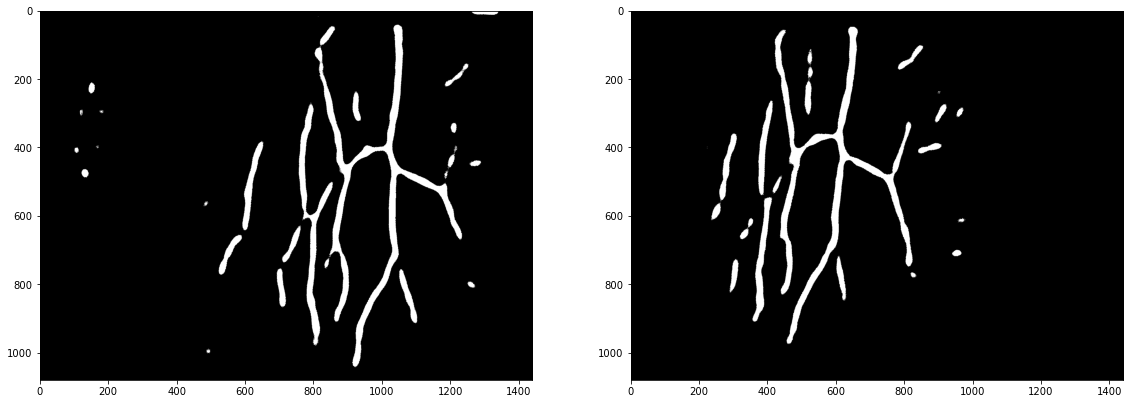

In [17]:
vein_l = cv2.imread(r"./09_05_23/Left_shubham2850nm.png",0)
vein_r = cv2.imread(r"./09_05_23/Right_shubham2850nm.png",0)

vein_l = cv2.undistort(vein_l,mtx1,dist1,None,newcameramtx1)
vein_r = cv2.undistort(vein_r,mtx2,dist2,None,newcameramtx2)

autoencoder_vein = load_model("./server output h5 file/trial_error_vein_train12.h5")

vein_l_input = vein_l.reshape((1,1080, 1440,1)).astype('float32') / 255.
vein_r_input = vein_r.reshape((1,1080, 1440,1)).astype('float32') / 255.

vein_proc_l = autoencoder_vein.predict(vein_l_input)
vein_proc_l = (vein_proc_l.reshape((1080, 1440)) * 255 ).astype('uint8')
vein_proc_r = autoencoder_vein.predict(vein_r_input)
vein_proc_r = (vein_proc_r.reshape((1080, 1440)) * 255 ).astype('uint8')

vein_proc_l = cv2.GaussianBlur(vein_proc_l,(75,75),0)
vein_proc_r = cv2.GaussianBlur(vein_proc_r,(75,75),0)

vein_proc_l = cv2.adaptiveThreshold(vein_proc_l, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 35, 5)
vein_proc_r = cv2.adaptiveThreshold(vein_proc_r, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 35, 5)

# vein_proc_l = sp_noise(vein_proc_l, 0.1)
# vein_proc_r = sp_noise(vein_proc_r, 0.1)

# clahe = cv2.createCLAHE(clipLimit = 8)

# feat1 = clahe.apply(vein_l)
# feat2 = clahe.apply(vein_r)

feat1 = vein_proc_l
feat2 = vein_proc_r

plt.figure(figsize=(30,10))

ax = plt.subplot(1,3,1)

plt.imshow(vein_proc_l,cmap='gray')
# plt.imshow(feat1,cmap='gray')

# target image

ax = plt.subplot(1,3,2)
plt.imshow(vein_proc_r,cmap='gray')
# plt.imshow(feat2,cmap='gray')

1/1 [==============================] - 1s 1s/step


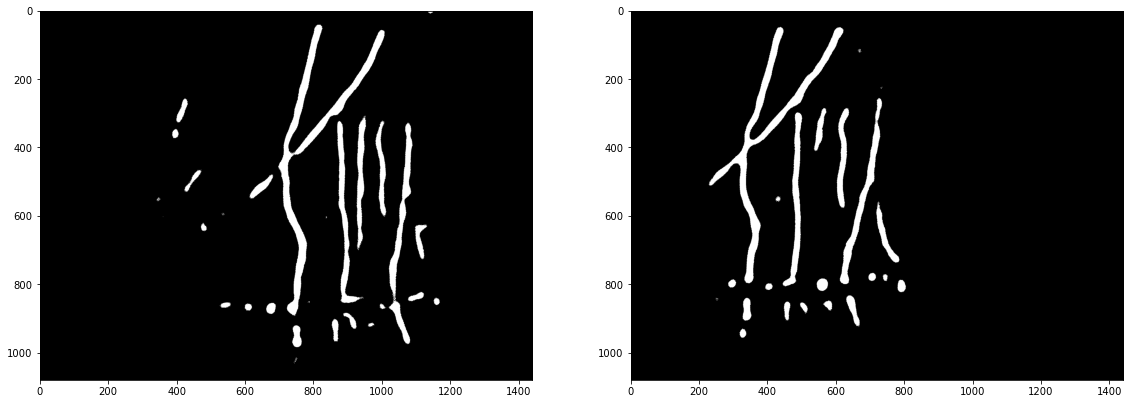

In [17]:
vein_l = cv2.imread(r"./09_05_23/Left_shubham1850nm.png",0)
vein_r = cv2.imread(r"./09_05_23/Right_shubham1850nm.png",0)

vein_l = cv2.undistort(vein_l,mtx1,dist1,None,newcameramtx1)
vein_r = cv2.undistort(vein_r,mtx2,dist2,None,newcameramtx2)

autoencoder_vein = load_model("./server output h5 file/trial_error_vein_train12.h5")

vein_l_input = vein_l.reshape((1,1080, 1440,1)).astype('float32') / 255.
vein_r_input = vein_r.reshape((1,1080, 1440,1)).astype('float32') / 255.

vein_proc_l = autoencoder_vein.predict(vein_l_input)
vein_proc_l = (vein_proc_l.reshape((1080, 1440)) * 255 ).astype('uint8')
vein_proc_r = autoencoder_vein.predict(vein_r_input)
vein_proc_r = (vein_proc_r.reshape((1080, 1440)) * 255 ).astype('uint8')

vein_proc_l = cv2.GaussianBlur(vein_proc_l,(75,75),0)
vein_proc_r = cv2.GaussianBlur(vein_proc_r,(75,75),0)

vein_proc_l = cv2.adaptiveThreshold(vein_proc_l, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 35, 5)
vein_proc_r = cv2.adaptiveThreshold(vein_proc_r, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 35, 5)

# vein_proc_l = sp_noise(vein_proc_l, 0.1)
# vein_proc_r = sp_noise(vein_proc_r, 0.1)

# clahe = cv2.createCLAHE(clipLimit = 8)

# feat1 = clahe.apply(vein_l)
# feat2 = clahe.apply(vein_r)

feat1 = vein_proc_l
feat2 = vein_proc_r

plt.figure(figsize=(30,10))

ax = plt.subplot(1,3,1)

plt.imshow(vein_proc_l,cmap='gray')
# plt.imshow(feat1,cmap='gray')

# target image

ax = plt.subplot(1,3,2)
plt.imshow(vein_proc_r,cmap='gray')
# plt.imshow(feat2,cmap='gray')

1/1 [==============================] - 1s 1s/step


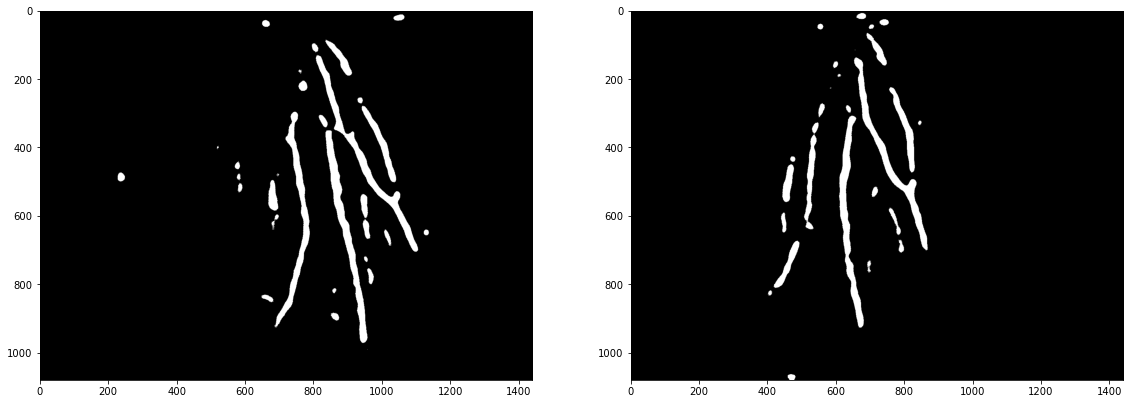

In [18]:
vein_l = cv2.imread(r"./vein_images/Left_Vein01850nm.png",0)
vein_r = cv2.imread(r"./vein_images/Right_Vein01850nm.png",0)

vein_l = cv2.undistort(vein_l,mtx1,dist1,None,newcameramtx1)
vein_r = cv2.undistort(vein_r,mtx2,dist2,None,newcameramtx2)

autoencoder_vein = load_model("./server output h5 file/trial_error_vein_train12.h5")

vein_l_input = vein_l.reshape((1,1080, 1440,1)).astype('float32') / 255.
vein_r_input = vein_r.reshape((1,1080, 1440,1)).astype('float32') / 255.

vein_proc_l = autoencoder_vein.predict(vein_l_input)
vein_proc_l = (vein_proc_l.reshape((1080, 1440)) * 255 ).astype('uint8')
vein_proc_r = autoencoder_vein.predict(vein_r_input)
vein_proc_r = (vein_proc_r.reshape((1080, 1440)) * 255 ).astype('uint8')

vein_proc_l = cv2.GaussianBlur(vein_proc_l,(55,55),0)
vein_proc_r = cv2.GaussianBlur(vein_proc_r,(55,55),0)

vein_proc_l = cv2.adaptiveThreshold(vein_proc_l, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 35, 5)
vein_proc_r = cv2.adaptiveThreshold(vein_proc_r, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 35, 5)

# vein_proc_l = sp_noise(vein_proc_l, 0.1)
# vein_proc_r = sp_noise(vein_proc_r, 0.1)

# clahe = cv2.createCLAHE(clipLimit = 8)

# feat1 = clahe.apply(vein_l)
# feat2 = clahe.apply(vein_r)

feat1 = vein_proc_l
feat2 = vein_proc_r

plt.figure(figsize=(30,10))

ax = plt.subplot(1,3,1)

plt.imshow(vein_proc_l,cmap='gray')
# plt.imshow(feat1,cmap='gray')

# target image

ax = plt.subplot(1,3,2)
plt.imshow(vein_proc_r,cmap='gray')
# plt.imshow(feat2,cmap='gray')

In [18]:
#scaling down the images
scale = 1
widthl = int(feat1.shape[1]/scale)
heightl = int(feat1.shape[0]/scale)
diml = (widthl, heightl)
img1 = cv2.resize(feat1, diml, cv2.INTER_AREA)

widthr = int(feat2.shape[1]/scale)
heightr = int(feat2.shape[0]/scale)
dimr = (widthr, heightr)
img2 = cv2.resize(feat2, dimr, cv2.INTER_AREA)

In [19]:
orb = cv2.ORB_create(nfeatures = 1500, edgeThreshold = 200, patchSize = 200, WTA_K = 4)

KeyPoints1, des1 = orb.detectAndCompute(img1, None)
KeyPoints2, des2 = orb.detectAndCompute(img2, None)
len(KeyPoints1)

1104

In [21]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING2, crossCheck= True)
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)

< cv2.DMatch 000002E36869F230>

In [ ]:
match_pts1 = []

match_pts1

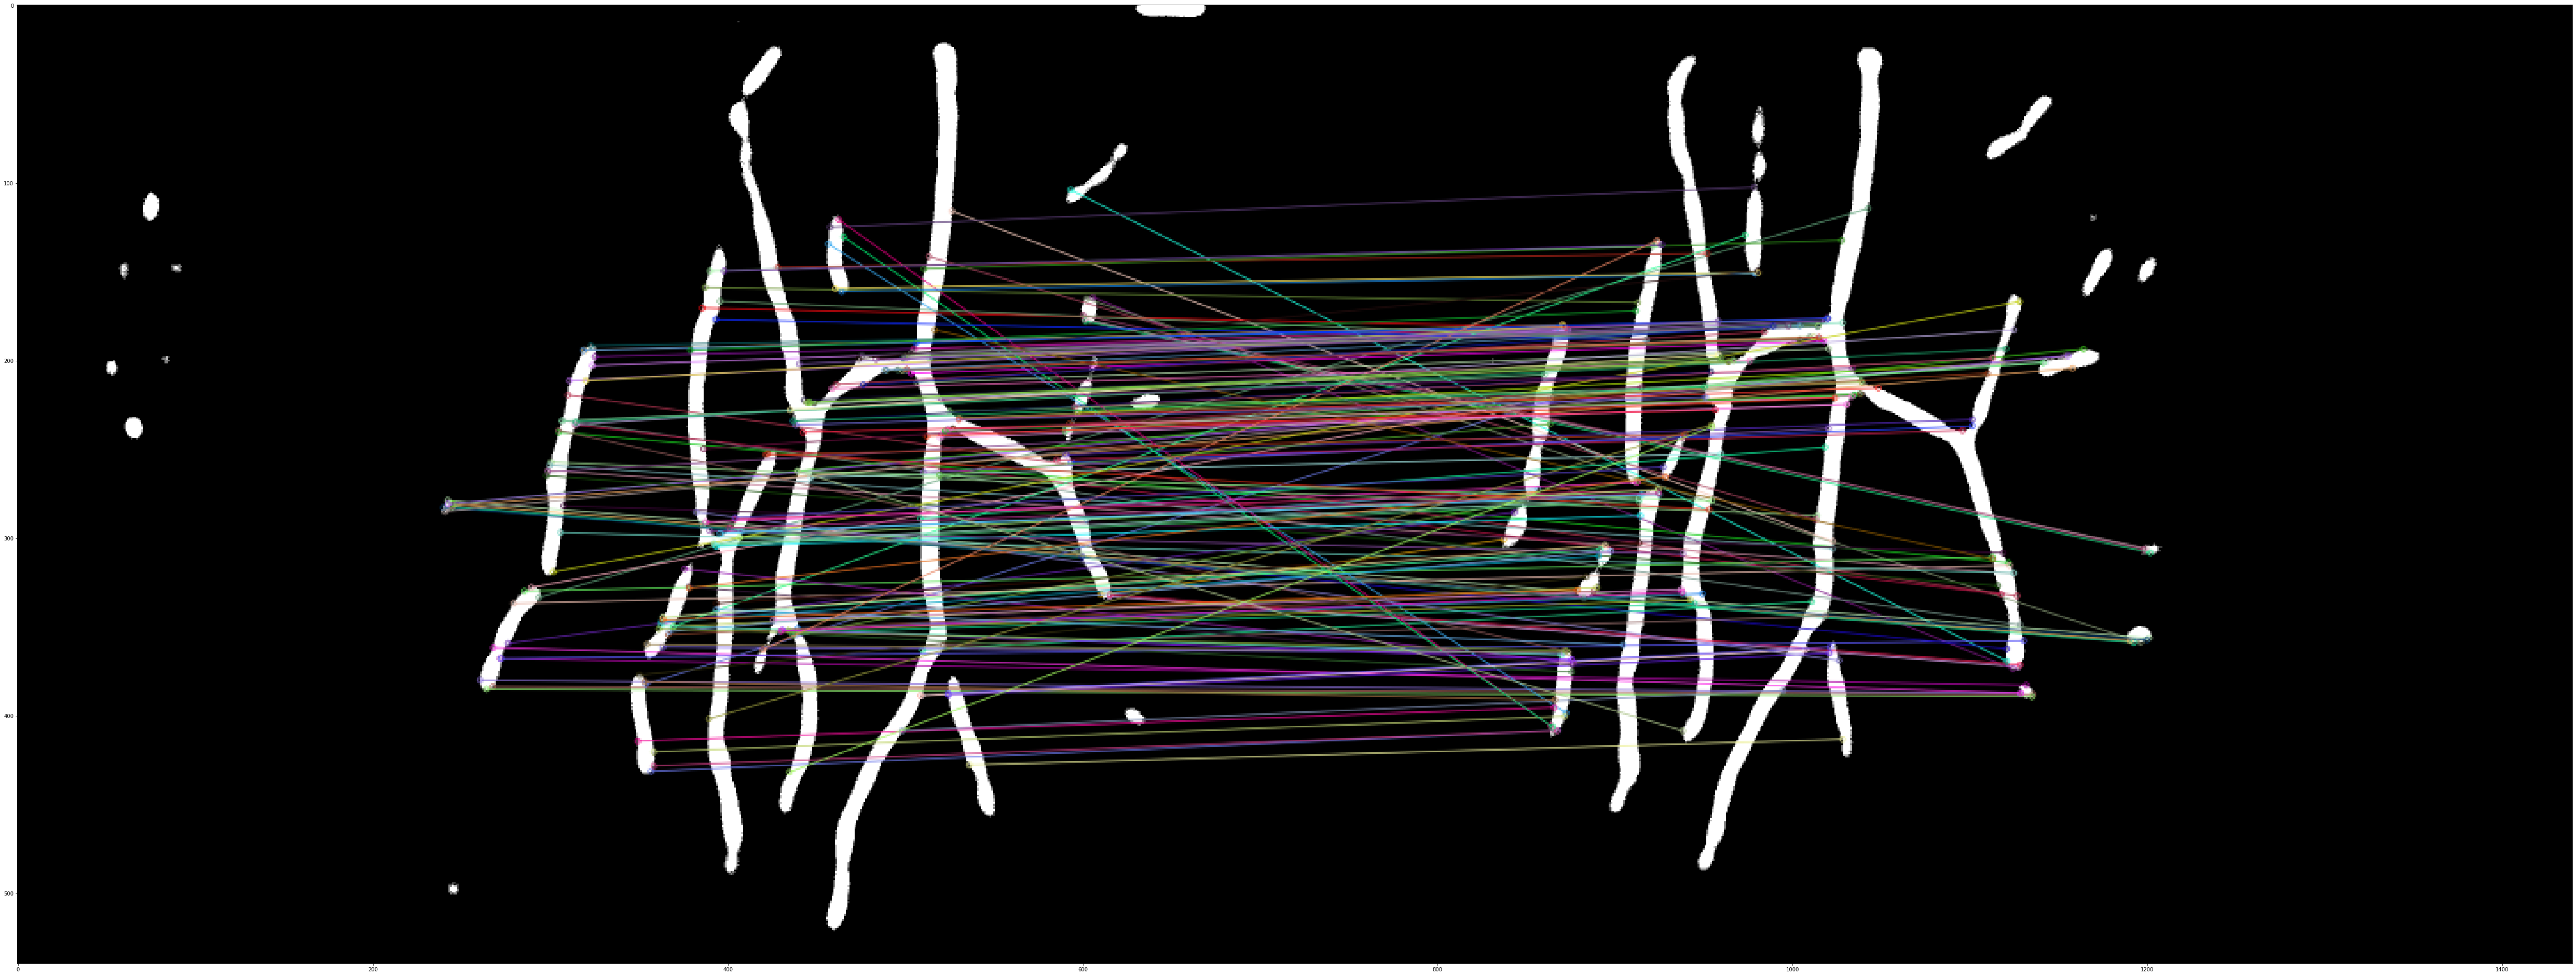

In [25]:
matching_result = cv2.drawMatches(img1, KeyPoints1, img2, KeyPoints2, matches, None, flags=2)

mr = cv2.resize(matching_result, (0, 0), fx = 0.5, fy = 0.5)
plt.figure(figsize=(300,100))
ax = plt.subplot(1,3,1)
plt.imshow(mr, cmap = 'gray')

p1=[]
p2=[]
for match in matches:
    p1.append([KeyPoints1[match.queryIdx].pt])
    p2.append([KeyPoints2[match.trainIdx].pt])

p1 = np.array(p1)
p2 = np.array(p2)

p1 = p1.reshape(p1.shape[0],2)
p2 = p2.reshape(p2.shape[0],2)

p1 = p1*scale
p2 = p2*scale

# Homography

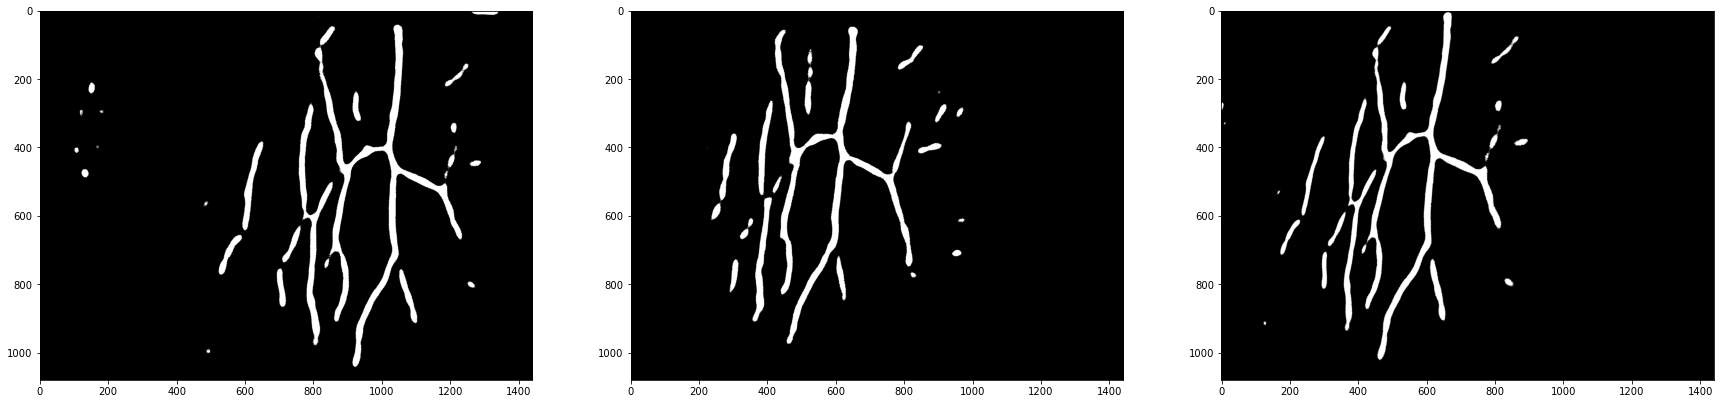

In [26]:
# Homography

h,status = cv2.findHomography(p1, p2, cv2.RANSAC, ransacReprojThreshold = 100, maxIters = 15, confidence = 0.999)

im_out = cv2.warpPerspective(img1,  h, (img1.shape[1],img1.shape[0]))

plt.figure(figsize=(30,10))

ax = plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')

# target image

ax = plt.subplot(1,3,2)
plt.imshow(img2,cmap='gray')
cv2.imwrite('image_r.png', img2)

ax = plt.subplot(1,3,3)
plt.imshow(im_out,cmap='gray')
cv2.imwrite('homography_out.png', im_out)

im_out = cv2.resize(im_out,(1440,1080))

a_h = np.where(im_out==255)
a_h=np.array(a_h)

pa_h = []
for i in range(len(a_h[0])):
    pa_h32 = (a_h[0][i],a_h[1][i])
    pa_h.append(pa_h32)

pa_h = np.array(pa_h)

In [243]:
# Check the overlap
right = cv2.imread(r"./image_r.png")
hom_left = cv2.imread(r"./homography_out.png")
dst = cv2.addWeighted(right, 0.4, hom_left, 0.9, 0)

# img_arr = np.hstack((img1, img2))
# cv2.imshow('Input Images',img_arr)
cv2.imshow('Blended Image',dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Triangulation

In [27]:
a = np.where(img1 == 255)
pa = []
for i in range(len(a[0])):
    pa32 = (a[0][i],a[1][i])
#     print(p32)
    pa.append(pa32)
pa = np.array(pa)
# pa

pa_h = []
for i in range(len(a[0])):
    pa_h32 = np.dot(h,(a[0][i],a[1][i], 1))
    pa_h32 = (pa_h32[0],pa_h32[1])
#     print(pa_h32)
    pa_h.append(pa_h32)
pa_h = np.asarray(pa_h)    

pa.shape

(75324, 2)

In [28]:
# rot1 = cv2.Rodrigues(rvecs1[0])
# rot2 = cv2.Rodrigues(rvecs2[0])

# _, R1, t1, _ = cv2.decomposeHomographyMat(h, mtx1)
# _, R2, t2, _ = cv2.decomposeHomographyMat(h, mtx2)

In [216]:
# #RT matrix for C1 is identity.
# RT1 = np.concatenate([R1[2], t1[2]], axis = -1)
# P1 = mtx1 @ RT1 #projection matrix for C1
 
# #RT matrix for C2 is the R and T obtained from stereo calibration.
# RT2 = np.concatenate([R2[2], t2[2]], axis = -1)
# P2 = mtx2 @ RT2 #projection matrix for C2

# P1[2,:]

In [29]:
#RT matrix for C1 is identity.
RT1 = np.concatenate([np.eye(3), [[0],[0],[0]]], axis = -1)
P1 = mtx1 @ RT1 #projection matrix for C1
 
#RT matrix for C2 is the R and T obtained from stereo calibration.
RT2 = np.concatenate([R, T], axis = -1)
P2 = mtx2 @ RT2 #projection matrix for C2


In [30]:
def DLT(P1, P2, point1, point2):
    A = [point1[1]*P1[2,:] - P1[1,:],
         P1[0,:] - point1[0]*P1[2,:],
         point2[1]*P2[2,:] - P2[1,:],
         P2[0,:] - point2[0]*P2[2,:]
        ]
    A = np.array(A).reshape((4,4))
    #print('A: ')
    #print(A)
 
    B = A.transpose() @ A
    from scipy import linalg
    U, s, Vh = linalg.svd(B, full_matrices = False)
 
    print('Triangulated point: ')
    print(Vh[3,0:3]/Vh[3,3])
    
    return Vh[3,0:3]/Vh[3,3]

In [31]:
# pa = pa.reshape(len(pa),2)
# pa = np.array(pa)
# pb = pb.reshape(len(pb),2)
# pb=np.array(pb)


p3ds = []
for uv1, uv2 in zip(pa, pa_h):
    _p3d = DLT(P1, P2, uv1, uv2)
#     if _p3d[0]<1440 and _p3d[1]<1440 and _p3d[2]<1440:
    p3ds.append(_p3d)
p3ds = np.array(p3ds)

# p3ds

Triangulated point: 
[-35.51323171  40.43146298 130.76312942]
Triangulated point: 
[-35.51181747  40.4813212  130.754617  ]
Triangulated point: 
[-35.51040506  40.53117387 130.74610674]
Triangulated point: 
[-35.50899446  40.581021   130.73759864]
Triangulated point: 
[-35.50758569  40.6308626  130.7290927 ]
Triangulated point: 
[-35.50617873  40.68069865 130.72058892]
Triangulated point: 
[-35.50477359  40.73052918 130.7120873 ]
Triangulated point: 
[-35.50337027  40.78035417 130.70358784]
Triangulated point: 
[-35.50196876  40.83017363 130.69509054]
Triangulated point: 
[-35.50056907  40.87998756 130.68659539]
Triangulated point: 
[-35.4991712   40.92979598 130.67810239]
Triangulated point: 
[-35.49777513  40.97959887 130.66961156]
Triangulated point: 
[-35.49638089  41.02939624 130.66112287]
Triangulated point: 
[-35.49498845  41.07918809 130.65263634]
Triangulated point: 
[-35.49359783  41.12897444 130.64415196]
Triangulated point: 
[-35.49220902  41.17875527 130.63566973]
Triangul

Triangulated point: 
[-35.3332614   40.70560781 130.6966402 ]
Triangulated point: 
[-35.33187535  40.75542197 130.68815095]
Triangulated point: 
[-35.33049113  40.8052306  130.67966385]
Triangulated point: 
[-35.32910872  40.85503372 130.67117891]
Triangulated point: 
[-35.32772812  40.90483133 130.66269612]
Triangulated point: 
[-35.32634934  40.95462342 130.65421549]
Triangulated point: 
[-35.32497237  41.00441001 130.64573701]
Triangulated point: 
[-35.32359722  41.0541911  130.63726069]
Triangulated point: 
[-35.32222388  41.10396668 130.62878651]
Triangulated point: 
[-35.32085235  41.15373676 130.62031449]
Triangulated point: 
[-35.31948263  41.20350135 130.61184462]
Triangulated point: 
[-35.31811472  41.25326044 130.60337689]
Triangulated point: 
[-35.31674862  41.30301403 130.59491132]
Triangulated point: 
[-35.31538432  41.35276214 130.58644789]
Triangulated point: 
[-35.31402184  41.40250476 130.5779866 ]
Triangulated point: 
[-35.31266116  41.4522419  130.56952747]
Triangul

Triangulated point: 
[-35.10456686  40.67234233 130.67581395]
Triangulated point: 
[-35.1032038   40.72214195 130.66733832]
Triangulated point: 
[-35.10184256  40.77193606 130.65886485]
Triangulated point: 
[-35.10048314  40.82172467 130.65039353]
Triangulated point: 
[-35.09912553  40.87150778 130.64192436]
Triangulated point: 
[-35.09776973  40.9212854  130.63345736]
Triangulated point: 
[-35.09641575  40.97105753 130.6249925 ]
Triangulated point: 
[-35.09506358  41.02082417 130.6165298 ]
Triangulated point: 
[-35.09371322  41.07058532 130.60806925]
Triangulated point: 
[-35.09236468  41.12034098 130.59961085]
Triangulated point: 
[-35.09101794  41.17009117 130.59115461]
Triangulated point: 
[-35.08967302  41.21983587 130.58270051]
Triangulated point: 
[-35.0883299   41.2695751  130.57424856]
Triangulated point: 
[-35.08698859  41.31930885 130.56579876]
Triangulated point: 
[-35.08564909  41.36903713 130.5573511 ]
Triangulated point: 
[-35.0843114   41.41875994 130.54890559]
Triangul

Triangulated point: 
[-34.83515737  42.17982882 130.39340223]
Triangulated point: 
[-34.8338732   42.22944487 130.3850067 ]
Triangulated point: 
[-34.83259083  42.2790555  130.37661329]
Triangulated point: 
[-34.83131025  42.32866073 130.36822201]
Triangulated point: 
[-34.83003147  42.37826056 130.35983286]
Triangulated point: 
[-34.82875448  42.42785498 130.35144584]
Triangulated point: 
[-34.82747928  42.47744401 130.34306094]
Triangulated point: 
[-34.82620587  42.52702764 130.33467816]
Triangulated point: 
[-34.82493424  42.57660587 130.32629751]
Triangulated point: 
[-34.82366441  42.62617871 130.31791898]
Triangulated point: 
[-34.82239637  42.67574616 130.30954258]
Triangulated point: 
[-34.82113012  42.72530823 130.30116829]
Triangulated point: 
[-34.81986565  42.77486491 130.29279612]
Triangulated point: 
[-34.81860297  42.8244162  130.28442607]
Triangulated point: 
[-34.81734207  42.87396212 130.27605814]
Triangulated point: 
[-34.81608296  42.92350266 130.26769233]
Triangul

Triangulated point: 
[-33.08917263  19.40722771 134.03048302]
Triangulated point: 
[-32.78977018  28.31832444 132.46076974]
Triangulated point: 
[-32.78821544  28.36929547 132.45190993]
Triangulated point: 
[-32.78666269  28.42026051 132.44305251]
Triangulated point: 
[-32.78511192  28.47121955 132.43419749]
Triangulated point: 
[-32.78356312  28.5221726  132.42534486]
Triangulated point: 
[-32.78201631  28.57311966 132.41649462]
Triangulated point: 
[-32.78047147  28.62406073 132.40764677]
Triangulated point: 
[-32.7789286   28.67499581 132.39880131]
Triangulated point: 
[-32.77738772  28.72592492 132.38995824]
Triangulated point: 
[-32.7758488   28.77684805 132.38111756]
Triangulated point: 
[-32.77431187  28.8277652  132.37227927]
Triangulated point: 
[-32.7727769   28.87867638 132.36344336]
Triangulated point: 
[-32.77124391  28.9295816  132.35460984]
Triangulated point: 
[-32.7697129   28.98048085 132.3457787 ]
Triangulated point: 
[-32.76818385  29.03137414 132.33694994]
Triangul

[-32.49416381  28.38321407 132.40882325]
Triangulated point: 
[-32.4926409   28.43414891 132.3999854 ]
Triangulated point: 
[-32.49111996  28.48507778 132.39114994]
Triangulated point: 
[-32.489601    28.53600068 132.38231687]
Triangulated point: 
[-32.48808402  28.58691761 132.3734862 ]
Triangulated point: 
[-32.48656901  28.63782857 132.36465791]
Triangulated point: 
[-32.48505598  28.68873358 132.35583202]
Triangulated point: 
[-32.48354492  28.73963262 132.34700851]
Triangulated point: 
[-32.48203583  28.79052571 132.33818739]
Triangulated point: 
[-32.48052872  28.84141285 132.32936866]
Triangulated point: 
[-32.47902358  28.89229404 132.32055231]
Triangulated point: 
[-32.47752041  28.94316928 132.31173834]
Triangulated point: 
[-32.47601922  28.99403858 132.30292676]
Triangulated point: 
[-32.47451999  29.04490194 132.29411756]
Triangulated point: 
[-32.47302273  29.09575936 132.28531074]
Triangulated point: 
[-32.47152744  29.14661085 132.2765063 ]
Triangulated point: 
[-32.470

[-32.07584225  28.63662042 132.30736306]
Triangulated point: 
[-32.07437001  28.68748548 132.29856362]
Triangulated point: 
[-32.07289975  28.73834462 132.28976658]
Triangulated point: 
[-32.07143146  28.78919783 132.28097192]
Triangulated point: 
[-32.06996514  28.84004512 132.27217964]
Triangulated point: 
[-32.06850079  28.89088649 132.26338975]
Triangulated point: 
[-32.06703841  28.94172195 132.25460225]
Triangulated point: 
[-32.06557799  28.99255149 132.24581712]
Triangulated point: 
[-32.06411955  29.04337511 132.23703438]
Triangulated point: 
[-32.06266307  29.09419283 132.22825402]
Triangulated point: 
[-32.06120856  29.14500465 132.21947604]
Triangulated point: 
[-32.05975602  29.19581057 132.21070043]
Triangulated point: 
[-32.05830544  29.24661058 132.20192721]
Triangulated point: 
[-32.05685683  29.2974047  132.19315635]
Triangulated point: 
[-32.05541018  29.34819293 132.18438788]
Triangulated point: 
[-32.05396549  29.39897527 132.17562178]
Triangulated point: 
[-32.052

[-31.67389173  28.33021263 132.3020001 ]
Triangulated point: 
[-31.67244825  28.38107297 132.29321282]
Triangulated point: 
[-31.67100675  28.4319274  132.28442793]
Triangulated point: 
[-31.66956722  28.48277591 132.27564544]
Triangulated point: 
[-31.66812966  28.53361851 132.26686534]
Triangulated point: 
[-31.66669408  28.5844552  132.25808763]
Triangulated point: 
[-31.66526047  28.63528599 132.2493123 ]
Triangulated point: 
[-31.66382882  28.68611087 132.24053937]
Triangulated point: 
[-31.66239915  28.73692985 132.23176882]
Triangulated point: 
[-31.66097145  28.78774294 132.22300066]
Triangulated point: 
[-31.65954572  28.83855013 132.21423488]
Triangulated point: 
[-31.65812195  28.88935144 132.20547148]
Triangulated point: 
[-31.65670015  28.94014685 132.19671047]
Triangulated point: 
[-31.65528032  28.99093638 132.18795184]
Triangulated point: 
[-31.65386246  29.04172004 132.17919559]
Triangulated point: 
[-31.65244656  29.09249781 132.17044172]
Triangulated point: 
[-31.651

[-31.53757645  17.67137228 134.10162645]
Triangulated point: 
[-31.53575548  17.72347554 134.09235136]
Triangulated point: 
[-31.53393662  17.77557222 134.08307887]
Triangulated point: 
[-31.53211989  17.82766232 134.07380901]
Triangulated point: 
[-31.53030527  17.87974585 134.06454175]
Triangulated point: 
[-31.52849276  17.93182281 134.0552771 ]
Triangulated point: 
[-31.52668237  17.98389321 134.04601506]
Triangulated point: 
[-31.5248741   18.03595704 134.03675562]
Triangulated point: 
[-31.52306794  18.08801432 134.02749879]
Triangulated point: 
[-31.52126389  18.14006505 134.01824457]
Triangulated point: 
[-31.51946196  18.19210922 134.00899294]
Triangulated point: 
[-31.51766213  18.24414685 133.99974393]
Triangulated point: 
[-31.51586442  18.29617794 133.99049751]
Triangulated point: 
[-31.51406882  18.34820249 133.98125369]
Triangulated point: 
[-31.51227533  18.4002205  133.97201247]
Triangulated point: 
[-31.51048395  18.45223198 133.96277385]
Triangulated point: 
[-31.206

[-31.11338032  17.83527008 134.00854206]
Triangulated point: 
[-31.11160639  17.88730668 133.99930155]
Triangulated point: 
[-31.10983456  17.93933674 133.99006365]
Triangulated point: 
[-31.10806486  17.99136026 133.98082836]
Triangulated point: 
[-31.10629726  18.04337725 133.97159567]
Triangulated point: 
[-31.10453177  18.09538771 133.96236558]
Triangulated point: 
[-31.1027684   18.14739165 133.9531381 ]
Triangulated point: 
[-30.79698894  28.21863208 132.19344143]
Triangulated point: 
[-30.79562756  28.26941766 132.18470593]
Triangulated point: 
[-30.79426814  28.32019737 132.17597282]
Triangulated point: 
[-30.7929107   28.37097123 132.1672421 ]
Triangulated point: 
[-30.79155523  28.42173923 132.15851378]
Triangulated point: 
[-30.79020172  28.47250138 132.14978784]
Triangulated point: 
[-30.78885019  28.52325769 132.14106429]
Triangulated point: 
[-30.78750062  28.57400814 132.13234314]
Triangulated point: 
[-30.78615302  28.62475275 132.12362437]
Triangulated point: 
[-30.784

[-30.70879323  17.42665392 134.01632075]
Triangulated point: 
[-30.70704287  17.47869553 134.00708613]
Triangulated point: 
[-30.70529462  17.53073061 133.99785412]
Triangulated point: 
[-30.70354849  17.58275915 133.98862473]
Triangulated point: 
[-30.70180448  17.63478116 133.97939795]
Triangulated point: 
[-30.70006258  17.68679664 133.97017379]
Triangulated point: 
[-30.69832279  17.7388056  133.96095223]
Triangulated point: 
[-30.69484955  17.84280397 133.94251696]
Triangulated point: 
[-30.38657961  28.21723574 132.13280763]
Triangulated point: 
[-30.38525818  28.26798012 132.12409873]
Triangulated point: 
[-30.38393872  28.31871866 132.11539222]
Triangulated point: 
[-30.38262123  28.36945137 132.10668811]
Triangulated point: 
[-30.38130571  28.42017826 132.09798639]
Triangulated point: 
[-30.37999216  28.47089933 132.08928705]
Triangulated point: 
[-30.37868057  28.52161457 132.08059011]
Triangulated point: 
[-30.37737094  28.572324   132.07189555]
Triangulated point: 
[-30.376

[-29.85698966  28.30215352 132.03887844]
Triangulated point: 
[-29.85572267  28.35283463 132.03020789]
Triangulated point: 
[-29.85445764  28.40350994 132.02153973]
Triangulated point: 
[-29.85319458  28.45417948 132.01287396]
Triangulated point: 
[-29.85193348  28.50484323 132.00421057]
Triangulated point: 
[-29.85067434  28.5555012  131.99554958]
Triangulated point: 
[-29.84941717  28.60615339 131.98689097]
Triangulated point: 
[-29.84816196  28.65679982 131.97823474]
Triangulated point: 
[-29.84690871  28.70744047 131.9695809 ]
Triangulated point: 
[-29.84565742  28.75807536 131.96092945]
Triangulated point: 
[-29.84440809  28.80870448 131.95228037]
Triangulated point: 
[-29.84316072  28.85932784 131.94363368]
Triangulated point: 
[-29.84191531  28.90994544 131.93498936]
Triangulated point: 
[-29.84067186  28.96055729 131.92634742]
Triangulated point: 
[-29.83943037  29.01116339 131.91770787]
Triangulated point: 
[-29.83819083  29.06176374 131.90907069]
Triangulated point: 
[-29.836

[-29.49163369  16.25452004 134.02433716]
Triangulated point: 
[-29.48995497  16.30656723 134.01512272]
Triangulated point: 
[-29.48827838  16.35860788 134.00591091]
Triangulated point: 
[-29.4866039   16.41064201 133.99670174]
Triangulated point: 
[-29.48493155  16.46266961 133.9874952 ]
Triangulated point: 
[-29.48326132  16.51469068 133.9782913 ]
Triangulated point: 
[-29.48159321  16.56670524 133.96909003]
Triangulated point: 
[-29.47992722  16.61871328 133.95989139]
Triangulated point: 
[-29.47826334  16.67071482 133.95069539]
Triangulated point: 
[-29.47660158  16.72270984 133.94150201]
Triangulated point: 
[-29.47494194  16.77469837 133.93231127]
Triangulated point: 
[-29.47328442  16.82668039 133.92312315]
Triangulated point: 
[-29.47162901  16.87865591 133.91393766]
Triangulated point: 
[-29.46997572  16.93062495 133.90475479]
Triangulated point: 
[-29.15882953  28.11104668 131.96367629]
Triangulated point: 
[-29.15762278  28.16167746 131.95504259]
Triangulated point: 
[-29.156

[-28.78434441  29.12752432 131.73615381]
Triangulated point: 
[-29.08100108  16.00317762 134.00044032]
Triangulated point: 
[-29.07935151  16.05520828 133.99123962]
Triangulated point: 
[-29.07770407  16.10723242 133.98204155]
Triangulated point: 
[-29.07605874  16.15925004 133.97284613]
Triangulated point: 
[-29.07441553  16.21126115 133.96365335]
Triangulated point: 
[-29.07277445  16.26326575 133.9544632 ]
Triangulated point: 
[-29.07113549  16.31526384 133.9452757 ]
Triangulated point: 
[-29.06949864  16.36725542 133.93609083]
Triangulated point: 
[-29.06786391  16.41924051 133.9269086 ]
Triangulated point: 
[-29.0662313  16.4712191 133.917729 ]
Triangulated point: 
[-29.06460081  16.5231912  133.90855203]
Triangulated point: 
[-29.06297243  16.57515681 133.8993777 ]
Triangulated point: 
[-29.06134617  16.62711593 133.890206  ]
Triangulated point: 
[-29.05972203  16.67906858 133.88103693]
Triangulated point: 
[-29.0581      16.73101474 133.87187048]
Triangulated point: 
[-29.056480

[-28.43487634  29.08192162 131.688854  ]
Triangulated point: 
[-28.72339361  15.96626612 133.94770463]
Triangulated point: 
[-28.72177614  16.01825995 133.93852478]
Triangulated point: 
[-28.72016079  16.07024727 133.92934757]
Triangulated point: 
[-28.71854757  16.12222811 133.92017301]
Triangulated point: 
[-28.71693646  16.17420245 133.91100108]
Triangulated point: 
[-28.71532747  16.2261703  133.90183179]
Triangulated point: 
[-28.7137206   16.27813166 133.89266514]
Triangulated point: 
[-28.71211584  16.33008655 133.88350112]
Triangulated point: 
[-28.7105132   16.38203495 133.87433974]
Triangulated point: 
[-28.70891268  16.43397689 133.865181  ]
Triangulated point: 
[-28.70731427  16.48591235 133.85602489]
Triangulated point: 
[-28.70571797  16.53784135 133.84687141]
Triangulated point: 
[-28.70412379  16.58976388 133.83772056]
Triangulated point: 
[-28.70253172  16.64167996 133.82857234]
Triangulated point: 
[-28.70094176  16.69358958 133.81942675]
Triangulated point: 
[-28.699

Triangulated point: 
[-27.98193558  28.41573695 131.72723559]
Triangulated point: 
[-27.98085202  28.46621164 131.71869293]
Triangulated point: 
[-27.97977042  28.51668069 131.71015266]
Triangulated point: 
[-27.97869077  28.56714409 131.70161477]
Triangulated point: 
[-27.97761307  28.61760185 131.69307926]
Triangulated point: 
[-27.97653732  28.66805398 131.68454613]
Triangulated point: 
[-27.97546353  28.71850047 131.67601539]
Triangulated point: 
[-27.97439169  28.76894134 131.66748702]
Triangulated point: 
[-27.97332179  28.81937658 131.65896103]
Triangulated point: 
[-27.97225385  28.86980619 131.65043742]
Triangulated point: 
[-27.97118785  28.92023018 131.64191618]
Triangulated point: 
[-27.97012381  28.97064856 131.63339732]
Triangulated point: 
[-27.96906171  29.02106132 131.62488084]
Triangulated point: 
[-28.24207057  16.0728959  133.84902883]
Triangulated point: 
[-28.24050203  16.12482087 133.83988474]
Triangulated point: 
[-28.23893559  16.17673938 133.83074329]
Triangul

Triangulated point: 
[-27.45032272  28.70063505 131.59412436]
Triangulated point: 
[-27.44929974  28.75102272 131.58562973]
Triangulated point: 
[-27.4482787   28.8014048  131.57713747]
Triangulated point: 
[-27.44725961  28.8517813  131.56864759]
Triangulated point: 
[-27.44624247  28.90215221 131.56016008]
Triangulated point: 
[-27.44522727  28.95251754 131.55167495]
Triangulated point: 
[-27.69572328  16.3803878  133.70401349]
Triangulated point: 
[-27.69421706  16.43221186 133.6949192 ]
Triangulated point: 
[-27.69271295  16.48402952 133.68582754]
Triangulated point: 
[-27.69121094  16.53584078 133.67673851]
Triangulated point: 
[-27.68971103  16.58764565 133.66765211]
Triangulated point: 
[-27.68821323  16.63944413 133.65856834]
Triangulated point: 
[-27.68671754  16.69123623 133.64948719]
Triangulated point: 
[-27.68522394  16.74302195 133.64040867]
Triangulated point: 
[-27.68373245  16.79480129 133.63133277]
Triangulated point: 
[-27.68224306  16.84657425 133.6222595 ]
Triangul

Triangulated point: 
[-26.99560676  28.08569191 131.6211082 ]
Triangulated point: 
[-26.99460373  28.13609824 131.61261524]
Triangulated point: 
[-26.99360265  28.18649897 131.60412467]
Triangulated point: 
[-26.99260353  28.23689412 131.59563648]
Triangulated point: 
[-26.99160635  28.28728367 131.58715069]
Triangulated point: 
[-26.99061113  28.33766765 131.57866727]
Triangulated point: 
[-26.98961786  28.38804604 131.57018625]
Triangulated point: 
[-26.98862653  28.43841885 131.5617076 ]
Triangulated point: 
[-26.98763716  28.48878609 131.55323134]
Triangulated point: 
[-26.98664974  28.53914776 131.54475746]
Triangulated point: 
[-26.98566426  28.58950386 131.53628596]
Triangulated point: 
[-26.98468073  28.6398544  131.52781684]
Triangulated point: 
[-26.98369914  28.69019937 131.5193501 ]
Triangulated point: 
[-26.9827195   28.74053878 131.51088574]
Triangulated point: 
[-26.98174181  28.79087264 131.50242375]
Triangulated point: 
[-26.98076606  28.84120095 131.49396414]
Triangul

[-26.67680694  16.58522658 133.49314618]
Triangulated point: 
[-26.67540215  16.63690597 133.48412698]
Triangulated point: 
[-26.67399946  16.68857905 133.47511041]
Triangulated point: 
[-26.67259886  16.74024582 133.46609646]
Triangulated point: 
[-26.67120036  16.79190628 133.45708513]
Triangulated point: 
[-26.66980395  16.84356044 133.44807641]
Triangulated point: 
[-26.66840964  16.89520829 133.43907032]
Triangulated point: 
[-26.66701741  16.94684985 133.43006685]
Triangulated point: 
[-26.4180542   27.75838577 131.57871901]
Triangulated point: 
[-26.41709278  27.80876558 131.57024899]
Triangulated point: 
[-26.41613332  27.85913982 131.56178136]
Triangulated point: 
[-26.4151758   27.9095085  131.55331612]
Triangulated point: 
[-26.41422025  27.95987161 131.54485327]
Triangulated point: 
[-26.41326664  28.01022915 131.53639281]
Triangulated point: 
[-26.41231498  28.06058114 131.52793474]
Triangulated point: 
[-26.41136528  28.11092758 131.51947907]
Triangulated point: 
[-26.410

Triangulated point: 
[-26.06865515  27.7132331  131.52701491]
Triangulated point: 
[-26.06772435  27.7635799  131.51856584]
Triangulated point: 
[-26.0667955   27.81392116 131.51011915]
Triangulated point: 
[-26.06586861  27.86425687 131.50167486]
Triangulated point: 
[-26.06494366  27.91458704 131.49323297]
Triangulated point: 
[-26.06402067  27.96491168 131.48479346]
Triangulated point: 
[-26.06309962  28.01523077 131.47635634]
Triangulated point: 
[-26.06218053  28.06554434 131.46792161]
Triangulated point: 
[-26.06126338  28.11585237 131.45948927]
Triangulated point: 
[-26.06034818  28.16615488 131.45105932]
Triangulated point: 
[-26.05943492  28.21645187 131.44263176]
Triangulated point: 
[-26.05852362  28.26674333 131.43420657]
Triangulated point: 
[-26.05761426  28.31702928 131.42578378]
Triangulated point: 
[-26.05670684  28.36730972 131.41736336]
Triangulated point: 
[-26.05580137  28.41758464 131.40894533]
Triangulated point: 
[-26.05489784  28.46785406 131.40052968]
Triangul

Triangulated point: 
[-25.84338209  16.60121437 133.34295948]
Triangulated point: 
[-25.84205369  16.65279236 133.33399446]
Triangulated point: 
[-25.84072737  16.7043641  133.32503207]
Triangulated point: 
[-25.83940314  16.75592959 133.3160723 ]
Triangulated point: 
[-25.60298458  27.65298593 131.45717978]
Triangulated point: 
[-25.60209435  27.70328839 131.44875865]
Triangulated point: 
[-25.60120607  27.75358533 131.44033992]
Triangulated point: 
[-25.60031975  27.80387675 131.43192357]
Triangulated point: 
[-25.59943537  27.85416266 131.42350962]
Triangulated point: 
[-25.59855294  27.90444307 131.41509806]
Triangulated point: 
[-25.59767246  27.95471797 131.4066889 ]
Triangulated point: 
[-25.59679392  28.00498736 131.39828212]
Triangulated point: 
[-25.59591733  28.05525126 131.38987773]
Triangulated point: 
[-25.59504269  28.10550967 131.38147572]
Triangulated point: 
[-25.59416999  28.15576258 131.3730761 ]
Triangulated point: 
[-25.59329924  28.20601    131.36467887]
Triangul

[-25.13247577  27.89415421 131.33599953]
Triangulated point: 
[-25.1316375   27.94437905 131.32762072]
Triangulated point: 
[-25.13080119  27.99459843 131.31924429]
Triangulated point: 
[-25.12996681  28.04481234 131.31087025]
Triangulated point: 
[-25.12913438  28.09502078 131.30249859]
Triangulated point: 
[-25.12830389  28.14522377 131.29412932]
Triangulated point: 
[-25.12747535  28.1954213  131.28576243]
Triangulated point: 
[-25.12664874  28.24561338 131.27739793]
Triangulated point: 
[-25.12582408  28.29580001 131.26903581]
Triangulated point: 
[-25.12500136  28.34598119 131.26067607]
Triangulated point: 
[-25.12418057  28.39615693 131.25231871]
Triangulated point: 
[-25.12336173  28.44632723 131.24396374]
Triangulated point: 
[-25.12254482  28.49649209 131.23561114]
Triangulated point: 
[-25.01333122  36.75080354 129.88129036]
Triangulated point: 
[-25.01282946  36.80010168 129.87332135]
Triangulated point: 
[-25.01232954  36.84939486 129.86535457]
Triangulated point: 
[-25.011

[-24.72885838  27.64032351 131.30675139]
Triangulated point: 
[-24.72804734  27.69053085 131.29838748]
Triangulated point: 
[-24.72723825  27.74073274 131.29002597]
Triangulated point: 
[-24.7264311   27.79092918 131.28166685]
Triangulated point: 
[-24.72562589  27.84112016 131.27331012]
Triangulated point: 
[-24.72482263  27.89130571 131.26495577]
Triangulated point: 
[-24.72402131  27.94148581 131.25660382]
Triangulated point: 
[-24.72322194  27.99166047 131.24825425]
Triangulated point: 
[-24.7224245   28.04182969 131.23990708]
Triangulated point: 
[-24.72162901  28.09199349 131.23156228]
Triangulated point: 
[-24.72083546  28.14215185 131.22321987]
Triangulated point: 
[-24.72004385  28.19230479 131.21487985]
Triangulated point: 
[-24.71925417  28.2424523  131.2065422 ]
Triangulated point: 
[-24.71846644  28.2925944  131.19820694]
Triangulated point: 
[-24.71768064  28.34273107 131.18987406]
Triangulated point: 
[-24.71689678  28.39286233 131.18154356]
Triangulated point: 
[-24.616

Triangulated point: 
[-24.27525585  35.99954249 129.87555369]
Triangulated point: 
[-24.2747946   36.04884023 129.86760133]
Triangulated point: 
[-24.2743352   36.09813303 129.85965121]
Triangulated point: 
[-24.27387764  36.14742089 129.85170331]
Triangulated point: 
[-24.27342192  36.19670383 129.84375764]
Triangulated point: 
[-24.27296805  36.24598183 129.8358142 ]
Triangulated point: 
[-24.27251601  36.2952549  129.82787299]
Triangulated point: 
[-24.27206582  36.34452305 129.819934  ]
Triangulated point: 
[-24.27161746  36.39378627 129.81199723]
Triangulated point: 
[-24.27117094  36.44304458 129.8040627 ]
Triangulated point: 
[-24.27072626  36.49229796 129.79613038]
Triangulated point: 
[-24.27028342  36.54154643 129.78820028]
Triangulated point: 
[-24.26984241  36.59078999 129.78027241]
Triangulated point: 
[-24.26940324  36.64002865 129.77234676]
Triangulated point: 
[-24.26896591  36.68926239 129.76442332]
Triangulated point: 
[-24.26853041  36.73849123 129.75650211]
Triangul

[-23.96688567  27.99303556 131.11330213]
Triangulated point: 
[-23.96615651  28.0431204  131.10500519]
Triangulated point: 
[-23.96542929  28.09319986 131.09671064]
Triangulated point: 
[-23.964704    28.14327395 131.08841848]
Triangulated point: 
[-23.96398065  28.19334267 131.08012869]
Triangulated point: 
[-23.96325923  28.24340602 131.07184128]
Triangulated point: 
[-23.96253975  28.29346401 131.06355626]
Triangulated point: 
[-23.88107866  35.20069999 129.93464897]
Triangulated point: 
[-23.87972051  35.34869405 129.91077152]
Triangulated point: 
[-23.87927149  35.39801551 129.90281686]
Triangulated point: 
[-23.87882433  35.44733202 129.89486444]
Triangulated point: 
[-23.87837901  35.49664359 129.88691426]
Triangulated point: 
[-23.87793554  35.54595022 129.87896632]
Triangulated point: 
[-23.87749391  35.59525191 129.87102062]
Triangulated point: 
[-23.87705413  35.64454867 129.86307716]
Triangulated point: 
[-23.8766162   35.6938405  129.85513593]
Triangulated point: 
[-23.876

[-23.87877986  16.85777603 132.93951218]
Triangulated point: 
[-23.87763687  16.90908505 132.93068628]
Triangulated point: 
[-23.87649596  16.96038798 132.92186299]
Triangulated point: 
[-23.87535711  17.0116848  132.91304231]
Triangulated point: 
[-23.87422034  17.06297554 132.90422424]
Triangulated point: 
[-23.68685178  27.25358817 131.18326791]
Triangulated point: 
[-23.68612003  27.3037198  131.17495499]
Triangulated point: 
[-23.68539022  27.35384603 131.16664447]
Triangulated point: 
[-23.68466235  27.40396686 131.15833635]
Triangulated point: 
[-23.68393643  27.4540823  131.15003062]
Triangulated point: 
[-23.68321244  27.50419235 131.14172729]
Triangulated point: 
[-23.6824904   27.554297   131.13342636]
Triangulated point: 
[-23.6817703   27.60439627 131.12512781]
Triangulated point: 
[-23.68105214  27.65449015 131.11683166]
Triangulated point: 
[-23.68033592  27.70457866 131.10853789]
Triangulated point: 
[-23.67962164  27.75466179 131.10024652]
Triangulated point: 
[-23.678

Triangulated point: 
[-24.80451065 -19.89169728 139.5742703 ]
Triangulated point: 
[-24.80182989 -19.83527796 139.56340502]
Triangulated point: 
[-24.79915167 -19.7788678  139.55254319]
Triangulated point: 
[-24.79647597 -19.7224668  139.54168482]
Triangulated point: 
[-24.79380281 -19.66607494 139.53082989]
Triangulated point: 
[-24.79113217 -19.60969223 139.51997842]
Triangulated point: 
[-24.78846406 -19.55331865 139.50913039]
Triangulated point: 
[-24.78579848 -19.49695421 139.49828581]
Triangulated point: 
[-24.78313543 -19.4405989  139.48744467]
Triangulated point: 
[-24.78047491 -19.3842527  139.47660698]
Triangulated point: 
[-24.77781691 -19.32791562 139.46577273]
Triangulated point: 
[-23.52768246  16.66628259 132.9053839 ]
Triangulated point: 
[-23.52656306  16.71757047 132.89657121]
Triangulated point: 
[-23.52544572  16.76885227 132.88776113]
Triangulated point: 
[-23.52433046  16.82012799 132.87895366]
Triangulated point: 
[-23.52321726  16.87139762 132.87014881]
Triangul

Triangulated point: 
[-24.52510688 -19.27565474 139.40469071]
Triangulated point: 
[-24.52247555 -19.21937178 139.39387777]
Triangulated point: 
[-24.51984673 -19.16309792 139.38306826]
Triangulated point: 
[-23.29143051  16.64127463 132.86465381]
Triangulated point: 
[-23.29033087  16.69253609 132.85585515]
Triangulated point: 
[-23.28923331  16.74379149 132.8470591 ]
Triangulated point: 
[-23.28813781  16.79504081 132.83826566]
Triangulated point: 
[-23.28704438  16.84628407 132.82947483]
Triangulated point: 
[-23.28595301  16.89752126 132.82068661]
Triangulated point: 
[-23.2848637   16.9487524  132.81190099]
Triangulated point: 
[-23.28377646  16.99997748 132.80311798]
Triangulated point: 
[-23.28269128  17.05119651 132.79433758]
Triangulated point: 
[-23.28160816  17.10240949 132.78555978]
Triangulated point: 
[-23.2805271   17.15361643 132.77678459]
Triangulated point: 
[-23.10628605  27.17815265 131.08919975]
Triangulated point: 
[-23.10560311  27.2282262  131.08092183]
Triangul

Triangulated point: 
[-22.81289699  27.39057912 131.00029698]
Triangulated point: 
[-22.81224798  27.44059672 130.99204854]
Triangulated point: 
[-22.8116009   27.49060899 130.98380248]
Triangulated point: 
[-22.81095576  27.54061594 130.97555882]
Triangulated point: 
[-22.81031256  27.59061756 130.96731755]
Triangulated point: 
[-22.80967129  27.64061387 130.95907867]
Triangulated point: 
[-22.80903195  27.69060485 130.95084217]
Triangulated point: 
[-22.80839455  27.74059052 130.94260807]
Triangulated point: 
[-22.80775908  27.79057088 130.93437635]
Triangulated point: 
[-22.80712554  27.84054594 130.92614702]
Triangulated point: 
[-22.80649394  27.89051569 130.91792007]
Triangulated point: 
[-22.80586426  27.94048013 130.90969551]
Triangulated point: 
[-22.80523652  27.99043928 130.90147332]
Triangulated point: 
[-24.18692165 -20.06977866 139.48027057]
Triangulated point: 
[-24.18428734 -20.01342225 139.46943107]
Triangulated point: 
[-24.18165555 -19.95707497 139.45859501]
Triangul

Triangulated point: 
[-23.8015405  -19.84966455 139.36027954]
Triangulated point: 
[-23.79894851 -19.79339912 139.34947557]
Triangulated point: 
[-23.79635905 -19.7371428  139.33867505]
Triangulated point: 
[-23.7937721  -19.68089556 139.32787798]
Triangulated point: 
[-23.79118767 -19.62465742 139.31708435]
Triangulated point: 
[-23.78860575 -19.56842836 139.30629417]
Triangulated point: 
[-23.78602634 -19.51220838 139.29550743]
Triangulated point: 
[-23.78344945 -19.45599748 139.28472413]
Triangulated point: 
[-23.78087507 -19.39979564 139.27394427]
Triangulated point: 
[-23.7783032  -19.34360287 139.26316785]
Triangulated point: 
[-23.77573385 -19.28741915 139.25239487]
Triangulated point: 
[-23.773167   -19.23124449 139.24162532]
Triangulated point: 
[-23.77060266 -19.17507887 139.23085921]
Triangulated point: 
[-22.58008781  16.719836   132.71469104]
Triangulated point: 
[-22.57905324  16.77099956 132.7059423 ]
Triangulated point: 
[-22.57802074  16.8221571  132.69719618]
Triangul

[-22.06004498  27.24204977 130.88306952]
Triangulated point: 
[-22.05945648  27.29199612 130.87486417]
Triangulated point: 
[-22.05886992  27.34193719 130.86666122]
Triangulated point: 
[-22.05828529  27.39187298 130.85846066]
Triangulated point: 
[-22.05770259  27.44180349 130.85026249]
Triangulated point: 
[-22.05712182  27.49172873 130.84206671]
Triangulated point: 
[-22.05654298  27.5416487  130.83387332]
Triangulated point: 
[-22.05596608  27.5915634  130.82568232]
Triangulated point: 
[-22.0553911   27.64147284 130.81749371]
Triangulated point: 
[-22.05481806  27.69137701 130.80930748]
Triangulated point: 
[-22.05424694  27.74127593 130.80112364]
Triangulated point: 
[-22.05367776  27.79116959 130.79294219]
Triangulated point: 
[-22.0531105   27.841058   130.78476312]
Triangulated point: 
[-22.05254516  27.89094116 130.77658643]
Triangulated point: 
[-23.37483431 -20.08048541 139.31327178]
Triangulated point: 
[-23.37226972 -20.02424743 139.3024794 ]
Triangulated point: 
[-23.369

Triangulated point: 
[-21.71537717  26.94691788 130.86522218]
Triangulated point: 
[-21.71480757  26.9968549  130.85702585]
Triangulated point: 
[-21.71423989  27.04678665 130.84883191]
Triangulated point: 
[-21.71367415  27.09671312 130.84064037]
Triangulated point: 
[-21.71311035  27.14663432 130.83245123]
Triangulated point: 
[-21.71254847  27.19655025 130.82426448]
Triangulated point: 
[-21.71198853  27.24646093 130.81608012]
Triangulated point: 
[-21.71143053  27.29636634 130.80789816]
Triangulated point: 
[-21.71087445  27.34626649 130.7997186 ]
Triangulated point: 
[-21.7103203   27.39616139 130.79154142]
Triangulated point: 
[-21.70976809  27.44605103 130.78336664]
Triangulated point: 
[-21.7092178   27.49593543 130.77519424]
Triangulated point: 
[-21.70866945  27.54581459 130.76702424]
Triangulated point: 
[-21.70812302  27.5956885  130.75885662]
Triangulated point: 
[-21.70757852  27.64555717 130.75069139]
Triangulated point: 
[-21.70703595  27.69542061 130.74252854]
Triangul

[-21.44473819  21.02600701 131.7790926 ]
Triangulated point: 
[-21.4439669   21.07654519 131.7706298 ]
Triangulated point: 
[-21.44319761  21.12707772 131.76216952]
Triangulated point: 
[-21.44243032  21.17760462 131.75371175]
Triangulated point: 
[-21.44166503  21.22812589 131.7452565 ]
Triangulated point: 
[-21.44090174  21.27864152 131.73680376]
Triangulated point: 
[-21.44014044  21.32915153 131.72835353]
Triangulated point: 
[-21.43938114  21.37965592 131.7199058 ]
Triangulated point: 
[-21.43862384  21.43015468 131.71146059]
Triangulated point: 
[-21.43786853  21.48064783 131.70301789]
Triangulated point: 
[-21.43711522  21.53113537 131.69457769]
Triangulated point: 
[-21.4363639   21.58161729 131.68614   ]
Triangulated point: 
[-21.43561457  21.63209361 131.67770481]
Triangulated point: 
[-21.36900603  26.80175906 130.82210847]
Triangulated point: 
[-21.36846095  26.85167059 130.81392833]
Triangulated point: 
[-21.36791781  26.90157686 130.80575058]
Triangulated point: 
[-21.367

[-21.21707482  17.03480485 132.39362252]
Triangulated point: 
[-21.21616968  17.08576004 132.3849779 ]
Triangulated point: 
[-21.21526659  17.13670932 132.37633588]
Triangulated point: 
[-21.21436554  17.1876527  132.36769646]
Triangulated point: 
[-21.21346653  17.2385902  132.35905962]
Triangulated point: 
[-21.21256956  17.2895218  132.35042538]
Triangulated point: 
[-21.21167463  17.34044752 132.34179374]
Triangulated point: 
[-21.21078175  17.39136736 132.33316468]
Triangulated point: 
[-21.2098909   17.44228132 132.32453821]
Triangulated point: 
[-21.20900209  17.49318941 132.31591433]
Triangulated point: 
[-21.20811532  17.54409162 132.30729303]
Triangulated point: 
[-21.15406527  20.89083889 131.74395576]
Triangulated point: 
[-21.15331372  20.94135596 131.73550544]
Triangulated point: 
[-21.15256417  20.99186739 131.72705763]
Triangulated point: 
[-21.15181662  21.0423732  131.71861235]
Triangulated point: 
[-21.15107107  21.09287339 131.71016958]
Triangulated point: 
[-21.150

Triangulated point: 
[-20.72992774  26.96788856 130.67086161]
Triangulated point: 
[-20.72944394  27.01770738 130.66273193]
Triangulated point: 
[-20.72896208  27.06752099 130.65460465]
Triangulated point: 
[-20.72848214  27.11732941 130.64647976]
Triangulated point: 
[-20.72800413  27.16713262 130.63835727]
Triangulated point: 
[-20.72752804  27.21693065 130.63023716]
Triangulated point: 
[-20.72705388  27.26672348 130.62211945]
Triangulated point: 
[-20.72658165  27.31651113 130.61400413]
Triangulated point: 
[-20.72611134  27.36629359 130.6058912 ]
Triangulated point: 
[-20.72564295  27.41607088 130.59778066]
Triangulated point: 
[-20.72517649  27.46584298 130.5896725 ]
Triangulated point: 
[-20.72471196  27.51560991 130.58156674]
Triangulated point: 
[-20.72424934  27.56537167 130.57346335]
Triangulated point: 
[-20.72378865  27.61512826 130.56536236]
Triangulated point: 
[-20.81007723  16.73602332 132.3613475 ]
Triangulated point: 
[-20.80919517  16.78696034 132.35271446]
Triangul

Triangulated point: 
[-20.38615182  21.45744763 131.49769341]
Triangulated point: 
[-20.38548734  21.50780749 131.48932124]
Triangulated point: 
[-20.38482484  21.55816181 131.48095157]
Triangulated point: 
[-20.32897671  26.5164013  130.66457721]
Triangulated point: 
[-20.32851004  26.56621899 130.6564528 ]
Triangulated point: 
[-20.32804529  26.61603148 130.6483308 ]
Triangulated point: 
[-20.32758248  26.66583877 130.6402112 ]
Triangulated point: 
[-20.3271216   26.71564086 130.63209401]
Triangulated point: 
[-20.32666264  26.76543777 130.62397921]
Triangulated point: 
[-20.32620562  26.81522948 130.61586681]
Triangulated point: 
[-20.32575052  26.86501601 130.60775681]
Triangulated point: 
[-20.32529734  26.91479735 130.59964921]
Triangulated point: 
[-20.3248461   26.96457351 130.591544  ]
Triangulated point: 
[-20.32439678  27.0143445  130.58344119]
Triangulated point: 
[-20.32394939  27.06411032 130.57534078]
Triangulated point: 
[-20.32350392  27.11387096 130.56724275]
Triangul

[-20.03846876  17.16276205 132.13329769]
Triangulated point: 
[-20.03766828  17.21355142 132.12473618]
Triangulated point: 
[-20.03686984  17.26433499 132.11617727]
Triangulated point: 
[-20.03607342  17.31511276 132.10762094]
Triangulated point: 
[-20.03527903  17.36588473 132.0990672 ]
Triangulated point: 
[-20.03448667  17.4166509  132.09051604]
Triangulated point: 
[-20.03369634  17.46741128 132.08196747]
Triangulated point: 
[-20.03290804  17.51816587 132.07342148]
Triangulated point: 
[-20.03212176  17.56891467 132.06487807]
Triangulated point: 
[-20.03133751  17.61965769 132.05633725]
Triangulated point: 
[-20.03055528  17.67039494 132.047799  ]
Triangulated point: 
[-19.98796915  20.65379457 131.54857189]
Triangulated point: 
[-19.98730744  20.70419168 131.54018656]
Triangulated point: 
[-19.98664772  20.75458324 131.53180375]
Triangulated point: 
[-19.98598999  20.80496923 131.52342345]
Triangulated point: 
[-19.98533425  20.85534968 131.51504567]
Triangulated point: 
[-19.984

[-19.61980482  17.67628858 131.96208247]
Triangulated point: 
[-19.57988358  20.60621682 131.4728128 ]
Triangulated point: 
[-19.57925427  20.65656747 131.46445197]
Triangulated point: 
[-19.57862695  20.70691257 131.45609365]
Triangulated point: 
[-19.57800162  20.75725215 131.44773784]
Triangulated point: 
[-19.57737827  20.8075862  131.43938456]
Triangulated point: 
[-19.57675692  20.85791472 131.43103378]
Triangulated point: 
[-19.57613754  20.90823772 131.42268552]
Triangulated point: 
[-19.57552016  20.95855521 131.41433977]
Triangulated point: 
[-19.57490476  21.00886718 131.40599653]
Triangulated point: 
[-19.57429134  21.05917364 131.3976558 ]
Triangulated point: 
[-19.57367991  21.10947459 131.38931758]
Triangulated point: 
[-19.57307046  21.15977003 131.38098187]
Triangulated point: 
[-19.572463    21.21005998 131.37264866]
Triangulated point: 
[-19.57185752  21.26034443 131.36431796]
Triangulated point: 
[-19.57125402  21.31062339 131.35598977]
Triangulated point: 
[-19.570

Triangulated point: 
[-19.31712817  14.48710082 132.42662965]
Triangulated point: 
[-19.31628415  14.53809897 132.41798041]
Triangulated point: 
[-19.31544219  14.58909118 132.40933381]
Triangulated point: 
[-19.31460228  14.64007744 132.40068985]
Triangulated point: 
[-19.31376442  14.69105777 132.39204852]
Triangulated point: 
[-19.31292861  14.74203215 132.38340983]
Triangulated point: 
[-19.2819254   16.72544154 132.04854669]
Triangulated point: 
[-19.28117115  16.77618148 132.04001262]
Triangulated point: 
[-19.28041893  16.82691563 132.03148114]
Triangulated point: 
[-19.27966873  16.877644   132.02295226]
Triangulated point: 
[-19.27892056  16.9283666  132.01442597]
Triangulated point: 
[-19.27817442  16.97908342 132.00590227]
Triangulated point: 
[-19.2774303   17.02979447 131.99738117]
Triangulated point: 
[-19.27668821  17.08049976 131.98886265]
Triangulated point: 
[-19.27594814  17.13119928 131.98034671]
Triangulated point: 
[-19.27521009  17.18189304 131.97183337]
Triangul

[-18.82478225  26.71738604 130.32853295]
Triangulated point: 
[-18.82444988  26.76700127 130.32051856]
Triangulated point: 
[-18.82411942  26.81661142 130.31250656]
Triangulated point: 
[-18.82379088  26.8662165  130.30449695]
Triangulated point: 
[-18.82346426  26.9158165  130.29648973]
Triangulated point: 
[-18.82313955  26.96541143 130.28848491]
Triangulated point: 
[-18.82281677  27.0150013  130.28048248]
Triangulated point: 
[-18.82249589  27.06458611 130.27248244]
Triangulated point: 
[-18.82217694  27.11416585 130.26448479]
Triangulated point: 
[-18.82185989  27.16374054 130.25648952]
Triangulated point: 
[-19.95384104 -21.56948855 138.83988858]
Triangulated point: 
[-19.95150557 -21.51353842 138.82921097]
Triangulated point: 
[-19.94917258 -21.45759734 138.81853684]
Triangulated point: 
[-19.94684206 -21.40166531 138.80786619]
Triangulated point: 
[-19.94451402 -21.34574231 138.797199  ]
Triangulated point: 
[-19.94218846 -21.28982835 138.78653529]
Triangulated point: 
[-19.939

Triangulated point: 
[-18.47164665  20.67799747 131.23023649]
Triangulated point: 
[-18.47111206  20.72819871 131.22195214]
Triangulated point: 
[-18.47057944  20.7783945  131.2136703 ]
Triangulated point: 
[-18.4700488   20.82858485 131.20539098]
Triangulated point: 
[-18.46952014  20.87876975 131.19711416]
Triangulated point: 
[-18.46899346  20.92894921 131.18883986]
Triangulated point: 
[-18.46846875  20.97912324 131.18056806]
Triangulated point: 
[-18.46794602  21.02929183 131.17229876]
Triangulated point: 
[-18.46742526  21.07945499 131.16403198]
Triangulated point: 
[-18.46690648  21.12961273 131.15576769]
Triangulated point: 
[-18.46638967  21.17976504 131.14750591]
Triangulated point: 
[-18.46587483  21.22991193 131.13924663]
Triangulated point: 
[-18.46536197  21.28005341 131.13098986]
Triangulated point: 
[-18.46485108  21.33018947 131.12273558]
Triangulated point: 
[-18.46434216  21.38032013 131.1144838 ]
Triangulated point: 
[-18.46383522  21.43044538 131.10623452]
Triangul

[-18.01739706  26.80903609 130.14641104]
Triangulated point: 
[-18.01713501  26.85854295 130.13845504]
Triangulated point: 
[-18.01687487  26.9080448  130.13050142]
Triangulated point: 
[-18.01661665  26.95754163 130.1225502 ]
Triangulated point: 
[-19.07739231 -21.34986703 138.60099382]
Triangulated point: 
[-18.09554466  13.59864377 132.31305724]
Triangulated point: 
[-18.09476648  13.64957935 132.30444202]
Triangulated point: 
[-18.09399034  13.70050901 132.29582945]
Triangulated point: 
[-18.09321626  13.75143273 132.28721953]
Triangulated point: 
[-18.09244422  13.80235054 132.27861227]
Triangulated point: 
[-18.09167423  13.85326243 132.27000765]
Triangulated point: 
[-18.09090629  13.9041684  132.26140568]
Triangulated point: 
[-18.09014039  13.95506846 132.25280636]
Triangulated point: 
[-18.08937653  14.00596262 132.24420969]
Triangulated point: 
[-18.08861472  14.05685087 132.23561566]
Triangulated point: 
[-18.08785496  14.10773322 132.22702427]
Triangulated point: 
[-18.087

[-17.67740066  14.06640151 132.14457556]
Triangulated point: 
[-17.67667468  14.11722691 132.13601138]
Triangulated point: 
[-17.67595074  14.16804645 132.12744983]
Triangulated point: 
[-17.67522883  14.21886013 132.11889092]
Triangulated point: 
[-17.67450897  14.26966795 132.11033466]
Triangulated point: 
[-17.67379114  14.32046992 132.10178103]
Triangulated point: 
[-17.64048569  16.85318725 131.67743994]
Triangulated point: 
[-17.63987107  16.90369563 131.66901947]
Triangulated point: 
[-17.63925845  16.95419835 131.66060158]
Triangulated point: 
[-17.63864785  17.00469542 131.65218628]
Triangulated point: 
[-17.63803926  17.05518683 131.64377356]
Triangulated point: 
[-17.63743267  17.1056726  131.63536342]
Triangulated point: 
[-17.63682809  17.15615271 131.62695586]
Triangulated point: 
[-17.63622552  17.20662719 131.61855088]
Triangulated point: 
[-17.63562496  17.25709603 131.61014847]
Triangulated point: 
[-17.6350264   17.30755924 131.60174865]
Triangulated point: 
[-17.634

Triangulated point: 
[-17.18842121  21.22829503 130.86653191]
Triangulated point: 
[-17.18801247  21.27827147 130.8583594 ]
Triangulated point: 
[-17.18760569  21.32824259 130.85018938]
Triangulated point: 
[-17.18679802  21.42816888 130.83385682]
Triangulated point: 
[-17.15919734  25.75477385 130.13293439]
Triangulated point: 
[-17.15896505  25.80427988 130.12498502]
Triangulated point: 
[-17.15873468  25.8537809  130.11703805]
Triangulated point: 
[-17.15850622  25.9032769  130.10909349]
Triangulated point: 
[-17.15827968  25.95276789 130.10115133]
Triangulated point: 
[-17.15805506  26.00225387 130.09321158]
Triangulated point: 
[-17.15783234  26.05173484 130.08527424]
Triangulated point: 
[-17.15761155  26.10121082 130.07733929]
Triangulated point: 
[-17.15739266  26.15068179 130.06940675]
Triangulated point: 
[-17.15717569  26.20014777 130.06147662]
Triangulated point: 
[-17.15696063  26.24960876 130.05354888]
Triangulated point: 
[-17.15674748  26.29906475 130.04562355]
Triangul

Triangulated point: 
[-16.6394213   26.32956529 129.9294979 ]
Triangulated point: 
[-16.63925304  26.37894815 129.92161105]
Triangulated point: 
[-16.63908668  26.42832606 129.9137266 ]
Triangulated point: 
[-16.63892223  26.47769903 129.90584454]
Triangulated point: 
[-16.63768311  34.60752252 128.62991145]
Triangulated point: 
[-16.63783044  34.65611308 128.62241663]
Triangulated point: 
[-16.6379796   34.7046992  128.61492406]
Triangulated point: 
[-16.63813058  34.75328087 128.60743373]
Triangulated point: 
[-16.6382834   34.80185811 128.59994565]
Triangulated point: 
[-16.63843804  34.85043092 128.59245981]
Triangulated point: 
[-16.63859451  34.8989993  128.5849762 ]
Triangulated point: 
[-16.6387528   34.94756324 128.57749484]
Triangulated point: 
[-16.63891292  34.99612276 128.57001572]
Triangulated point: 
[-16.63907486  35.04467786 128.56253883]
Triangulated point: 
[-16.69145492  13.25581737 132.06061754]
Triangulated point: 
[-16.69077661  13.30659932 132.05207588]
Triangul

[-16.15862418  13.71073312 131.86581554]
Triangulated point: 
[-16.15800601  13.76138965 131.85733188]
Triangulated point: 
[-16.15738985  13.81204039 131.84885086]
Triangulated point: 
[-16.15677573  13.86268535 131.84037249]
Triangulated point: 
[-16.15616363  13.91332453 131.83189675]
Triangulated point: 
[-16.15555355  13.96395793 131.82342365]
Triangulated point: 
[-16.1549455   14.01458557 131.81495318]
Triangulated point: 
[-16.15433947  14.06520743 131.80648535]
Triangulated point: 
[-16.12021617  17.24292321 131.27828008]
Triangulated point: 
[-16.11973857  17.29318381 131.26997878]
Triangulated point: 
[-16.11926297  17.34343887 131.26168006]
Triangulated point: 
[-16.11878935  17.39368842 131.2533839 ]
Triangulated point: 
[-16.11831772  17.44393245 131.24509031]
Triangulated point: 
[-16.11784808  17.49417097 131.23679928]
Triangulated point: 
[-16.11738043  17.54440398 131.22851082]
Triangulated point: 
[-16.11691477  17.59463148 131.22022493]
Triangulated point: 
[-16.116

[-15.69926109  13.00573399 131.87763189]
Triangulated point: 
[-15.69865165  13.05640577 131.86914182]
Triangulated point: 
[-15.69804424  13.10707174 131.86065441]
Triangulated point: 
[-15.69743885  13.15773192 131.85216964]
Triangulated point: 
[-15.69683549  13.20838629 131.84368753]
Triangulated point: 
[-15.69623416  13.25903486 131.83520806]
Triangulated point: 
[-15.69563485  13.30967765 131.82673125]
Triangulated point: 
[-15.69503757  13.36031464 131.81825708]
Triangulated point: 
[-15.69444231  13.41094585 131.80978555]
Triangulated point: 
[-15.69384907  13.46157128 131.80131668]
Triangulated point: 
[-15.69325786  13.51219094 131.79285044]
Triangulated point: 
[-15.69266867  13.56280482 131.78438685]
Triangulated point: 
[-15.69208151  13.61341293 131.7759259 ]
Triangulated point: 
[-15.69149636  13.66401528 131.76746759]
Triangulated point: 
[-15.69091324  13.71461186 131.75901192]
Triangulated point: 
[-15.69033214  13.76520269 131.7505589 ]
Triangulated point: 
[-15.689

[-15.22447975  34.7299934  128.30782162]
Triangulated point: 
[-15.22474547  34.7784053  128.30042929]
Triangulated point: 
[-15.23511396  12.70673056 131.82032379]
Triangulated point: 
[-15.23452922  12.75737063 131.81184844]
Triangulated point: 
[-15.23394651  12.8080049  131.80337575]
Triangulated point: 
[-15.23336582  12.85863337 131.79490571]
Triangulated point: 
[-15.23278715  12.90925606 131.78643832]
Triangulated point: 
[-15.23221051  12.95987296 131.77797359]
Triangulated point: 
[-15.23163589  13.01048407 131.76951151]
Triangulated point: 
[-15.2310633   13.06108941 131.76105208]
Triangulated point: 
[-15.23049272  13.11168897 131.7525953 ]
Triangulated point: 
[-15.22992417  13.16228276 131.74414117]
Triangulated point: 
[-15.22935764  13.21287079 131.73568968]
Triangulated point: 
[-15.22879313  13.26345305 131.72724084]
Triangulated point: 
[-15.22823064  13.31402955 131.71879465]
Triangulated point: 
[-15.22767016  13.36460029 131.7103511 ]
Triangulated point: 
[-15.227

[-14.63497547  25.42391623 129.62915293]
Triangulated point: 
[-14.63493106  25.47313125 129.62135618]
Triangulated point: 
[-14.63488856  25.52234142 129.61356185]
Triangulated point: 
[-14.63484795  25.57154674 129.60576991]
Triangulated point: 
[-14.63480924  25.62074721 129.59798038]
Triangulated point: 
[-14.63477243  25.66994284 129.59019326]
Triangulated point: 
[-14.63473752  25.71913362 129.58240853]
Triangulated point: 
[-14.63470451  25.76831957 129.57462621]
Triangulated point: 
[-14.6346734   25.81750068 129.56684629]
Triangulated point: 
[-14.63464418  25.86667695 129.55906877]
Triangulated point: 
[-14.63461686  25.9158484  129.55129365]
Triangulated point: 
[-14.63459144  25.96501502 129.54352093]
Triangulated point: 
[-14.63456791  26.01417682 129.5357506 ]
Triangulated point: 
[-14.6534873   12.49816785 131.71958885]
Triangulated point: 
[-14.65293965  12.54874872 131.71114049]
Triangulated point: 
[-14.65239402  12.59932382 131.70269479]
Triangulated point: 
[-14.651

Triangulated point: 
[-14.12039486  25.30703248 129.53033044]
Triangulated point: 
[-14.12038583  25.35619146 129.52256238]
Triangulated point: 
[-14.1203787   25.40534561 129.51479673]
Triangulated point: 
[-14.12037346  25.45449495 129.50703348]
Triangulated point: 
[-14.12037012  25.50363947 129.49927263]
Triangulated point: 
[-14.12036868  25.55277917 129.49151419]
Triangulated point: 
[-14.12036913  25.60191406 129.48375815]
Triangulated point: 
[-14.12037148  25.65104414 129.47600452]
Triangulated point: 
[-14.12037572  25.70016941 129.46825328]
Triangulated point: 
[-14.12038186  25.74928988 129.46050445]
Triangulated point: 
[-14.12038989  25.79840555 129.45275802]
Triangulated point: 
[-14.12968998  12.39681012 131.61319769]
Triangulated point: 
[-14.12917876  12.44732733 131.60477811]
Triangulated point: 
[-14.12866956  12.4978388  131.59636119]
Triangulated point: 
[-14.12816237  12.54834453 131.58794692]
Triangulated point: 
[-14.12765719  12.59884451 131.57953531]
Triangul

[-13.51009243  17.50648064 130.63434816]
Triangulated point: 
[-13.50982785  17.5563522  130.62623148]
Triangulated point: 
[-13.50956524  17.60621845 130.61811735]
Triangulated point: 
[-13.50930459  17.65607937 130.61000577]
Triangulated point: 
[-13.50904589  17.70593499 130.60189674]
Triangulated point: 
[-13.50878916  17.75578529 130.59379025]
Triangulated point: 
[-13.50853438  17.80563029 130.58568632]
Triangulated point: 
[-13.50828156  17.85546998 130.57758492]
Triangulated point: 
[-13.5080307   17.90530438 130.56948608]
Triangulated point: 
[-13.5077818   17.95513348 130.56138978]
Triangulated point: 
[-13.50753485  18.00495729 130.55329602]
Triangulated point: 
[-13.50728986  18.05477581 130.5452048 ]
Triangulated point: 
[-13.50704683  18.10458905 130.53711613]
Triangulated point: 
[-13.50680575  18.15439701 130.52902999]
Triangulated point: 
[-13.50656663  18.20419969 130.52094639]
Triangulated point: 
[-13.50632946  18.2539971  130.51286534]
Triangulated point: 
[-13.506

Triangulated point: 
[-13.09289082  25.07358459 129.32893773]
Triangulated point: 
[-13.09295138  25.12262994 129.32122688]
Triangulated point: 
[-13.09301383  25.17167052 129.31351844]
Triangulated point: 
[-13.09307818  25.22070635 129.3058124 ]
Triangulated point: 
[-13.09314441  25.26973741 129.29810877]
Triangulated point: 
[-13.09321254  25.31876372 129.29040755]
Triangulated point: 
[-13.09328256  25.36778528 129.28270873]
Triangulated point: 
[-13.09335446  25.41680208 129.27501231]
Triangulated point: 
[-13.09342825  25.46581415 129.26731829]
Triangulated point: 
[-13.09350394  25.51482146 129.25962668]
Triangulated point: 
[-13.15352634   5.95238005 132.44580599]
Triangulated point: 
[-13.1528369    6.00349884 132.43710961]
Triangulated point: 
[-13.15214952   6.05461143 132.428416  ]
Triangulated point: 
[-13.15146421   6.10571784 132.41972518]
Triangulated point: 
[-13.15078095   6.15681807 132.41103714]
Triangulated point: 
[-13.15009976   6.20791212 132.40235188]
Triangul

Triangulated point: 
[-13.28565096 -18.67610096 136.72411047]
Triangulated point: 
[-12.7463364    5.71588788 132.38550161]
Triangulated point: 
[-12.74566846   5.76697328 132.37681872]
Triangulated point: 
[-12.74500257   5.8180525  132.36813861]
Triangulated point: 
[-12.74433874   5.86912554 132.35946129]
Triangulated point: 
[-12.74367696   5.92019241 132.35078675]
Triangulated point: 
[-12.74301725   5.97125311 132.34211499]
Triangulated point: 
[-12.74235959   6.02230764 132.333446  ]
Triangulated point: 
[-12.74170399   6.07335602 132.3247798 ]
Triangulated point: 
[-12.74105044   6.12439823 132.31611638]
Triangulated point: 
[-12.74039894   6.17543429 132.30745573]
Triangulated point: 
[-12.73974951   6.22646421 132.29879786]
Triangulated point: 
[-12.73910212   6.27748798 132.29014276]
Triangulated point: 
[-12.73845679   6.32850561 132.28149044]
Triangulated point: 
[-12.73781351   6.37951711 132.27284089]
Triangulated point: 
[-12.73717229   6.43052247 132.26419411]
Triangul

[-12.4647368   24.15779728 129.32484971]
Triangulated point: 
[-12.46480929  24.20684723 129.31713562]
Triangulated point: 
[-12.46488368  24.2558924  129.30942394]
Triangulated point: 
[-12.46495996  24.30493279 129.30171469]
Triangulated point: 
[-12.46503814  24.35396841 129.29400786]
Triangulated point: 
[-12.46511821  24.40299926 129.28630344]
Triangulated point: 
[-12.46520017  24.45202534 129.27860145]
Triangulated point: 
[-12.46528402  24.50104666 129.27090187]
Triangulated point: 
[-12.46536976  24.55006321 129.26320471]
Triangulated point: 
[-12.4654574   24.59907501 129.25550996]
Triangulated point: 
[-12.46554692  24.64808206 129.24781763]
Triangulated point: 
[-12.46563834  24.69708435 129.24012771]
Triangulated point: 
[-12.46573164  24.74608189 129.2324402 ]
Triangulated point: 
[-12.46582684  24.79507469 129.2247551 ]
Triangulated point: 
[-12.46592392  24.84406275 129.21707242]
Triangulated point: 
[-12.46602289  24.89304607 129.20939214]
Triangulated point: 
[-12.466

[-12.96848665 -22.06605284 137.24775701]
Triangulated point: 
[-12.96669403 -22.01114889 137.23747262]
Triangulated point: 
[-12.96490377 -21.95625365 137.22719166]
Triangulated point: 
[-12.96311587 -21.90136712 137.21691415]
Triangulated point: 
[-12.96133033 -21.84648929 137.20664008]
Triangulated point: 
[-12.33943089   5.47986005 132.324345  ]
Triangulated point: 
[-12.33878425   5.53091169 132.31567558]
Triangulated point: 
[-12.33813966   5.58195715 132.30700895]
Triangulated point: 
[-12.33749714   5.63299644 132.29834511]
Triangulated point: 
[-12.33685666   5.68402957 132.28968405]
Triangulated point: 
[-12.33621824   5.73505654 132.28102577]
Triangulated point: 
[-12.33558187   5.78607734 132.27237028]
Triangulated point: 
[-12.33494755   5.837092   132.26371756]
Triangulated point: 
[-12.33431529   5.88810051 132.25506763]
Triangulated point: 
[-12.33368507   5.93910287 132.24642047]
Triangulated point: 
[-12.33305691   5.99009909 132.23777609]
Triangulated point: 
[-12.332

[-12.0639554   22.73211005 129.45399209]
Triangulated point: 
[-12.06400258  22.78124521 129.44623387]
Triangulated point: 
[-12.06405166  22.83037552 129.43847809]
Triangulated point: 
[-12.06410265  22.87950098 129.43072477]
Triangulated point: 
[-12.06415554  22.9286216  129.42297388]
Triangulated point: 
[-12.06421033  22.97773738 129.41522544]
Triangulated point: 
[-12.06426701  23.02684833 129.40747944]
Triangulated point: 
[-12.0643256   23.07595445 129.39973588]
Triangulated point: 
[-12.06438609  23.12505574 129.39199477]
Triangulated point: 
[-12.06444848  23.1741522  129.38425609]
Triangulated point: 
[-12.06451276  23.22324384 129.37651985]
Triangulated point: 
[-12.064717    23.37048987 129.35332575]
Triangulated point: 
[-12.06478888  23.41956226 129.34559926]
Triangulated point: 
[-12.06501588  23.56675061 129.32243438]
Triangulated point: 
[-12.06509534  23.6158038  129.31471761]
Triangulated point: 
[-12.06609439  24.15507337 129.22999343]
Triangulated point: 
[-12.066

[-11.80680856  12.37319813 131.05550248]
Triangulated point: 
[-11.80647165  12.42337916 131.04723271]
Triangulated point: 
[-11.80613673  12.47355459 131.03896558]
Triangulated point: 
[-11.80580378  12.52372445 131.0307011 ]
Triangulated point: 
[-11.80547283  12.57388872 131.02243925]
Triangulated point: 
[-11.80514385  12.62404742 131.01418004]
Triangulated point: 
[-11.80481686  12.67420055 131.00592347]
Triangulated point: 
[-11.80449186  12.72434812 130.99766954]
Triangulated point: 
[-11.80416883  12.77449012 130.98941824]
Triangulated point: 
[-11.80384779  12.82462656 130.98116957]
Triangulated point: 
[-11.78287388  17.364269   130.24144071]
Triangulated point: 
[-11.78273336  17.41391029 130.23343022]
Triangulated point: 
[-11.78259477  17.46354638 130.22542227]
Triangulated point: 
[-11.78245813  17.51317726 130.21741686]
Triangulated point: 
[-11.78232344  17.56280294 130.209414  ]
Triangulated point: 
[-11.78219068  17.61242342 130.20141368]
Triangulated point: 
[-11.782

[-11.49202684  20.64444215 129.64608223]
Triangulated point: 
[-11.49203532  20.69370565 129.6382573 ]
Triangulated point: 
[-11.49204571  20.74296419 129.63043484]
Triangulated point: 
[-11.49205801  20.79221778 129.62261486]
Triangulated point: 
[-11.49207223  20.84146642 129.61479737]
Triangulated point: 
[-11.49208836  20.89071013 129.60698235]
Triangulated point: 
[-11.4921064   20.93994889 129.59916981]
Triangulated point: 
[-11.49212635  20.98918273 129.59135975]
Triangulated point: 
[-11.49214821  21.03841162 129.58355216]
Triangulated point: 
[-11.49217199  21.0876356  129.57574704]
Triangulated point: 
[-11.49219767  21.13685464 129.56794441]
Triangulated point: 
[-11.49222526  21.18606877 129.56014424]
Triangulated point: 
[-11.49225476  21.23527798 129.55234655]
Triangulated point: 
[-11.49228617  21.28448227 129.54455133]
Triangulated point: 
[-11.49231949  21.33368165 129.53675857]
Triangulated point: 
[-11.49235472  21.38287613 129.52896829]
Triangulated point: 
[-11.492

Triangulated point: 
[-11.20705728  21.24956551 129.48018105]
Triangulated point: 
[-11.20711019  21.29872824 129.47240542]
Triangulated point: 
[-11.207165    21.34788608 129.46463227]
Triangulated point: 
[-11.20722172  21.39703904 129.45686158]
Triangulated point: 
[-11.20728035  21.44618711 129.44909336]
Triangulated point: 
[-11.20734088  21.49533031 129.4413276 ]
Triangulated point: 
[-11.20740331  21.54446863 129.43356432]
Triangulated point: 
[-11.20746765  21.59360207 129.42580349]
Triangulated point: 
[-11.20753389  21.64273065 129.41804513]
Triangulated point: 
[-11.20760203  21.69185436 129.41028923]
Triangulated point: 
[-11.20767207  21.74097322 129.40253579]
Triangulated point: 
[-11.21534176  24.67933474 128.94180087]
Triangulated point: 
[-11.21552713  24.72816337 128.93419592]
Triangulated point: 
[-11.21571438  24.77698736 128.92659338]
Triangulated point: 
[-11.21590352  24.82580669 128.91899324]
Triangulated point: 
[-11.21609453  24.87462137 128.91139551]
Triangul

[-10.99923697  12.09437895 130.89960107]
Triangulated point: 
[-10.99894858  12.14447055 130.89136924]
Triangulated point: 
[-10.99866217  12.19455661 130.88314006]
Triangulated point: 
[-10.99837774  12.24463712 130.87491352]
Triangulated point: 
[-10.99809528  12.29471208 130.86668961]
Triangulated point: 
[-10.99781479  12.3447815  130.85846835]
Triangulated point: 
[-10.99753628  12.39484539 130.85024972]
Triangulated point: 
[-10.99725975  12.44490374 130.84203373]
Triangulated point: 
[-10.99698519  12.49495657 130.83382037]
Triangulated point: 
[-10.99671261  12.54500387 130.82560965]
Triangulated point: 
[-10.99644199  12.59504565 130.81740156]
Triangulated point: 
[-10.99617336  12.64508191 130.8091961 ]
Triangulated point: 
[-10.97984361  17.22532981 130.0654251 ]
Triangulated point: 
[-10.97975666  17.27486966 130.05746022]
Triangulated point: 
[-10.97967165  17.32440434 130.04949789]
Triangulated point: 
[-10.97958857  17.37393387 130.0415381 ]
Triangulated point: 
[-10.979

Triangulated point: 
[-10.76929573  11.9219189  130.86976071]
Triangulated point: 
[-10.76901739  11.97199502 130.8615348 ]
Triangulated point: 
[-10.76874102  12.02206559 130.85331153]
Triangulated point: 
[-10.76846662  12.07213061 130.84509091]
Triangulated point: 
[-10.7681942   12.1221901  130.83687292]
Triangulated point: 
[-10.76792375  12.17224404 130.82865758]
Triangulated point: 
[-10.76765527  12.22229245 130.82044487]
Triangulated point: 
[-10.76738877  12.27233533 130.81223481]
Triangulated point: 
[-10.76712424  12.32237268 130.80402738]
Triangulated point: 
[-10.76686169  12.37240451 130.79582258]
Triangulated point: 
[-10.7666011   12.42243082 130.78762042]
Triangulated point: 
[-10.76634249  12.47245162 130.7794209 ]
Triangulated point: 
[-10.76608585  12.5224669  130.77122401]
Triangulated point: 
[-10.76583117  12.57247668 130.76302975]
Triangulated point: 
[-10.76557847  12.62248096 130.75483812]
Triangulated point: 
[-10.75063208  17.24935615 130.00438364]
Triangul

Triangulated point: 
[-10.47923039  12.24439456 130.74385018]
Triangulated point: 
[-10.4789857   12.29439171 130.73566003]
Triangulated point: 
[-10.47874297  12.34438335 130.72747251]
Triangulated point: 
[-10.47850222  12.3943695  130.71928763]
Triangulated point: 
[-10.47826343  12.44435014 130.71110537]
Triangulated point: 
[-10.47802662  12.49432529 130.70292576]
Triangulated point: 
[-10.47779176  12.54429496 130.69474877]
Triangulated point: 
[-10.47755888  12.59425914 130.68657441]
Triangulated point: 
[-10.46444051  17.21748284 129.93772019]
Triangulated point: 
[-10.46439068  17.26694845 129.92978874]
Triangulated point: 
[-10.46434279  17.31640893 129.92185983]
Triangulated point: 
[-10.46429683  17.36586429 129.91393346]
Triangulated point: 
[-10.46425279  17.41531453 129.90600963]
Triangulated point: 
[-10.46421068  17.46475965 129.89808833]
Triangulated point: 
[-10.4641705   17.51419967 129.89016957]
Triangulated point: 
[-10.46413224  17.56363457 129.88225334]
Triangul

Triangulated point: 
[-10.24040493   5.36952511 131.8115865 ]
Triangulated point: 
[-10.23990879   5.42026577 131.80304614]
Triangulated point: 
[-10.23941467   5.47100038 131.79450855]
Triangulated point: 
[-10.23892257   5.52172895 131.78597373]
Triangulated point: 
[-10.2384325    5.57245149 131.77744168]
Triangulated point: 
[-10.23794445   5.623168   131.76891241]
Triangulated point: 
[-10.1934371   11.76662856 130.74879002]
Triangulated point: 
[-10.19319443  11.81663494 130.74059339]
Triangulated point: 
[-10.19295372  11.8666358  130.7323994 ]
Triangulated point: 
[-10.19271499  11.91663114 130.72420805]
Triangulated point: 
[-10.19247822  11.96662097 130.71601934]
Triangulated point: 
[-10.19224342  12.01660528 130.70783327]
Triangulated point: 
[-10.19201059  12.06658409 130.69964983]
Triangulated point: 
[-10.19177972  12.11655739 130.69146904]
Triangulated point: 
[-10.19155082  12.1665252  130.68329088]
Triangulated point: 
[-10.19132389  12.21648751 130.67511536]
Triangul

Triangulated point: 
[ -9.94985378  17.35771753 129.78525238]
Triangulated point: 
[ -9.94984646  17.40709329 129.7773619 ]
Triangulated point: 
[ -9.94984105  17.45646396 129.76947395]
Triangulated point: 
[ -9.94983757  17.50582956 129.76158853]
Triangulated point: 
[ -9.94983601  17.55519009 129.75370564]
Triangulated point: 
[ -9.94983637  17.60454555 129.74582529]
Triangulated point: 
[ -9.94983865  17.65389594 129.73794746]
Triangulated point: 
[ -9.94984286  17.70324127 129.73007217]
Triangulated point: 
[ -9.94984898  17.75258154 129.7221994 ]
Triangulated point: 
[ -9.94985702  17.80191676 129.71432916]
Triangulated point: 
[ -9.94986697  17.85124693 129.70646145]
Triangulated point: 
[ -9.94987885  17.90057205 129.69859626]
Triangulated point: 
[ -9.94989265  17.94989213 129.6907336 ]
Triangulated point: 
[ -9.94990836  17.99920716 129.68287346]
Triangulated point: 
[ -9.94992599  18.04851717 129.67501584]
Triangulated point: 
[ -9.94994554  18.09782213 129.66716074]
Triangul

[ -9.72262395  18.85948967 129.48821055]
Triangulated point: 
[ -9.72269129  18.90867911 129.48041183]
Triangulated point: 
[ -9.72276054  18.95786359 129.47261562]
Triangulated point: 
[ -9.72283169  19.00704312 129.46482191]
Triangulated point: 
[ -9.72290476  19.05621771 129.45703071]
Triangulated point: 
[ -9.72297973  19.10538735 129.44924201]
Triangulated point: 
[ -9.7230566   19.15455205 129.4414558 ]
Triangulated point: 
[ -9.72313539  19.20371182 129.4336721 ]
Triangulated point: 
[ -9.72321607  19.25286665 129.4258909 ]
Triangulated point: 
[ -9.72329867  19.30201656 129.4181122 ]
Triangulated point: 
[ -9.72338317  19.35116154 129.41033599]
Triangulated point: 
[ -9.72346957  19.4003016  129.40256228]
Triangulated point: 
[ -9.72355788  19.44943674 129.39479107]
Triangulated point: 
[ -9.72364809  19.49856696 129.38702235]
Triangulated point: 
[ -9.7237402   19.54769227 129.37925613]
Triangulated point: 
[ -9.72383422  19.59681268 129.37149239]
Triangulated point: 
[ -9.744

Triangulated point: 
[ -9.48967298   4.90664371 131.69317045]
Triangulated point: 
[ -9.48921289   4.95732086 131.68465335]
Triangulated point: 
[ -9.48875481   5.00799198 131.67613903]
Triangulated point: 
[ -9.48829875   5.05865706 131.66762748]
Triangulated point: 
[ -9.48784471   5.10931613 131.6591187 ]
Triangulated point: 
[ -9.48739268   5.15996917 131.6506127 ]
Triangulated point: 
[ -9.48694266   5.2106162  131.64210946]
Triangulated point: 
[ -9.48649466   5.26125722 131.633609  ]
Triangulated point: 
[ -9.48604867   5.31189223 131.6251113 ]
Triangulated point: 
[ -9.48560469   5.36252124 131.61661637]
Triangulated point: 
[ -9.48516272   5.41314425 131.60812421]
Triangulated point: 
[ -9.48472277   5.46376126 131.59963481]
Triangulated point: 
[ -9.4456186   11.69518056 130.56804538]
Triangulated point: 
[ -9.44542675  11.74508108 130.55989359]
Triangulated point: 
[ -9.44523685  11.79497613 130.55174443]
Triangulated point: 
[ -9.44504892  11.8448657  130.5435979 ]
Triangul

[ -9.24519889  25.92108744 128.25868136]
Triangulated point: 
[ -9.24557448  25.96952571 128.25126955]
Triangulated point: 
[ -9.24595193  26.01795954 128.24386011]
Triangulated point: 
[ -9.24633122  26.06638895 128.23645305]
Triangulated point: 
[ -9.24671237  26.11481394 128.22904837]
Triangulated point: 
[ -9.24709538  26.1632345  128.22164606]
Triangulated point: 
[ -9.24748023  26.21165065 128.21424613]
Triangulated point: 
[ -9.20255455   4.58098552 131.67174565]
Triangulated point: 
[ -9.20210228   4.63165555 131.66322936]
Triangulated point: 
[ -9.20165202   4.68231954 131.65471585]
Triangulated point: 
[ -9.20120378   4.73297749 131.64620511]
Triangulated point: 
[ -9.20075754   4.78362941 131.63769715]
Triangulated point: 
[ -9.20031333   4.8342753  131.62919197]
Triangulated point: 
[ -9.19987112   4.88491517 131.62068956]
Triangulated point: 
[ -9.19943093   4.93554902 131.61218992]
Triangulated point: 
[ -9.19899274   4.98617685 131.60369306]
Triangulated point: 
[ -9.198

[ -9.37178975 -20.90030297 136.08993121]
Triangulated point: 
[ -9.37031818 -20.8461859  136.07994012]
Triangulated point: 
[ -9.36884889 -20.79207723 136.06995241]
Triangulated point: 
[ -9.36738187 -20.73797694 136.05996808]
Triangulated point: 
[ -9.36591713 -20.68388505 136.04998712]
Triangulated point: 
[ -9.36445466 -20.62980153 136.04000955]
Triangulated point: 
[ -9.36299446 -20.57572638 136.03003534]
Triangulated point: 
[ -9.36153654 -20.5216596  136.02006451]
Triangulated point: 
[ -9.36008089 -20.46760119 136.01009706]
Triangulated point: 
[ -8.91334734   4.50893762 131.60731915]
Triangulated point: 
[ -8.91291287   4.55957015 131.59881754]
Triangulated point: 
[ -8.91248041   4.61019666 131.59031871]
Triangulated point: 
[ -8.91204996   4.66081714 131.58182265]
Triangulated point: 
[ -8.91162151   4.7114316  131.57332937]
Triangulated point: 
[ -8.91119508   4.76204004 131.56483887]
Triangulated point: 
[ -8.91077066   4.81264248 131.55635114]
Triangulated point: 
[ -8.910

[ -8.67614171   5.19969936 131.43014216]
Triangulated point: 
[ -8.67575105   5.25021317 131.42169328]
Triangulated point: 
[ -8.64239161  11.56871451 130.37888909]
Triangulated point: 
[ -8.64225165  11.61850551 130.3707828 ]
Triangulated point: 
[ -8.64211365  11.66829108 130.36267915]
Triangulated point: 
[ -8.64197759  11.71807123 130.35457813]
Triangulated point: 
[ -8.64184348  11.76784595 130.34647974]
Triangulated point: 
[ -8.64171132  11.81761525 130.33838398]
Triangulated point: 
[ -8.6415811   11.86737913 130.33029086]
Triangulated point: 
[ -8.64145283  11.91713761 130.32220036]
Triangulated point: 
[ -8.64132651  11.96689067 130.31411249]
Triangulated point: 
[ -8.64120213  12.01663833 130.30602725]
Triangulated point: 
[ -8.6410797   12.06638059 130.29794464]
Triangulated point: 
[ -8.64095922  12.11611746 130.28986465]
Triangulated point: 
[ -8.64084068  12.16584893 130.28178728]
Triangulated point: 
[ -8.64072408  12.21557501 130.27371254]
Triangulated point: 
[ -8.640

[ -8.90274044 -21.27561502 136.02827075]
Triangulated point: 
[ -8.90128878 -21.22152251 136.01828605]
Triangulated point: 
[ -8.89983938 -21.16743841 136.00830473]
Triangulated point: 
[ -8.89839225 -21.11336271 135.99832679]
Triangulated point: 
[ -8.8969474  -21.05929541 135.98835224]
Triangulated point: 
[ -8.89550481 -21.00523649 135.97838107]
Triangulated point: 
[ -8.89406449 -20.95118596 135.96841328]
Triangulated point: 
[ -8.89262644 -20.89714381 135.95844887]
Triangulated point: 
[ -8.89119065 -20.84311003 135.94848784]
Triangulated point: 
[ -8.88975713 -20.78908462 135.93853018]
Triangulated point: 
[ -8.88832588 -20.73506758 135.92857589]
Triangulated point: 
[ -8.88689689 -20.68105889 135.91862498]
Triangulated point: 
[ -8.88547016 -20.62705855 135.90867745]
Triangulated point: 
[ -8.8840457  -20.57306656 135.89873328]
Triangulated point: 
[ -8.8826235  -20.51908291 135.88879248]
Triangulated point: 
[ -8.88120357 -20.4651076  135.87885505]
Triangulated point: 
[ -8.879

Triangulated point: 
[ -8.24359244  18.19715474 129.21154792]
Triangulated point: 
[ -8.24373817  18.24619257 129.20381254]
Triangulated point: 
[ -8.2438858   18.2952255  129.19607967]
Triangulated point: 
[ -8.24403532  18.34425353 129.1883493 ]
Triangulated point: 
[ -8.24418674  18.39327668 129.18062144]
Triangulated point: 
[ -8.24434006  18.44229493 129.17289608]
Triangulated point: 
[ -8.24449527  18.49130831 129.16517323]
Triangulated point: 
[ -8.24465237  18.5403168  129.15745289]
Triangulated point: 
[ -8.24481137  18.58932042 129.14973504]
Triangulated point: 
[ -8.24497226  18.63831917 129.1420197 ]
Triangulated point: 
[ -8.24513504  18.68731304 129.13430686]
Triangulated point: 
[ -8.24529972  18.73630205 129.12659652]
Triangulated point: 
[ -8.24546629  18.7852862  129.11888867]
Triangulated point: 
[ -8.24563475  18.83426549 129.11118333]
Triangulated point: 
[ -8.2458051   18.88323993 129.10348048]
Triangulated point: 
[ -8.24597735  18.93220951 129.09578013]
Triangul

Triangulated point: 
[ -8.01213045  11.75720516 130.18165693]
Triangulated point: 
[ -8.01204187  11.80687821 130.17360151]
Triangulated point: 
[ -8.01195523  11.85654587 130.16554871]
Triangulated point: 
[ -8.01187053  11.90620817 130.15749855]
Triangulated point: 
[ -8.01178776  11.95586511 130.149451  ]
Triangulated point: 
[ -8.01170693  12.00551668 130.14140608]
Triangulated point: 
[ -8.01162804  12.05516289 130.13336378]
Triangulated point: 
[ -8.01155109  12.10480375 130.1253241 ]
Triangulated point: 
[ -8.01147607  12.15443926 130.11728704]
Triangulated point: 
[ -8.01140299  12.20406942 130.1092526 ]
Triangulated point: 
[ -8.01133184  12.25369424 130.10122077]
Triangulated point: 
[ -8.01126263  12.30331373 130.09319157]
Triangulated point: 
[ -8.01119535  12.35292788 130.08516498]
Triangulated point: 
[ -8.01113001  12.40253669 130.07714101]
Triangulated point: 
[ -8.01627063  18.02397241 129.17931646]
Triangulated point: 
[ -8.0164254   18.07299363 129.1715871 ]
Triangul

Triangulated point: 
[ -7.8372727   25.43869035 127.97179541]
Triangulated point: 
[ -7.85071565  26.78899144 127.76712073]
Triangulated point: 
[ -7.85122243  26.83715411 127.75984523]
Triangulated point: 
[ -7.85173105  26.88531251 127.75257209]
Triangulated point: 
[ -7.8522415   26.93346664 127.74530131]
Triangulated point: 
[ -7.85275379  26.9816165  127.73803288]
Triangulated point: 
[ -7.85326792  27.02976211 127.73076681]
Triangulated point: 
[ -7.85378388  27.07790346 127.72350309]
Triangulated point: 
[ -7.85430168  27.12604055 127.71624173]
Triangulated point: 
[ -7.85482131  27.17417339 127.70898272]
Triangulated point: 
[ -7.85534278  27.22230199 127.70172606]
Triangulated point: 
[ -7.85586608  27.27042634 127.69447176]
Triangulated point: 
[ -7.85639122  27.31854645 127.6872198 ]
Triangulated point: 
[ -7.85691819  27.36666232 127.6799702 ]
Triangulated point: 
[ -7.85744699  27.41477395 127.67272295]
Triangulated point: 
[ -7.85797763  27.46288135 127.66547804]
Triangul

Triangulated point: 
[ -7.46999568   4.30203547 131.25433585]
Triangulated point: 
[ -7.46965463   4.3524604  131.24591579]
Triangulated point: 
[ -7.46931556   4.40287938 131.2374985 ]
Triangulated point: 
[ -7.46897849   4.45329242 131.22908398]
Triangulated point: 
[ -7.46864339   4.50369951 131.22067222]
Triangulated point: 
[ -7.46831029   4.55410067 131.21226323]
Triangulated point: 
[ -7.46797916   4.6044959  131.203857  ]
Triangulated point: 
[ -7.46765003   4.65488519 131.19545354]
Triangulated point: 
[ -7.46732288   4.70526856 131.18705283]
Triangulated point: 
[ -7.46699771   4.75564602 131.1786549 ]
Triangulated point: 
[ -7.44115068  11.50402494 130.06985998]
Triangulated point: 
[ -7.44109173  11.55363628 130.06182826]
Triangulated point: 
[ -7.44103473  11.60324226 130.05379916]
Triangulated point: 
[ -7.44097965  11.6528429  130.04577269]
Triangulated point: 
[ -7.4409265   11.70243818 130.03774884]
Triangulated point: 
[ -7.44087529  11.75202813 130.02972761]
Triangul

[ -7.18202191   4.28107333 131.17932707]
Triangulated point: 
[ -7.18170001   4.33145397 131.17092439]
Triangulated point: 
[ -7.18138009   4.38182869 131.16252446]
Triangulated point: 
[ -7.18106215   4.43219747 131.15412731]
Triangulated point: 
[ -7.18074619   4.48256033 131.14573291]
Triangulated point: 
[ -7.18043222   4.53291727 131.13734128]
Triangulated point: 
[ -7.18012022   4.58326829 131.12895242]
Triangulated point: 
[ -7.17981021   4.63361341 131.12056631]
Triangulated point: 
[ -7.17950218   4.68395261 131.11218297]
Triangulated point: 
[ -7.17919612   4.73428592 131.10380238]
Triangulated point: 
[ -7.15584802  11.52643261 129.98931575]
Triangulated point: 
[ -7.15580953  11.57599681 129.98130372]
Triangulated point: 
[ -7.15577297  11.62555568 129.97329431]
Triangulated point: 
[ -7.15573833  11.67510922 129.96528753]
Triangulated point: 
[ -7.15570562  11.72465743 129.95728337]
Triangulated point: 
[ -7.15567484  11.77420032 129.94928183]
Triangulated point: 
[ -7.155

[ -6.88497011  18.04054779 128.87579478]
Triangulated point: 
[ -6.88520297  18.08939671 128.86814047]
Triangulated point: 
[ -6.88543772  18.13824081 128.86048867]
Triangulated point: 
[ -6.88567434  18.18708011 128.85283937]
Triangulated point: 
[ -6.88591285  18.2359146  128.84519258]
Triangulated point: 
[ -6.88615323  18.28474428 128.83754828]
Triangulated point: 
[ -6.8863955   18.33356917 128.82990648]
Triangulated point: 
[ -6.88663965  18.38238926 128.82226718]
Triangulated point: 
[ -6.88688567  18.43120456 128.81463037]
Triangulated point: 
[ -6.88713357  18.48001507 128.80699606]
Triangulated point: 
[ -6.88738335  18.52882079 128.79936425]
Triangulated point: 
[ -6.93185864  24.44830387 127.88674633]
Triangulated point: 
[ -6.93233724  24.49654755 127.8794151 ]
Triangulated point: 
[ -6.93281768  24.54478687 127.87208626]
Triangulated point: 
[ -6.93329996  24.59302184 127.86475982]
Triangulated point: 
[ -6.93378408  24.64125245 127.85743576]
Triangulated point: 
[ -6.934

[ -6.65389531  24.60344407 127.78877969]
Triangulated point: 
[ -6.6543987   24.65163299 127.78147473]
Triangulated point: 
[ -6.65490393  24.69981757 127.77417215]
Triangulated point: 
[ -6.655411    24.74799784 127.76687196]
Triangulated point: 
[ -6.65591991  24.79617378 127.75957416]
Triangulated point: 
[ -6.65643066  24.8443454  127.75227874]
Triangulated point: 
[ -6.65694325  24.8925127  127.74498571]
Triangulated point: 
[ -6.65745767  24.94067569 127.73769507]
Triangulated point: 
[ -6.65797394  24.98883436 127.73040681]
Triangulated point: 
[ -6.65849204  25.03698873 127.72312094]
Triangulated point: 
[ -6.65901197  25.0851388  127.71583745]
Triangulated point: 
[ -6.65953375  25.13328457 127.70855634]
Triangulated point: 
[ -6.66005736  25.18142604 127.70127761]
Triangulated point: 
[ -6.7012585   28.5408393  127.19763851]
Triangulated point: 
[ -6.70191184  28.58868374 127.19052689]
Triangulated point: 
[ -6.702567    28.63652411 127.1834176 ]
Triangulated point: 
[ -6.703

Triangulated point: 
[ -6.30224751  12.18606331 129.65062414]
Triangulated point: 
[ -6.30229259  12.23542263 129.64270237]
Triangulated point: 
[ -6.30233957  12.28477673 129.63478319]
Triangulated point: 
[ -6.30964891  15.53079375 129.11782952]
Triangulated point: 
[ -6.30982318  15.57980671 129.11008275]
Triangulated point: 
[ -6.30999934  15.62881471 129.10233852]
Triangulated point: 
[ -6.31017739  15.67781775 129.09459684]
Triangulated point: 
[ -6.31035733  15.72681583 129.08685769]
Triangulated point: 
[ -6.31053915  15.77580897 129.07912109]
Triangulated point: 
[ -6.31072287  15.82479715 129.07138703]
Triangulated point: 
[ -6.31090847  15.87378039 129.0636555 ]
Triangulated point: 
[ -6.31109596  15.92275869 129.05592651]
Triangulated point: 
[ -6.31128533  15.97173205 129.04820006]
Triangulated point: 
[ -6.31147659  16.02070048 129.04047615]
Triangulated point: 
[ -6.31166974  16.06966399 129.03275477]
Triangulated point: 
[ -6.31186477  16.11862256 129.02503592]
Triangul

Triangulated point: 
[ -6.27595997  29.81203678 126.89175953]
Triangulated point: 
[ -6.27669139  29.85971144 126.88473934]
Triangulated point: 
[ -6.27742462  29.90738215 126.87772146]
Triangulated point: 
[ -6.27815966  29.95504891 126.87070589]
Triangulated point: 
[ -6.27889651  30.00271171 126.86369262]
Triangulated point: 
[ -6.27963516  30.05037056 126.85668165]
Triangulated point: 
[ -6.28037563  30.09802547 126.84967299]
Triangulated point: 
[ -6.28111789  30.14567643 126.84266662]
Triangulated point: 
[ -6.28186197  30.19332344 126.83566255]
Triangulated point: 
[ -6.28260785  30.24096653 126.82866079]
Triangulated point: 
[ -6.28335554  30.28860567 126.82166132]
Triangulated point: 
[ -6.28410503  30.33624088 126.81466415]
Triangulated point: 
[ -6.28485633  30.38387217 126.80766928]
Triangulated point: 
[ -6.28560943  30.43149953 126.80067671]
Triangulated point: 
[ -6.28636434  30.47912296 126.79368643]
Triangulated point: 
[ -6.28712105  30.52674248 126.78669845]
Triangul

Triangulated point: 
[ -5.86142268   4.13516503 130.83833386]
Triangulated point: 
[ -5.86118547   4.18534632 130.8300081 ]
Triangulated point: 
[ -5.86095022   4.23552176 130.82168509]
Triangulated point: 
[ -5.86071693   4.28569134 130.81336484]
Triangulated point: 
[ -5.8604856    4.33585508 130.80504735]
Triangulated point: 
[ -5.86025622   4.38601296 130.7967326 ]
Triangulated point: 
[ -5.86002881   4.43616501 130.78842061]
Triangulated point: 
[ -5.85980336   4.48631122 130.78011137]
Triangulated point: 
[ -5.85957986   4.5364516  130.77180488]
Triangulated point: 
[ -5.84744951  11.50051037 129.63557748]
Triangulated point: 
[ -5.84749854  11.54987032 129.62764892]
Triangulated point: 
[ -5.84754947  11.59922502 129.61972298]
Triangulated point: 
[ -5.84760232  11.64857448 129.61179965]
Triangulated point: 
[ -5.84765707  11.6979187  129.60387892]
Triangulated point: 
[ -5.84771373  11.74725769 129.59596081]
Triangulated point: 
[ -5.8477723   11.79659145 129.58804531]
Triangul

[ -5.85340992  31.02939288 126.59523081]
Triangulated point: 
[ -5.85421696  31.07690521 126.58829911]
Triangulated point: 
[ -5.85502581  31.1244137  126.5813697 ]
Triangulated point: 
[ -5.85583646  31.17191833 126.57444258]
Triangulated point: 
[ -5.8566489   31.21941912 126.56751773]
Triangulated point: 
[ -5.85746315  31.26691606 126.56059517]
Triangulated point: 
[ -5.85827919  31.31440917 126.55367489]
Triangulated point: 
[ -5.85909703  31.36189844 126.5467569 ]
Triangulated point: 
[ -5.85991667  31.40938387 126.53984118]
Triangulated point: 
[ -5.8607381   31.45686548 126.53292774]
Triangulated point: 
[ -5.86156133  31.50434326 126.52601658]
Triangulated point: 
[ -5.86238636  31.55181721 126.5191077 ]
Triangulated point: 
[ -5.86321319  31.59928734 126.5122011 ]
Triangulated point: 
[ -5.86404181  31.64675365 126.50529678]
Triangulated point: 
[ -5.86487222  31.69421615 126.49839473]
Triangulated point: 
[ -5.86570444  31.74167483 126.49149495]
Triangulated point: 
[ -5.866

[ -5.63381802  31.09010489 126.52717291]
Triangulated point: 
[ -5.63464199  31.13758118 126.52025902]
Triangulated point: 
[ -5.63546776  31.18505364 126.5133474 ]
Triangulated point: 
[ -5.63629533  31.23252227 126.50643807]
Triangulated point: 
[ -5.63712469  31.27998708 126.49953102]
Triangulated point: 
[ -5.63795585  31.32744806 126.49262626]
Triangulated point: 
[ -5.63878881  31.37490523 126.48572377]
Triangulated point: 
[ -5.63962356  31.42235858 126.47882356]
Triangulated point: 
[ -5.64046011  31.46980811 126.47192563]
Triangulated point: 
[ -5.64129846  31.51725384 126.46502998]
Triangulated point: 
[ -5.6421386   31.56469575 126.45813661]
Triangulated point: 
[ -5.64298053  31.61213386 126.45124552]
Triangulated point: 
[ -5.64382426  31.65956817 126.4443567 ]
Triangulated point: 
[ -5.64466979  31.70699868 126.43747016]
Triangulated point: 
[ -5.64551711  31.7544254  126.43058589]
Triangulated point: 
[ -5.64636623  31.80184832 126.4237039 ]
Triangulated point: 
[ -5.647

Triangulated point: 
[ -5.35501682  30.9048621  126.47982638]
Triangulated point: 
[ -5.35585195  30.9523143  126.47292214]
Triangulated point: 
[ -5.35668888  30.99976268 126.46602018]
Triangulated point: 
[ -5.3575276   31.04720725 126.45912051]
Triangulated point: 
[ -5.35836812  31.09464799 126.45222312]
Triangulated point: 
[ -5.35921043  31.14208492 126.44532802]
Triangulated point: 
[ -5.36005454  31.18951804 126.4384352 ]
Triangulated point: 
[ -5.36090044  31.23694735 126.43154466]
Triangulated point: 
[ -5.36174814  31.28437286 126.4246564 ]
Triangulated point: 
[ -5.36259764  31.33179457 126.41777042]
Triangulated point: 
[ -5.36344893  31.37921248 126.41088673]
Triangulated point: 
[ -5.36430201  31.42662659 126.40400531]
Triangulated point: 
[ -5.36515689  31.47403691 126.39712617]
Triangulated point: 
[ -5.36601356  31.52144344 126.39024931]
Triangulated point: 
[ -5.36687203  31.56884618 126.38337472]
Triangulated point: 
[ -5.36773229  31.61624513 126.37650242]
Triangul

Triangulated point: 
[ -4.91024419  17.1812159  128.47042289]
Triangulated point: 
[ -4.91057504  17.22984552 128.4628533 ]
Triangulated point: 
[ -4.91090775  17.27847041 128.45528622]
Triangulated point: 
[ -4.91124232  17.32709056 128.44772164]
Triangulated point: 
[ -4.91157876  17.37570598 128.44015957]
Triangulated point: 
[ -4.91191705  17.42431667 128.4326    ]
Triangulated point: 
[ -4.9122572   17.47292263 128.42504292]
Triangulated point: 
[ -4.91259922  17.52152387 128.41748835]
Triangulated point: 
[ -4.91294309  17.57012039 128.40993627]
Triangulated point: 
[ -4.91328882  17.6187122  128.4023867 ]
Triangulated point: 
[ -4.91363642  17.6672993  128.39483962]
Triangulated point: 
[ -4.91398587  17.71588169 128.38729504]
Triangulated point: 
[ -4.91433718  17.76445938 128.37975295]
Triangulated point: 
[ -4.91469034  17.81303237 128.37221336]
Triangulated point: 
[ -4.91504537  17.86160066 128.36467626]
Triangulated point: 
[ -4.91540225  17.91016426 128.35714165]
Triangul

[ -4.63106466  17.34365831 128.36673922]
Triangulated point: 
[ -4.63141997  17.39222827 128.3591963 ]
Triangulated point: 
[ -4.63177713  17.44079351 128.35165587]
Triangulated point: 
[ -4.63213614  17.48935406 128.34411795]
Triangulated point: 
[ -4.63249701  17.5379099  128.33658252]
Triangulated point: 
[ -4.63285974  17.58646104 128.32904958]
Triangulated point: 
[ -4.63322432  17.63500749 128.32151915]
Triangulated point: 
[ -4.63359076  17.68354925 128.3139912 ]
Triangulated point: 
[ -4.63395906  17.73208633 128.30646576]
Triangulated point: 
[ -4.63432921  17.78061872 128.2989428 ]
Triangulated point: 
[ -4.63470121  17.82914643 128.29142234]
Triangulated point: 
[ -4.69815181  24.05127983 127.34188908]
Triangulated point: 
[ -4.69876286  24.09922908 127.33468586]
Triangulated point: 
[ -4.69937574  24.14717412 127.32748503]
Triangulated point: 
[ -4.69999045  24.19511492 127.32028659]
Triangulated point: 
[ -4.70060697  24.24305151 127.31309054]
Triangulated point: 
[ -4.701

[ -4.33349574  14.68399498 128.70314252]
Triangulated point: 
[ -4.33376748  14.73278288 128.69548011]
Triangulated point: 
[ -4.33404108  14.78156588 128.68782024]
Triangulated point: 
[ -4.33431655  14.830344   128.68016291]
Triangulated point: 
[ -4.33459389  14.87911723 128.67250812]
Triangulated point: 
[ -4.3348731   14.92788558 128.66485587]
Triangulated point: 
[ -4.33515417  14.97664905 128.65720617]
Triangulated point: 
[ -4.33543711  15.02540766 128.649559  ]
Triangulated point: 
[ -4.33572191  15.07416139 128.64191437]
Triangulated point: 
[ -4.33600858  15.12291026 128.63427227]
Triangulated point: 
[ -4.33629711  15.17165427 128.62663271]
Triangulated point: 
[ -4.33658751  15.22039342 128.61899569]
Triangulated point: 
[ -4.34792424  16.92323249 128.35329053]
Triangulated point: 
[ -4.34828159  16.97179925 128.34574422]
Triangulated point: 
[ -4.34864081  17.02036129 128.33820041]
Triangulated point: 
[ -4.34900187  17.06891862 128.3306591 ]
Triangulated point: 
[ -4.349

Triangulated point: 
[ -4.05293036  14.70297937 128.62052168]
Triangulated point: 
[ -4.05322093  14.7517205  128.61287849]
Triangulated point: 
[ -4.05351336  14.80045676 128.60523784]
Triangulated point: 
[ -4.05380766  14.84918815 128.59759973]
Triangulated point: 
[ -4.05410382  14.89791467 128.58996415]
Triangulated point: 
[ -4.05440184  14.94663634 128.58233112]
Triangulated point: 
[ -4.05470173  14.99535315 128.57470062]
Triangulated point: 
[ -4.05500347  15.04406511 128.56707266]
Triangulated point: 
[ -4.06747461  16.84303107 128.28661323]
Triangulated point: 
[ -4.06784691  16.89156143 128.27908102]
Triangulated point: 
[ -4.06822107  16.94008708 128.27155131]
Triangulated point: 
[ -4.06859708  16.98860803 128.2640241 ]
Triangulated point: 
[ -4.06897495  17.03712428 128.2564994 ]
Triangulated point: 
[ -4.06935466  17.08563583 128.2489772 ]
Triangulated point: 
[ -4.06973622  17.13414269 128.2414575 ]
Triangulated point: 
[ -4.07011964  17.18264487 128.23394029]
Triangul

[ -3.78767031  16.81142667 128.21206099]
Triangulated point: 
[ -3.78805931  16.85991578 128.20454535]
Triangulated point: 
[ -3.78845015  16.90840021 128.19703222]
Triangulated point: 
[ -3.78884284  16.95687994 128.18952159]
Triangulated point: 
[ -3.78923738  17.005355   128.18201347]
Triangulated point: 
[ -3.78963377  17.05382537 128.17450784]
Triangulated point: 
[ -3.790032    17.10229107 128.16700471]
Triangulated point: 
[ -3.79043208  17.1507521  128.15950407]
Triangulated point: 
[ -3.79083401  17.19920846 128.15200594]
Triangulated point: 
[ -3.79123779  17.24766016 128.1445103 ]
Triangulated point: 
[ -3.79164341  17.2961072  128.13701716]
Triangulated point: 
[ -3.79205088  17.34454958 128.12952651]
Triangulated point: 
[ -3.79246019  17.3929873  128.12203835]
Triangulated point: 
[ -3.79287135  17.44142038 128.11455269]
Triangulated point: 
[ -3.79328436  17.48984881 128.10706952]
Triangulated point: 
[ -3.79369921  17.53827259 128.09958885]
Triangulated point: 
[ -3.863

[ -3.64691299  24.1476456  127.0329368 ]
Triangulated point: 
[ -3.64759507  24.19542724 127.02580792]
Triangulated point: 
[ -3.64827897  24.24320474 127.01868143]
Triangulated point: 
[ -3.64896468  24.2909781  127.01155732]
Triangulated point: 
[ -3.6496522   24.33874731 127.0044356 ]
Triangulated point: 
[ -3.65034153  24.3865124  126.99731625]
Triangulated point: 
[ -3.65103268  24.43427335 126.99019928]
Triangulated point: 
[ -3.65172564  24.48203016 126.98308469]
Triangulated point: 
[ -3.65242041  24.52978286 126.97597248]
Triangulated point: 
[ -3.65311699  24.57753143 126.96886265]
Triangulated point: 
[ -3.65381538  24.62527588 126.9617552 ]
Triangulated point: 
[ -3.65451559  24.67301621 126.95465012]
Triangulated point: 
[ -3.6552176   24.72075244 126.94754742]
Triangulated point: 
[ -3.77224096  31.41189156 125.96950549]
Triangulated point: 
[ -3.77319822  31.4590755  125.96273287]
Triangulated point: 
[ -3.77415727  31.50625577 125.95596253]
Triangulated point: 
[ -3.775

[ -3.26816248  14.61969377 128.40891352]
Triangulated point: 
[ -3.26849994  14.66831702 128.40131689]
Triangulated point: 
[ -3.28351464  16.60933216 128.0995216 ]
Triangulated point: 
[ -3.28392785  16.65776073 128.09202823]
Triangulated point: 
[ -3.2843429   16.70618464 128.08453737]
Triangulated point: 
[ -3.2847598   16.75460387 128.07704901]
Triangulated point: 
[ -3.28517853  16.80301845 128.06956315]
Triangulated point: 
[ -3.28559911  16.85142836 128.06207978]
Triangulated point: 
[ -3.28602153  16.89983362 128.05459892]
Triangulated point: 
[ -3.2864458   16.94823422 128.04712055]
Triangulated point: 
[ -3.2868719   16.99663018 128.03964468]
Triangulated point: 
[ -3.28729984  17.04502149 128.03217131]
Triangulated point: 
[ -3.28772963  17.09340816 128.02470043]
Triangulated point: 
[ -3.28816126  17.1417902  128.01723205]
Triangulated point: 
[ -3.28859472  17.1901676  128.00976616]
Triangulated point: 
[ -3.28903003  17.23854037 128.00230276]
Triangulated point: 
[ -3.289

[ -3.00797228  16.96489085 127.96426826]
Triangulated point: 
[ -3.00841656  17.01324067 127.95681138]
Triangulated point: 
[ -3.00886269  17.06158587 127.94935699]
Triangulated point: 
[ -3.00931065  17.10992644 127.9419051 ]
Triangulated point: 
[ -3.00976045  17.1582624  127.93445569]
Triangulated point: 
[ -3.01021208  17.20659375 127.92700878]
Triangulated point: 
[ -3.01066555  17.25492048 127.91956436]
Triangulated point: 
[ -3.01112086  17.30324261 127.91212242]
Triangulated point: 
[ -3.011578    17.35156014 127.90468298]
Triangulated point: 
[ -3.08865513  23.73820429 126.93710421]
Triangulated point: 
[ -3.08935645  23.78593697 126.92999131]
Triangulated point: 
[ -3.09005956  23.83366552 126.92288079]
Triangulated point: 
[ -3.09076449  23.88138993 126.91577267]
Triangulated point: 
[ -3.09147123  23.92911022 126.90866692]
Triangulated point: 
[ -3.09217978  23.97682639 126.90156356]
Triangulated point: 
[ -3.09289013  24.02453843 126.89446259]
Triangulated point: 
[ -3.093

[ -2.88068224  24.56626862 126.75098483]
Triangulated point: 
[ -2.88142868  24.61389627 126.74392779]
Triangulated point: 
[ -3.0106862   31.57264628 125.73198367]
Triangulated point: 
[ -3.01169775  31.61970679 125.72527023]
Triangulated point: 
[ -3.01271108  31.66676368 125.71855905]
Triangulated point: 
[ -3.01372619  31.71381697 125.71185015]
Triangulated point: 
[ -3.01474307  31.76086666 125.70514351]
Triangulated point: 
[ -3.01576174  31.80791275 125.69843914]
Triangulated point: 
[ -3.01678218  31.85495525 125.69173705]
Triangulated point: 
[ -3.0178044   31.90199414 125.68503721]
Triangulated point: 
[ -3.0188284   31.94902945 125.67833965]
Triangulated point: 
[ -3.01985418  31.99606117 125.67164435]
Triangulated point: 
[ -3.02088173  32.04308931 125.66495132]
Triangulated point: 
[ -3.02191106  32.09011386 125.65826055]
Triangulated point: 
[ -3.02294217  32.13713484 125.65157205]
Triangulated point: 
[ -3.02397506  32.18415223 125.64488581]
Triangulated point: 
[ -3.025

Triangulated point: 
[ -2.73919286  31.62299146 125.64763343]
Triangulated point: 
[ -2.7402233   31.67000831 125.64094072]
Triangulated point: 
[ -2.74125551  31.71702157 125.63425028]
Triangulated point: 
[ -2.74228951  31.76403126 125.62756211]
Triangulated point: 
[ -2.74332527  31.81103736 125.62087621]
Triangulated point: 
[ -2.74436282  31.85803989 125.61419258]
Triangulated point: 
[ -2.74540214  31.90503884 125.60751121]
Triangulated point: 
[ -2.74644324  31.95203423 125.60083211]
Triangulated point: 
[ -2.74748611  31.99902604 125.59415528]
Triangulated point: 
[ -2.74853076  32.04601429 125.58748071]
Triangulated point: 
[ -2.74957718  32.09299898 125.58080841]
Triangulated point: 
[ -2.75062538  32.13998011 125.57413836]
Triangulated point: 
[ -2.75167536  32.18695768 125.56747059]
Triangulated point: 
[ -2.75272711  32.2339317  125.56080507]
Triangulated point: 
[ -2.75378064  32.28090217 125.55414181]
Triangulated point: 
[ -2.75483594  32.32786909 125.54748082]
Triangul

[ -2.08734541  13.47678328 128.24544137]
Triangulated point: 
[ -2.08771289  13.52532871 128.23786089]
Triangulated point: 
[ -2.08808221  13.5738693  128.23028296]
Triangulated point: 
[ -2.08845337  13.62240507 128.22270757]
Triangulated point: 
[ -2.08882638  13.67093601 128.21513472]
Triangulated point: 
[ -2.08920122  13.71946213 128.20756441]
Triangulated point: 
[ -2.0895779   13.76798343 128.19999664]
Triangulated point: 
[ -2.08995642  13.81649992 128.19243142]
Triangulated point: 
[ -2.09033679  13.8650116  128.18486873]
Triangulated point: 
[ -2.09071899  13.91351847 128.17730859]
Triangulated point: 
[ -2.09110303  13.96202055 128.16975098]
Triangulated point: 
[ -2.0914889   14.01051782 128.16219591]
Triangulated point: 
[ -2.11169499  16.28454695 127.80995461]
Triangulated point: 
[ -2.11216886  16.33281835 127.80252038]
Triangulated point: 
[ -2.11264457  16.38108512 127.79508864]
Triangulated point: 
[ -2.11312209  16.42934729 127.7876594 ]
Triangulated point: 
[ -2.113

[ -1.74017497  11.69340004 128.4258458 ]
Triangulated point: 
[ -1.74049556  11.74206951 128.41819304]
Triangulated point: 
[ -1.740818    11.79073402 128.41054286]
Triangulated point: 
[ -1.74114227  11.83939358 128.40289524]
Triangulated point: 
[ -1.74146839  11.8880482  128.3952502 ]
Triangulated point: 
[ -1.74179636  11.93669788 128.38760772]
Triangulated point: 
[ -1.74212616  11.98534262 128.37996781]
Triangulated point: 
[ -1.74245781  12.03398243 128.37233047]
Triangulated point: 
[ -1.7427913   12.08261731 128.3646957 ]
Triangulated point: 
[ -1.74312664  12.13124726 128.3570635 ]
Triangulated point: 
[ -1.75021978  13.10281814 128.20495699]
Triangulated point: 
[ -1.75059374  13.15134557 128.19737848]
Triangulated point: 
[ -1.75096954  13.19986816 128.18980252]
Triangulated point: 
[ -1.75134718  13.24838591 128.1822291 ]
Triangulated point: 
[ -1.75172666  13.29689884 128.17465824]
Triangulated point: 
[ -1.75210797  13.34540694 128.16708991]
Triangulated point: 
[ -1.752

[ -1.77875855  32.40234304 125.25731782]
Triangulated point: 
[ -1.77987856  32.44915771 125.25072841]
Triangulated point: 
[ -1.78100034  32.49596892 125.24414125]
Triangulated point: 
[ -1.37448716   2.97429253 129.72351852]
Triangulated point: 
[ -1.37449771   3.02384652 129.71541696]
Triangulated point: 
[ -1.37451014   3.07339484 129.70731813]
Triangulated point: 
[ -1.37452446   3.1229375  129.69922204]
Triangulated point: 
[ -1.37454067   3.17247451 129.69112866]
Triangulated point: 
[ -1.37455876   3.22200586 129.68303802]
Triangulated point: 
[ -1.37457873   3.27153157 129.6749501 ]
Triangulated point: 
[ -1.37460059   3.32105162 129.6668649 ]
Triangulated point: 
[ -1.37462433   3.37056604 129.65878243]
Triangulated point: 
[ -1.37464996   3.42007483 129.65070268]
Triangulated point: 
[ -1.37467747   3.46957798 129.64262565]
Triangulated point: 
[ -1.37470686   3.5190755  129.63455134]
Triangulated point: 
[ -1.37473814   3.56856741 129.62647975]
Triangulated point: 
[ -1.374

Triangulated point: 
[ -1.5056353   32.31100129 125.19178226]
Triangulated point: 
[ -1.50676828  32.35778273 125.18520663]
Triangulated point: 
[ -1.50790302  32.40456071 125.17863325]
Triangulated point: 
[ -1.50903954  32.45133525 125.17206213]
Triangulated point: 
[ -1.09298244   2.90583955 129.64943059]
Triangulated point: 
[ -1.09300798   2.95535226 129.64134329]
Triangulated point: 
[ -1.0930354    3.00485931 129.63325872]
Triangulated point: 
[ -1.0930647    3.05436071 129.62517687]
Triangulated point: 
[ -1.09309588   3.10385646 129.61709774]
Triangulated point: 
[ -1.09312894   3.15334658 129.60902134]
Triangulated point: 
[ -1.09316388   3.20283105 129.60094766]
Triangulated point: 
[ -1.0932007    3.2523099  129.59287671]
Triangulated point: 
[ -1.09323939   3.30178312 129.58480848]
Triangulated point: 
[ -1.09327997   3.35125071 129.57674296]
Triangulated point: 
[ -1.09332243   3.40071269 129.56868017]
Triangulated point: 
[ -1.09336676   3.45016905 129.56062009]
Triangul

Triangulated point: 
[ -1.11189874  23.84851315 126.34558696]
Triangulated point: 
[ -1.11272532  23.8959287  126.33860963]
Triangulated point: 
[ -1.1135537   23.94334027 126.33163467]
Triangulated point: 
[ -1.11438386  23.99074786 126.32466208]
Triangulated point: 
[ -1.11521582  24.03815147 126.31769187]
Triangulated point: 
[ -1.11604956  24.0855511  126.31072403]
Triangulated point: 
[ -1.11688508  24.13294675 126.30375856]
Triangulated point: 
[ -1.1177224   24.18033844 126.29679547]
Triangulated point: 
[ -1.1185615   24.22772616 126.28983474]
Triangulated point: 
[ -1.11940239  24.27510992 126.28287639]
Triangulated point: 
[ -1.12024507  24.32248971 126.2759204 ]
Triangulated point: 
[ -1.27800418  31.85445053 125.19301365]
Triangulated point: 
[ -1.27913296  31.90123358 125.18643047]
Triangulated point: 
[ -1.28026351  31.94801316 125.17984956]
Triangulated point: 
[ -1.28139582  31.99478928 125.17327091]
Triangulated point: 
[ -1.2825299   32.04156194 125.16669452]
Triangul

[ -0.67430153  16.45927349 127.35516441]
Triangulated point: 
[ -0.67486946  16.50729267 127.34783244]
Triangulated point: 
[ -0.6754392   16.55530736 127.34050296]
Triangulated point: 
[ -0.67601075  16.60331755 127.33317597]
Triangulated point: 
[ -0.6765841   16.65132324 127.32585145]
Triangulated point: 
[ -0.67715926  16.69932444 127.31852942]
Triangulated point: 
[ -0.67773623  16.74732115 127.31120986]
Triangulated point: 
[ -0.77626976  23.42423787 126.31061088]
Triangulated point: 
[ -0.77709993  23.47163731 126.30363378]
Triangulated point: 
[ -0.77793189  23.51903275 126.29665906]
Triangulated point: 
[ -0.77876563  23.56642421 126.28968671]
Triangulated point: 
[ -0.77960116  23.61381168 126.28271675]
Triangulated point: 
[ -0.78043848  23.66119517 126.27574916]
Triangulated point: 
[ -0.78127758  23.70857468 126.26878395]
Triangulated point: 
[ -0.78211846  23.75595021 126.26182111]
Triangulated point: 
[ -0.78296114  23.80332177 126.25486065]
Triangulated point: 
[ -0.783

Triangulated point: 
[ -0.34127372  16.27781744 127.28296174]
Triangulated point: 
[ -0.34185455  16.3257989  127.27564178]
Triangulated point: 
[ -0.34243719  16.37377587 127.2683243 ]
Triangulated point: 
[ -0.34302163  16.42174834 127.2610093 ]
Triangulated point: 
[ -0.34360788  16.46971633 127.25369679]
Triangulated point: 
[ -0.34419593  16.51767984 127.24638675]
Triangulated point: 
[ -0.34478578  16.56563886 127.2390792 ]
Triangulated point: 
[ -0.34537743  16.61359342 127.23177413]
Triangulated point: 
[ -0.34597088  16.6615435  127.22447153]
Triangulated point: 
[ -0.44761877  23.37944751 126.21927575]
Triangulated point: 
[ -0.44846666  23.42679865 126.21231785]
Triangulated point: 
[ -0.44931634  23.47414582 126.20536234]
Triangulated point: 
[ -0.4501678   23.52148901 126.19840919]
Triangulated point: 
[ -0.45102105  23.56882825 126.19145843]
Triangulated point: 
[ -0.45187608  23.61616351 126.18451004]
Triangulated point: 
[ -0.45273288  23.66349482 126.17756402]
Triangul

Triangulated point: 
[ -0.13256957  24.04380074 126.02365602]
Triangulated point: 
[ -0.13346169  24.09104446 126.01675285]
Triangulated point: 
[ -0.1343556   24.13828428 126.00985205]
Triangulated point: 
[ -0.13525128  24.1855202  126.00295362]
Triangulated point: 
[ -0.13614874  24.23275222 125.99605755]
Triangulated point: 
[ -0.30730166  31.92844834 124.89662268]
Triangulated point: 
[ -0.30849099  31.97508026 124.89010813]
Triangulated point: 
[ -0.30968207  32.0217088  124.88359584]
Triangulated point: 
[ -0.31087492  32.06833396 124.87708581]
Triangulated point: 
[ -0.31206953  32.11495573 124.87057804]
Triangulated point: 
[ -0.3132659   32.16157412 124.86407253]
Triangulated point: 
[ -0.31446403  32.20818913 124.85756928]
Triangulated point: 
[ -0.31566392  32.25480078 124.85106829]
Triangulated point: 
[ -0.31686558  32.30140905 124.84456955]
Triangulated point: 
[ -0.31806899  32.34801395 124.83807307]
Triangulated point: 
[ -0.31927416  32.39461549 124.83157884]
Triangul

Triangulated point: 
[  0.37731724  10.86012522 127.91699905]
Triangulated point: 
[  0.37648165  10.95691304 127.90187944]
Triangulated point: 
[  0.36212745  12.50288787 127.66135608]
Triangulated point: 
[  0.36164905  12.55112056 127.65388174]
Triangulated point: 
[  0.36116884  12.5993485  127.64640995]
Triangulated point: 
[  0.36068682  12.6475717  127.63894068]
Triangulated point: 
[  0.360203    12.69579017 127.63147396]
Triangulated point: 
[  0.35971737  12.7440039  127.62400977]
Triangulated point: 
[  0.35922994  12.7922129  127.61654811]
Triangulated point: 
[  0.3587407   12.84041717 127.60908899]
Triangulated point: 
[  0.35824966  12.88861673 127.6016324 ]
Triangulated point: 
[  0.35775681  12.93681156 127.59417835]
Triangulated point: 
[  0.35726215  12.98500168 127.58672682]
Triangulated point: 
[  0.3567657   13.03318709 127.57927783]
Triangulated point: 
[  0.35626743  13.08136779 127.57183136]
Triangulated point: 
[  0.35576737  13.12954379 127.56438743]
Triangul

[  0.59437664  16.21999527 127.00634684]
Triangulated point: 
[  0.59374298  16.26782618 126.99908422]
Triangulated point: 
[  0.59310754  16.31565266 126.99182408]
Triangulated point: 
[  0.59247031  16.36347472 126.98456642]
Triangulated point: 
[  0.59183129  16.41129234 126.97731123]
Triangulated point: 
[  0.48029725  23.2998494  125.95113788]
Triangulated point: 
[  0.47939828  23.34705885 125.94423649]
Triangulated point: 
[  0.47849753  23.39426439 125.93733747]
Triangulated point: 
[  0.47759502  23.44146602 125.93044083]
Triangulated point: 
[  0.47669073  23.48866374 125.92354656]
Triangulated point: 
[  0.47578467  23.53585756 125.91665467]
Triangulated point: 
[  0.47487684  23.58304748 125.90976514]
Triangulated point: 
[  0.47396723  23.6302335  125.90287798]
Triangulated point: 
[  0.47305585  23.67741563 125.8959932 ]
Triangulated point: 
[  0.4721427   23.72459386 125.88911078]
Triangulated point: 
[  0.47122778  23.77176821 125.88223073]
Triangulated point: 
[  0.470

[  1.0341068    3.05898449 128.96717026]
Triangulated point: 
[  0.99037565  10.27104833 127.82049181]
Triangulated point: 
[  0.98994499  10.31939927 127.81293844]
Triangulated point: 
[  0.98951252  10.36774531 127.80538763]
Triangulated point: 
[  0.98907825  10.41608648 127.79783939]
Triangulated point: 
[  0.98864218  10.46442276 127.79029371]
Triangulated point: 
[  0.9882043   10.51275417 127.7827506 ]
Triangulated point: 
[  0.98776462  10.56108071 127.77521006]
Triangulated point: 
[  0.98732313  10.60940239 127.76767208]
Triangulated point: 
[  0.98687984  10.6577192  127.76013667]
Triangulated point: 
[  0.98643475  10.70603115 127.75260381]
Triangulated point: 
[  0.98598786  10.75433825 127.74507352]
Triangulated point: 
[  0.98553916  10.8026405  127.73754579]
Triangulated point: 
[  0.98508866  10.8509379  127.73002062]
Triangulated point: 
[  0.97073643  12.2976258  127.50545197]
Triangulated point: 
[  0.97023014  12.34577491 127.49800577]
Triangulated point: 
[  0.969

[  0.86594801  32.29023487 124.49175738]
Triangulated point: 
[  0.86467658  32.33666142 124.48533931]
Triangulated point: 
[  0.86340339  32.38308469 124.47892349]
Triangulated point: 
[  0.86212844  32.42950469 124.47250993]
Triangulated point: 
[  0.86085175  32.47592141 124.46609862]
Triangulated point: 
[  0.8595733   32.52233486 124.45968956]
Triangulated point: 
[  0.85829309  32.56874505 124.45328276]
Triangulated point: 
[  0.85701114  32.61515196 124.4468782 ]
Triangulated point: 
[  0.85572743  32.66155562 124.4404759 ]
Triangulated point: 
[  0.85444197  32.70795601 124.43407584]
Triangulated point: 
[  0.85315476  32.75435315 124.42767804]
Triangulated point: 
[  0.8518658   32.80074704 124.42128248]
Triangulated point: 
[  0.85057508  32.84713767 124.41488917]
Triangulated point: 
[  0.84928261  32.89352505 124.40849811]
Triangulated point: 
[  0.84798839  32.93990919 124.4021093 ]
Triangulated point: 
[  0.84669242  32.98629008 124.39572273]
Triangulated point: 
[  0.845

[  1.5368887   15.39875266 126.84194505]
Triangulated point: 
[  1.53623201  15.44650239 126.83469978]
Triangulated point: 
[  1.53557354  15.49424768 126.82745699]
Triangulated point: 
[  1.53491329  15.54198854 126.82021669]
Triangulated point: 
[  1.53425126  15.58972498 126.81297886]
Triangulated point: 
[  1.53358746  15.63745699 126.80574351]
Triangulated point: 
[  1.53292188  15.68518458 126.79851063]
Triangulated point: 
[  1.53225452  15.73290775 126.79128024]
Triangulated point: 
[  1.53158539  15.78062652 126.78405232]
Triangulated point: 
[  1.53091447  15.82834087 126.77682687]
Triangulated point: 
[  1.53024179  15.87605082 126.7696039 ]
Triangulated point: 
[  1.52956732  15.92375637 126.7623834 ]
Triangulated point: 
[  1.52889108  15.97145752 126.75516538]
Triangulated point: 
[  1.52821306  16.01915427 126.74794983]
Triangulated point: 
[  1.52753326  16.06684664 126.74073675]
Triangulated point: 
[  1.52685169  16.11453462 126.73352615]
Triangulated point: 
[  1.526

[  1.80726251  15.60694227 126.72467896]
Triangulated point: 
[  1.80658252  15.65462613 126.71746205]
Triangulated point: 
[  1.80590076  15.70230559 126.71024762]
Triangulated point: 
[  1.80521722  15.74998066 126.70303567]
Triangulated point: 
[  1.80453191  15.79765133 126.69582618]
Triangulated point: 
[  1.80384483  15.84531762 126.68861917]
Triangulated point: 
[  1.80315598  15.89297952 126.68141464]
Triangulated point: 
[  1.80246535  15.94063704 126.67421257]
Triangulated point: 
[  1.80177295  15.98829018 126.66701298]
Triangulated point: 
[  1.80107878  16.03593894 126.65981585]
Triangulated point: 
[  1.80038283  16.08358334 126.65262119]
Triangulated point: 
[  1.67501164  23.22983788 125.59416331]
Triangulated point: 
[  1.67404737  23.27685943 125.58733609]
Triangulated point: 
[  1.67308134  23.32387714 125.58051124]
Triangulated point: 
[  1.67211355  23.37089102 125.57368875]
Triangulated point: 
[  1.671144    23.41790108 125.56686863]
Triangulated point: 
[  1.670

[  2.25893256   2.38990275 128.68705319]
Triangulated point: 
[  2.20793038   9.62890969 127.53892914]
Triangulated point: 
[  2.2074535    9.67711367 127.5314191 ]
Triangulated point: 
[  2.20697483   9.7253128  127.52391163]
Triangulated point: 
[  2.20649438   9.77350706 127.51640673]
Triangulated point: 
[  2.20601215   9.82169648 127.50890439]
Triangulated point: 
[  2.20552813   9.86988105 127.50140461]
Triangulated point: 
[  2.20504232   9.91806078 127.49390739]
Triangulated point: 
[  2.20455473   9.96623566 127.48641274]
Triangulated point: 
[  2.20406536  10.01440571 127.47892064]
Triangulated point: 
[  2.20357421  10.06257093 127.47143111]
Triangulated point: 
[  2.20308126  10.11073132 127.46394413]
Triangulated point: 
[  2.20258654  10.15888689 127.45645971]
Triangulated point: 
[  2.20209003  10.20703764 127.44897785]
Triangulated point: 
[  2.20159174  10.25518357 127.44149855]
Triangulated point: 
[  2.20109167  10.3033247  127.4340218 ]
Triangulated point: 
[  2.200

[  2.26499037  23.42925098 125.37963614]
Triangulated point: 
[  2.26398555  23.4761589  125.37285754]
Triangulated point: 
[  2.26297898  23.52306305 125.3660813 ]
Triangulated point: 
[  2.26197065  23.56996343 125.35930742]
Triangulated point: 
[  2.26096058  23.61686003 125.3525359 ]
Triangulated point: 
[  2.25994875  23.66375286 125.34576675]
Triangulated point: 
[  2.25893517  23.71064193 125.33899995]
Triangulated point: 
[  2.25791983  23.75752723 125.33223551]
Triangulated point: 
[  2.25690275  23.80440877 125.32547342]
Triangulated point: 
[  2.25588391  23.85128656 125.3187137 ]
Triangulated point: 
[  2.25486332  23.89816059 125.31195633]
Triangulated point: 
[  2.25384098  23.94503088 125.30520132]
Triangulated point: 
[  2.25281688  23.99189742 125.29844866]
Triangulated point: 
[  2.25179104  24.03876021 125.29169836]
Triangulated point: 
[  2.25076344  24.08561927 125.28495041]
Triangulated point: 
[  2.03326023  32.60114474 124.08910262]
Triangulated point: 
[  2.596

Triangulated point: 
[  2.72534634  12.31401131 126.94905346]
Triangulated point: 
[  2.72473917  12.36185446 126.94172046]
Triangulated point: 
[  2.72413022  12.409693   126.93438996]
Triangulated point: 
[  2.72351951  12.45752695 126.92706199]
Triangulated point: 
[  2.72290703  12.50535631 126.91973653]
Triangulated point: 
[  2.72229279  12.55318107 126.91241358]
Triangulated point: 
[  2.72167678  12.60100125 126.90509315]
Triangulated point: 
[  2.721059    12.64881684 126.89777523]
Triangulated point: 
[  2.72043945  12.69662785 126.89045982]
Triangulated point: 
[  2.71981814  12.74443429 126.88314692]
Triangulated point: 
[  2.71919506  12.79223615 126.87583653]
Triangulated point: 
[  2.71857022  12.84003345 126.86852865]
Triangulated point: 
[  2.71794361  12.88782619 126.86122328]
Triangulated point: 
[  2.68507846  15.22415862 126.50631814]
Triangulated point: 
[  2.68436368  15.271728   126.49913728]
Triangulated point: 
[  2.68364714  15.31929301 126.4919589 ]
Triangul

Triangulated point: 
[  3.05126588  12.42450791 126.82703256]
Triangulated point: 
[  3.05063635  12.47228302 126.81972627]
Triangulated point: 
[  3.05000506  12.52005356 126.81242248]
Triangulated point: 
[  3.04937202  12.56781953 126.80512121]
Triangulated point: 
[  3.0487372   12.61558093 126.79782244]
Triangulated point: 
[  3.04810063  12.66333778 126.79052618]
Triangulated point: 
[  3.0474623   12.71109007 126.78323244]
Triangulated point: 
[  3.04682221  12.75883781 126.77594119]
Triangulated point: 
[  3.04618035  12.806581   126.76865246]
Triangulated point: 
[  3.04553674  12.85431964 126.76136623]
Triangulated point: 
[  3.01184487  15.18802502 126.40739548]
Triangulated point: 
[  3.01111335  15.23554127 126.40023363]
Triangulated point: 
[  3.01038007  15.28305316 126.39307424]
Triangulated point: 
[  3.00964504  15.33056071 126.38591732]
Triangulated point: 
[  3.00890826  15.37806392 126.37876287]
Triangulated point: 
[  3.00816971  15.42556278 126.37161089]
Triangul

[  3.0675813   23.64404902 125.0934817 ]
Triangulated point: 
[  3.06652428  23.69080638 125.08676624]
Triangulated point: 
[  3.06546551  23.73756004 125.08005314]
Triangulated point: 
[  3.064405    23.78430999 125.07334238]
Triangulated point: 
[  3.06334275  23.83105624 125.06663398]
Triangulated point: 
[  3.06227875  23.87779879 125.05992794]
Triangulated point: 
[  3.06121302  23.92453765 125.05322424]
Triangulated point: 
[  3.06014553  23.97127282 125.0465229 ]
Triangulated point: 
[  3.05907631  24.0180043  125.0398239 ]
Triangulated point: 
[  3.05800534  24.06473209 125.03312726]
Triangulated point: 
[  3.42838914   0.55597087 128.6069994 ]
Triangulated point: 
[  3.42818063   0.60493941 128.59907066]
Triangulated point: 
[  3.42797031   0.65390237 128.59114463]
Triangulated point: 
[  3.4277582    0.70285976 128.58322132]
Triangulated point: 
[  3.42754429   0.75181158 128.57530071]
Triangulated point: 
[  3.42732858   0.80075784 128.56738281]
Triangulated point: 
[  3.427

[  3.53984001  16.07563957 126.09944981]
Triangulated point: 
[  3.53904601  16.12298123 126.09236869]
Triangulated point: 
[  3.53825026  16.17031864 126.08529001]
Triangulated point: 
[  3.39808966  23.27163713 125.04417023]
Triangulated point: 
[  3.39702913  23.31837046 125.03745683]
Triangulated point: 
[  3.39596686  23.36510007 125.03074579]
Triangulated point: 
[  3.39490285  23.41182597 125.02403711]
Triangulated point: 
[  3.3938371   23.45854816 125.01733079]
Triangulated point: 
[  3.39276961  23.50526666 125.01062681]
Triangulated point: 
[  3.39170038  23.55198145 125.0039252 ]
Triangulated point: 
[  3.39062941  23.59869256 124.99722593]
Triangulated point: 
[  3.3895567   23.64539996 124.99052903]
Triangulated point: 
[  3.38848225  23.69210368 124.98383447]
Triangulated point: 
[  3.38740606  23.73880372 124.97714226]
Triangulated point: 
[  3.38632814  23.78550007 124.97045241]
Triangulated point: 
[  3.38524847  23.83219274 124.96376491]
Triangulated point: 
[  3.384

Triangulated point: 
[  3.86817639  15.84937119 126.02805809]
Triangulated point: 
[  3.86737314  15.89667663 126.02098597]
Triangulated point: 
[  3.86656815  15.94397784 126.0139163 ]
Triangulated point: 
[  3.86576142  15.9912748  126.00684909]
Triangulated point: 
[  3.86495294  16.03856753 125.99978432]
Triangulated point: 
[  3.86414273  16.08585604 125.99272201]
Triangulated point: 
[  3.86333077  16.13314031 125.98566214]
Triangulated point: 
[  3.86251708  16.18042036 125.97860473]
Triangulated point: 
[  3.86170164  16.22769619 125.97154976]
Triangulated point: 
[  3.72077488  23.22665272 124.94735731]
Triangulated point: 
[  3.71969881  23.27333579 124.94066242]
Triangulated point: 
[  3.71862099  23.32001517 124.93396988]
Triangulated point: 
[  3.71754144  23.36669086 124.9272797 ]
Triangulated point: 
[  3.71646016  23.41336286 124.92059188]
Triangulated point: 
[  3.71537713  23.46003118 124.9139064 ]
Triangulated point: 
[  3.71429238  23.50669582 124.90722328]
Triangul

Triangulated point: 
[  4.24378994  12.63685435 126.40608903]
Triangulated point: 
[  4.24308707  12.68439789 126.39887007]
Triangulated point: 
[  4.24238246  12.73193696 126.39165361]
Triangulated point: 
[  4.2096575   14.81928299 126.07658808]
Triangulated point: 
[  4.20887464  14.8666246  126.06948315]
Triangulated point: 
[  4.20809004  14.9139619  126.06238069]
Triangulated point: 
[  4.20730371  14.96129491 126.05528068]
Triangulated point: 
[  4.20651564  15.00862363 126.04818314]
Triangulated point: 
[  4.20572583  15.05594806 126.04108805]
Triangulated point: 
[  4.20493429  15.1032682  126.03399543]
Triangulated point: 
[  4.20414101  15.15058406 126.02690527]
Triangulated point: 
[  4.20334599  15.19789563 126.01981756]
Triangulated point: 
[  4.20254924  15.24520294 126.01273232]
Triangulated point: 
[  4.20175075  15.29250597 126.00564953]
Triangulated point: 
[  4.20095052  15.33980474 125.9985692 ]
Triangulated point: 
[  4.20014855  15.38709924 125.99149132]
Triangul

[  4.57961899  11.89084881 126.41255721]
Triangulated point: 
[  4.57892588  11.93840488 126.40531972]
Triangulated point: 
[  4.57823103  11.98595644 126.39808472]
Triangulated point: 
[  4.57753444  12.03350349 126.39085222]
Triangulated point: 
[  4.57683612  12.08104603 126.38362223]
Triangulated point: 
[  4.57613606  12.12858407 126.37639474]
Triangulated point: 
[  4.57543426  12.1761176  126.36916974]
Triangulated point: 
[  4.57473073  12.22364665 126.36194724]
Triangulated point: 
[  4.57402546  12.2711712  126.35472724]
Triangulated point: 
[  4.57331846  12.31869126 126.34750974]
Triangulated point: 
[  4.57260972  12.36620684 126.34029473]
Triangulated point: 
[  4.57189925  12.41371794 126.33308222]
Triangulated point: 
[  4.57118704  12.46122456 126.3258722 ]
Triangulated point: 
[  4.5704731   12.50872671 126.31866468]
Triangulated point: 
[  4.56975742  12.5562244  126.31145965]
Triangulated point: 
[  4.56904001  12.60371761 126.30425711]
Triangulated point: 
[  4.568

[  4.96826616   0.56551259 128.09519131]
Triangulated point: 
[  4.96796988   0.61419292 128.08736108]
Triangulated point: 
[  4.96767183   0.66286777 128.07953355]
Triangulated point: 
[  4.96737201   0.71153715 128.0717087 ]
Triangulated point: 
[  4.89794672   8.33545888 126.86854208]
Triangulated point: 
[  4.89736847   8.38331286 126.86113344]
Triangulated point: 
[  4.89678848   8.43116204 126.85372734]
Triangulated point: 
[  4.89620676   8.47900644 126.8463238 ]
Triangulated point: 
[  4.89562329   8.52684604 126.8389228 ]
Triangulated point: 
[  4.89503808   8.57468087 126.83152436]
Triangulated point: 
[  4.89445114   8.62251092 126.82412847]
Triangulated point: 
[  4.89386246   8.67033619 126.81673512]
Triangulated point: 
[  4.89327204   8.7181567  126.80934433]
Triangulated point: 
[  4.89267988   8.76597244 126.80195608]
Triangulated point: 
[  4.89208599   8.81378342 126.79457038]
Triangulated point: 
[  4.89149036   8.86158965 126.78718723]
Triangulated point: 
[  4.890

[  5.21582323   8.92839353 126.66840938]
Triangulated point: 
[  5.17500459  11.83176234 126.22428761]
Triangulated point: 
[  5.17428189  11.8792171  126.21708475]
Triangulated point: 
[  5.17355746  11.92666737 126.20988438]
Triangulated point: 
[  5.1728313   11.97411317 126.20268651]
Triangulated point: 
[  5.17210342  12.0215545  126.19549113]
Triangulated point: 
[  5.17137381  12.06899135 126.18829824]
Triangulated point: 
[  5.17064248  12.11642374 126.18110785]
Triangulated point: 
[  5.16990942  12.16385167 126.17391995]
Triangulated point: 
[  5.16917464  12.21127515 126.16673455]
Triangulated point: 
[  5.16843813  12.25869417 126.15955163]
Triangulated point: 
[  5.1676999   12.30610873 126.1523712 ]
Triangulated point: 
[  5.16695994  12.35351886 126.14519326]
Triangulated point: 
[  5.16621826  12.40092454 126.13801781]
Triangulated point: 
[  5.16547485  12.44832578 126.13084485]
Triangulated point: 
[  5.16472972  12.49572259 126.12367438]
Triangulated point: 
[  5.163

Triangulated point: 
[  5.59745769   8.70416099 126.57591023]
Triangulated point: 
[  5.55370554  11.74687147 126.11095646]
Triangulated point: 
[  5.55296599  11.79426597 126.10377306]
Triangulated point: 
[  5.55222473  11.84165601 126.09659214]
Triangulated point: 
[  5.55148175  11.88904159 126.08941373]
Triangulated point: 
[  5.55073704  11.93642271 126.0822378 ]
Triangulated point: 
[  5.54999062  11.98379938 126.07506436]
Triangulated point: 
[  5.54924248  12.03117161 126.06789341]
Triangulated point: 
[  5.54849263  12.07853939 126.06072495]
Triangulated point: 
[  5.54774105  12.12590273 126.05355898]
Triangulated point: 
[  5.54698775  12.17326163 126.0463955 ]
Triangulated point: 
[  5.54623274  12.22061611 126.0392345 ]
Triangulated point: 
[  5.54547601  12.26796615 126.03207599]
Triangulated point: 
[  5.54471756  12.31531177 126.02491997]
Triangulated point: 
[  5.54395739  12.36265297 126.01776643]
Triangulated point: 
[  5.5431955   12.40998976 126.01061537]
Triangul

[  6.01129063  -0.17278792 127.86276412]
Triangulated point: 
[ 6.01096351e+00 -1.24220842e-01  1.27854959e+02]
Triangulated point: 
[ 6.01063463e+00 -7.56592410e-02  1.27847157e+02]
Triangulated point: 
[ 6.01030402e+00 -2.71031152e-02  1.27839357e+02]
Triangulated point: 
[6.00997165e+00 2.14475393e-02 1.27831560e+02]
Triangulated point: 
[6.00963754e+00 6.99927270e-02 1.27823766e+02]
Triangulated point: 
[6.00930168e+00 1.18532452e-01 1.27815974e+02]
Triangulated point: 
[  5.9319808    7.91299512 126.58850209]
Triangulated point: 
[  5.93136279   7.96070233 126.58113607]
Triangulated point: 
[  5.93074306   8.00840478 126.5737726 ]
Triangulated point: 
[  5.93012161   8.05610246 126.56641168]
Triangulated point: 
[  5.92949845   8.1037954  126.5590533 ]
Triangulated point: 
[  5.92887356   8.15148358 126.55169746]
Triangulated point: 
[  5.92824695   8.19916702 126.54434416]
Triangulated point: 
[  5.92761863   8.24684572 126.53699341]
Triangulated point: 
[  5.92698858   8.2945196

[  6.19377395  12.06103419 125.84595864]
Triangulated point: 
[  6.19298941  12.10828198 125.83883258]
Triangulated point: 
[  6.19220316  12.15552536 125.831709  ]
Triangulated point: 
[  6.1914152   12.20276436 125.8245879 ]
Triangulated point: 
[  6.19062554  12.24999897 125.81746928]
Triangulated point: 
[  6.18983417  12.2972292  125.81035313]
Triangulated point: 
[  6.18904109  12.34445504 125.80323947]
Triangulated point: 
[  6.16360934  13.806305   125.58394107]
Triangulated point: 
[  6.16276166  13.85339272 125.57690634]
Triangulated point: 
[  6.16191228  13.90047619 125.56987407]
Triangulated point: 
[  6.1610612   13.94755542 125.56284425]
Triangulated point: 
[  6.16020841  13.99463039 125.55581688]
Triangulated point: 
[  6.15935391  14.04170113 125.54879197]
Triangulated point: 
[  6.15849771  14.08876762 125.54176952]
Triangulated point: 
[  6.1576398   14.13582988 125.53474951]
Triangulated point: 
[  6.15678018  14.18288792 125.52773196]
Triangulated point: 
[  6.155

Triangulated point: 
[  6.44097933  16.07159657 125.13931133]
Triangulated point: 
[  6.44003318  16.11842608 125.13241458]
Triangulated point: 
[  6.43908532  16.16525155 125.12552025]
Triangulated point: 
[  6.43813577  16.21207296 125.11862835]
Triangulated point: 
[  6.43718452  16.25889033 125.11173887]
Triangulated point: 
[  6.43623157  16.30570366 125.10485181]
Triangulated point: 
[  6.43527692  16.35251295 125.09796717]
Triangulated point: 
[  6.43432056  16.3993182  125.09108495]
Triangulated point: 
[  6.43336251  16.44611942 125.08420515]
Triangulated point: 
[  6.43240276  16.49291662 125.07732777]
Triangulated point: 
[  6.43144131  16.53970979 125.07045281]
Triangulated point: 
[  6.43047816  16.58649895 125.06358026]
Triangulated point: 
[  6.42951331  16.63328408 125.05671013]
Triangulated point: 
[  6.42854676  16.68006521 125.04984242]
Triangulated point: 
[  6.42757851  16.72684232 125.04297713]
Triangulated point: 
[  6.42660855  16.77361543 125.03611425]
Triangul

Triangulated point: 
[  7.04538828  -0.32482972 127.53204702]
Triangulated point: 
[  7.04501046  -0.27644339 127.52429912]
Triangulated point: 
[  7.04463093  -0.2280625  127.51655389]
Triangulated point: 
[  7.04424966  -0.17968704 127.50881133]
Triangulated point: 
[  7.04386668  -0.13131699 127.50107144]
Triangulated point: 
[  6.8993095   11.51952022 125.69026467]
Triangulated point: 
[  6.89850874  11.56669077 125.68315415]
Triangulated point: 
[  6.89770629  11.61385693 125.67604612]
Triangulated point: 
[  6.89690214  11.6610187  125.66894056]
Triangulated point: 
[  6.89609629  11.70817609 125.66183748]
Triangulated point: 
[  6.89528875  11.75532909 125.65473688]
Triangulated point: 
[  6.89447952  11.80247771 125.64763876]
Triangulated point: 
[  6.89366859  11.84962196 125.64054311]
Triangulated point: 
[  6.89285596  11.89676183 125.63344994]
Triangulated point: 
[  6.89204165  11.94389734 125.62635924]
Triangulated point: 
[  6.89122563  11.99102849 125.61927101]
Triangul

[  7.37053621  -0.34197138 127.4218852 ]
Triangulated point: 
[  7.37014159  -0.29364585 127.41415696]
Triangulated point: 
[  7.36974525  -0.24532574 127.40643138]
Triangulated point: 
[  7.2870148    7.22916376 126.23333103]
Triangulated point: 
[  7.28635108   7.27668812 126.22601352]
Triangulated point: 
[  7.28568566   7.32420774 126.21869854]
Triangulated point: 
[  7.28501855   7.37172263 126.2113861 ]
Triangulated point: 
[  7.28434974   7.4192328  126.2040762 ]
Triangulated point: 
[  7.28367924   7.46673824 126.19676883]
Triangulated point: 
[  7.28300705   7.51423896 126.18946399]
Triangulated point: 
[  7.28233316   7.56173497 126.18216169]
Triangulated point: 
[  7.28165758   7.60922627 126.17486192]
Triangulated point: 
[  7.28098031   7.65671286 126.16756469]
Triangulated point: 
[  7.22131922  11.44074772 125.59192824]
Triangulated point: 
[  7.22050502  11.48786642 125.58483381]
Triangulated point: 
[  7.21968914  11.53498073 125.57774185]
Triangulated point: 
[  7.218

Triangulated point: 
[  7.53192205  11.97367264 125.40134287]
Triangulated point: 
[  7.53107268  12.02068286 125.39429657]
Triangulated point: 
[  7.53022163  12.06768877 125.38725274]
Triangulated point: 
[  7.5293689   12.11469037 125.38021137]
Triangulated point: 
[  7.52851448  12.16168766 125.37317247]
Triangulated point: 
[  7.45272714  16.00117029 124.80430756]
Triangulated point: 
[  7.45173307  16.04782329 124.79747101]
Triangulated point: 
[  7.45073732  16.0944723  124.79063688]
Triangulated point: 
[  7.44973989  16.14111732 124.78380516]
Triangulated point: 
[  7.44874077  16.18775835 124.77697586]
Triangulated point: 
[  7.44773997  16.23439541 124.77014896]
Triangulated point: 
[  7.44673749  16.28102849 124.76332448]
Triangulated point: 
[  7.44573332  16.32765759 124.75650241]
Triangulated point: 
[  7.44472747  16.37428272 124.74968275]
Triangulated point: 
[  7.44371993  16.42090389 124.74286549]
Triangulated point: 
[  7.44271071  16.4675211  124.73605065]
Triangul

Triangulated point: 
[  7.87137489   7.55995028 125.97776349]
Triangulated point: 
[  7.87066933   7.6073307  125.97050074]
Triangulated point: 
[  7.8699621    7.65470644 125.9632405 ]
Triangulated point: 
[  7.86925318   7.70207753 125.95598279]
Triangulated point: 
[  7.80878353  11.3829796  125.39759856]
Triangulated point: 
[  7.80794198  11.42999481 125.39053802]
Triangulated point: 
[  7.80709876  11.47700568 125.38347995]
Triangulated point: 
[  7.80625385  11.52401221 125.37642435]
Triangulated point: 
[  7.80540728  11.5710144  125.36937121]
Triangulated point: 
[  7.80455902  11.61801225 125.36232055]
Triangulated point: 
[  7.80370908  11.66500577 125.35527234]
Triangulated point: 
[  7.80285747  11.71199497 125.34822661]
Triangulated point: 
[  7.80200418  11.75897984 125.34118334]
Triangulated point: 
[  7.80114921  11.80596039 125.33414254]
Triangulated point: 
[  7.80029257  11.85293663 125.3271042 ]
Triangulated point: 
[  7.79943425  11.89990855 125.32006832]
Triangul

[  8.25280441   7.05533686 125.92422012]
Triangulated point: 
[  8.25209785   7.1026962  125.91695399]
Triangulated point: 
[  8.25138961   7.15005085 125.90969039]
Triangulated point: 
[  8.25067971   7.19740082 125.90242931]
Triangulated point: 
[  8.24996812   7.24474611 125.89517076]
Triangulated point: 
[  8.24925487   7.29208672 125.88791473]
Triangulated point: 
[  8.24853994   7.33942265 125.88066122]
Triangulated point: 
[  8.24782334   7.38675392 125.87341024]
Triangulated point: 
[  8.24710506   7.43408053 125.86616178]
Triangulated point: 
[  8.24638511   7.48140247 125.85891584]
Triangulated point: 
[  8.24566349   7.52871976 125.85167241]
Triangulated point: 
[  8.2449402    7.57603239 125.84443151]
Triangulated point: 
[  8.24421523   7.62334038 125.83719313]
Triangulated point: 
[  8.24348859   7.67064372 125.82995726]
Triangulated point: 
[  8.18251647  11.29937349 125.28030371]
Triangulated point: 
[  8.18165946  11.34632696 125.27326218]
Triangulated point: 
[  8.180

Triangulated point: 
[  8.49716289  11.50252181 125.13820752]
Triangulated point: 
[  8.49628302  11.54939697 125.13119664]
Triangulated point: 
[  8.49540147  11.59626783 125.12418823]
Triangulated point: 
[  8.49451827  11.6431344  125.11718227]
Triangulated point: 
[  8.49363339  11.68999669 125.11017877]
Triangulated point: 
[  8.49274686  11.7368547  125.10317773]
Triangulated point: 
[  8.49185866  11.78370843 125.09617914]
Triangulated point: 
[  8.49096879  11.83055789 125.08918301]
Triangulated point: 
[  8.49007726  11.87740308 125.08218934]
Triangulated point: 
[  8.48918407  11.92424401 125.07519812]
Triangulated point: 
[  8.48828921  11.97108067 125.06820935]
Triangulated point: 
[  8.48739268  12.01791308 125.06122304]
Triangulated point: 
[  8.40406212  16.0299913  124.46951331]
Triangulated point: 
[  8.40302068  16.07646783 124.4627382 ]
Triangulated point: 
[  8.40197758  16.12294044 124.4559655 ]
Triangulated point: 
[  8.4009328   16.16940912 124.44919519]
Triangul

[  8.59255058  21.1687687  123.62197672]
Triangulated point: 
[  8.59130868  21.21477452 123.61548517]
Triangulated point: 
[  8.59006511  21.26077683 123.60899598]
Triangulated point: 
[  8.58881988  21.30677563 123.60250912]
Triangulated point: 
[  8.58757296  21.35277092 123.59602461]
Triangulated point: 
[  8.58632438  21.39876271 123.58954244]
Triangulated point: 
[  8.58507412  21.44475099 123.58306261]
Triangulated point: 
[  8.5838222   21.49073578 123.57658512]
Triangulated point: 
[  8.5825686   21.53671708 123.57010998]
Triangulated point: 
[  8.58131332  21.58269489 123.56363717]
Triangulated point: 
[  8.58005638  21.62866921 123.55716671]
Triangulated point: 
[  8.57879776  21.67464005 123.55069859]
Triangulated point: 
[  8.57753747  21.7206074  123.5442328 ]
Triangulated point: 
[  8.5762755   21.76657128 123.53776936]
Triangulated point: 
[  8.57501186  21.81253169 123.53130825]
Triangulated point: 
[  8.57374655  21.85848863 123.52484948]
Triangulated point: 
[  8.572

Triangulated point: 
[  8.92786596  16.15396193 124.26644353]
Triangulated point: 
[  8.92679497  16.20033098 124.2597079 ]
Triangulated point: 
[  8.92572231  16.24669615 124.25297466]
Triangulated point: 
[  8.924648    16.29305743 124.24624381]
Triangulated point: 
[  8.92357202  16.33941485 124.23951536]
Triangulated point: 
[  8.92249439  16.38576839 124.23278931]
Triangulated point: 
[  8.9214151   16.43211806 124.22606565]
Triangulated point: 
[  8.92033415  16.47846387 124.21934438]
Triangulated point: 
[  8.91925154  16.52480582 124.2126255 ]
Triangulated point: 
[  8.91816727  16.57114391 124.20590902]
Triangulated point: 
[  8.91708134  16.61747814 124.19919492]
Triangulated point: 
[  8.91599375  16.66380853 124.19248322]
Triangulated point: 
[  8.80633876  21.00218612 123.57218707]
Triangulated point: 
[  8.80509312  21.04816698 123.56570024]
Triangulated point: 
[  8.80384582  21.09414433 123.55921575]
Triangulated point: 
[  8.80259684  21.14011817 123.55273361]
Triangul

[  9.12226115  20.91346854 123.47441953]
Triangulated point: 
[  9.12100416  20.9593995  123.46794792]
Triangulated point: 
[  9.11974551  21.00532696 123.46147866]
Triangulated point: 
[  9.1184852   21.05125093 123.45501173]
Triangulated point: 
[  9.11722322  21.0971714  123.44854715]
Triangulated point: 
[  9.11595958  21.14308839 123.44208491]
Triangulated point: 
[  9.11469427  21.1890019  123.43562502]
Triangulated point: 
[  9.1134273   21.23491192 123.42916746]
Triangulated point: 
[  9.11215866  21.28081847 123.42271224]
Triangulated point: 
[  9.11088836  21.32672154 123.41625936]
Triangulated point: 
[  9.10961639  21.37262114 123.40980881]
Triangulated point: 
[  9.10834276  21.41851727 123.40336061]
Triangulated point: 
[  9.10706747  21.46440994 123.39691475]
Triangulated point: 
[  9.10579051  21.51029915 123.39047122]
Triangulated point: 
[  9.10451188  21.55618491 123.38403003]
Triangulated point: 
[  9.10323159  21.60206721 123.37759117]
Triangulated point: 
[  9.101

Triangulated point: 
[  9.5627161   15.94105147 124.073985  ]
Triangulated point: 
[  9.56162313  15.98732143 124.06727782]
Triangulated point: 
[  9.56052851  16.03358754 124.06057304]
Triangulated point: 
[  9.55943225  16.07984979 124.05387064]
Triangulated point: 
[  9.55833434  16.12610819 124.04717064]
Triangulated point: 
[  9.55723478  16.17236275 124.04047302]
Triangulated point: 
[  9.55613357  16.21861346 124.0337778 ]
Triangulated point: 
[  9.55503071  16.26486033 124.02708496]
Triangulated point: 
[  9.5539262   16.31110336 124.02039451]
Triangulated point: 
[  9.55282005  16.35734256 124.01370645]
Triangulated point: 
[  9.55171225  16.40357793 124.00702077]
Triangulated point: 
[  9.5506028   16.44980948 124.00033748]
Triangulated point: 
[  9.5494917   16.4960372  123.99365658]
Triangulated point: 
[  9.54837895  16.54226111 123.98697806]
Triangulated point: 
[  9.54726455  16.5884812  123.98030193]
Triangulated point: 
[  9.54614851  16.63469748 123.97362818]
Triangul

[ 10.05417556   7.28446648 125.24629074]
Triangulated point: 
[ 10.05337219   7.33145664 125.23915003]
Triangulated point: 
[ 10.05256718   7.37844225 125.23201181]
Triangulated point: 
[ 10.05176054   7.42542331 125.22487609]
Triangulated point: 
[ 10.05095226   7.47239982 125.21774286]
Triangulated point: 
[ 10.05014234   7.51937179 125.21061213]
Triangulated point: 
[ 10.04933079   7.56633922 125.20348389]
Triangulated point: 
[ 10.04851761   7.61330212 125.19635814]
Triangulated point: 
[ 10.04770279   7.66026048 125.18923488]
Triangulated point: 
[ 10.04688634   7.70721432 125.18211411]
Triangulated point: 
[  9.9875318   10.88967556 124.70370933]
Triangulated point: 
[  9.98660253  10.93632673 124.69675887]
Triangulated point: 
[  9.98567162  10.98297364 124.68981085]
Triangulated point: 
[  9.98473907  11.02961631 124.68286529]
Triangulated point: 
[  9.98380489  11.07625474 124.67592216]
Triangulated point: 
[  9.98286908  11.12288894 124.66898148]
Triangulated point: 
[  9.981

[  9.91783515  23.94341496 122.73927854]
Triangulated point: 
[  9.91642786  23.98896377 122.73301658]
Triangulated point: 
[  9.91501891  24.03450937 122.72675693]
Triangulated point: 
[  9.91360829  24.08005174 122.72049958]
Triangulated point: 
[  9.91219601  24.12559091 122.71424454]
Triangulated point: 
[  9.91078207  24.17112687 122.70799181]
Triangulated point: 
[  9.90936647  24.21665962 122.70174138]
Triangulated point: 
[  9.9079492   24.26218918 122.69549326]
Triangulated point: 
[  9.90653028  24.30771553 122.68924744]
Triangulated point: 
[  9.90510969  24.35323869 122.68300393]
Triangulated point: 
[  9.90368744  24.39875865 122.67676272]
Triangulated point: 
[  9.90226352  24.44427543 122.67052382]
Triangulated point: 
[  9.90083795  24.48978902 122.66428722]
Triangulated point: 
[ 10.37520276   7.02358525 125.17132964]
Triangulated point: 
[ 10.37439329   7.07053922 125.16419487]
Triangulated point: 
[ 10.37358219   7.11748863 125.15706259]
Triangulated point: 
[ 10.372

Triangulated point: 
[ 10.28185114  20.39109479 123.14022541]
Triangulated point: 
[ 10.2805609   20.43685628 123.13379902]
Triangulated point: 
[ 10.27926901  20.48261431 123.12737496]
Triangulated point: 
[ 10.27797548  20.52836888 123.12095325]
Triangulated point: 
[ 10.2766803   20.57411999 123.11453386]
Triangulated point: 
[ 10.27538347  20.61986765 123.10811682]
Triangulated point: 
[ 10.274085    20.66561187 123.10170211]
Triangulated point: 
[ 10.27278488  20.71135264 123.09528973]
Triangulated point: 
[ 10.27148312  20.75708998 123.0888797 ]
Triangulated point: 
[ 10.2701797   20.80282387 123.08247199]
Triangulated point: 
[ 10.26887464  20.84855433 123.07606662]
Triangulated point: 
[ 10.26756794  20.89428136 123.06966358]
Triangulated point: 
[ 10.18050579  23.81383094 122.66470401]
Triangulated point: 
[ 10.17909169  23.85934222 122.65845177]
Triangulated point: 
[ 10.17767593  23.90485029 122.65220184]
Triangulated point: 
[ 10.17625852  23.95035515 122.64595421]
Triangul

Triangulated point: 
[ 10.88790804   7.77657543 124.86559457]
Triangulated point: 
[ 10.82861524  10.80810245 124.41168551]
Triangulated point: 
[ 10.82764965  10.85459977 124.40478311]
Triangulated point: 
[ 10.82668244  10.90109289 124.39788315]
Triangulated point: 
[ 10.82571361  10.94758181 124.39098562]
Triangulated point: 
[ 10.82474317  10.99406654 124.38409053]
Triangulated point: 
[ 10.8237711   11.04054707 124.37719788]
Triangulated point: 
[ 10.82279742  11.08702342 124.37030765]
Triangulated point: 
[ 10.82182211  11.13349559 124.36341986]
Triangulated point: 
[ 10.82084519  11.17996358 124.35653451]
Triangulated point: 
[ 10.81986665  11.22642739 124.34965158]
Triangulated point: 
[ 10.81888649  11.27288704 124.34277109]
Triangulated point: 
[ 10.81790471  11.31934251 124.33589303]
Triangulated point: 
[ 10.81692131  11.36579383 124.32901739]
Triangulated point: 
[ 10.81593629  11.41224098 124.32214419]
Triangulated point: 
[ 10.81494965  11.45868398 124.31527342]
Triangul

[ 11.31331935   7.46073881 124.75933319]
Triangulated point: 
[ 11.31245021   7.50746567 124.75228063]
Triangulated point: 
[ 11.31157947   7.55418806 124.74523053]
Triangulated point: 
[ 11.31070712   7.600906   124.73818292]
Triangulated point: 
[ 11.30983315   7.64761948 124.73113777]
Triangulated point: 
[ 11.30895758   7.69432851 124.72409509]
Triangulated point: 
[ 11.30808041   7.7410331  124.71705489]
Triangulated point: 
[ 11.30720162   7.78773326 124.71001715]
Triangulated point: 
[ 11.30632123   7.83442897 124.70298188]
Triangulated point: 
[ 11.24859535  10.72106563 124.27159172]
Triangulated point: 
[ 11.24761359  10.76748989 124.26471078]
Triangulated point: 
[ 11.24663023  10.81390997 124.25783227]
Triangulated point: 
[ 11.24564525  10.86032587 124.25095619]
Triangulated point: 
[ 11.24465866  10.9067376  124.24408254]
Triangulated point: 
[ 11.24367047  10.95314516 124.23721132]
Triangulated point: 
[ 11.24268066  10.99954854 124.23034253]
Triangulated point: 
[ 11.241

Triangulated point: 
[ 11.39228102  15.7270299  123.44517227]
Triangulated point: 
[ 11.39111282  15.77297386 123.43856774]
Triangulated point: 
[ 11.38994301  15.81891407 123.43196558]
Triangulated point: 
[ 11.38877159  15.86485052 123.4253658 ]
Triangulated point: 
[ 11.38759855  15.91078323 123.41876838]
Triangulated point: 
[ 11.38642389  15.95671218 123.41217334]
Triangulated point: 
[ 11.38524762  16.0026374  123.40558067]
Triangulated point: 
[ 11.38406973  16.04855888 123.39899036]
Triangulated point: 
[ 11.38289022  16.09447662 123.39240243]
Triangulated point: 
[ 11.29759276  19.25398588 122.94353184]
Triangulated point: 
[ 11.29629976  19.29965106 122.93710867]
Triangulated point: 
[ 11.29500512  19.34531277 122.93068784]
Triangulated point: 
[ 11.29370886  19.39097099 122.92426935]
Triangulated point: 
[ 11.29241097  19.43662574 122.91785319]
Triangulated point: 
[ 11.29111146  19.48227702 122.91143938]
Triangulated point: 
[ 11.28981032  19.52792483 122.90502789]
Triangul

[ 11.70398716  15.69051897 123.33612971]
Triangulated point: 
[ 11.70280657  15.73640661 123.32954258]
Triangulated point: 
[ 11.70162437  15.78229052 123.32295781]
Triangulated point: 
[ 11.70044055  15.82817069 123.31637542]
Triangulated point: 
[ 11.69925513  15.87404712 123.30979539]
Triangulated point: 
[ 11.6980681   15.91991983 123.30321773]
Triangulated point: 
[ 11.69687945  15.96578881 123.29664244]
Triangulated point: 
[ 11.6956892   16.01165407 123.29006951]
Triangulated point: 
[ 11.61226535  19.0763369  122.85505165]
Triangulated point: 
[ 11.61096522  19.1219575  122.84863864]
Triangulated point: 
[ 11.60966347  19.16757462 122.84222796]
Triangulated point: 
[ 11.60836009  19.21318827 122.83581962]
Triangulated point: 
[ 11.6070551   19.25879845 122.82941361]
Triangulated point: 
[ 11.60574848  19.30440516 122.82300994]
Triangulated point: 
[ 11.60444024  19.35000842 122.8166086 ]
Triangulated point: 
[ 11.60313038  19.39560821 122.8102096 ]
Triangulated point: 
[ 11.601

[ 12.11906049  11.37497331 123.84812399]
Triangulated point: 
[ 12.11801629  11.42116701 123.84133214]
Triangulated point: 
[ 12.1169705   11.46735665 123.8345427 ]
Triangulated point: 
[ 12.11592312  11.51354221 123.82775567]
Triangulated point: 
[ 12.11487415  11.55972371 123.82097105]
Triangulated point: 
[ 12.11382358  11.60590115 123.81418883]
Triangulated point: 
[ 12.11277142  11.65207454 123.80740903]
Triangulated point: 
[ 12.11171766  11.69824387 123.80063163]
Triangulated point: 
[ 12.11066231  11.74440915 123.79385664]
Triangulated point: 
[ 12.10960536  11.79057039 123.78708406]
Triangulated point: 
[ 12.02930923  15.10379502 123.30575106]
Triangulated point: 
[ 12.02813562  15.14967118 123.29915285]
Triangulated point: 
[ 12.02696041  15.19554358 123.292557  ]
Triangulated point: 
[ 12.0257836   15.24141221 123.28596353]
Triangulated point: 
[ 12.02460518  15.28727709 123.27937242]
Triangulated point: 
[ 12.02342516  15.3331382  123.27278369]
Triangulated point: 
[ 12.022

Triangulated point: 
[ 12.27395781  15.62372051 123.13528952]
Triangulated point: 
[ 12.27275485  15.66950458 123.12873413]
Triangulated point: 
[ 12.2715503   15.71528495 123.1221811 ]
Triangulated point: 
[ 12.27034415  15.7610616  123.11563043]
Triangulated point: 
[ 12.1885053   18.72876944 122.69488354]
Triangulated point: 
[ 12.18719321  18.7743095  122.68848784]
Triangulated point: 
[ 12.1858795   18.8198461  122.68209448]
Triangulated point: 
[ 12.18456419  18.86537924 122.67570345]
Triangulated point: 
[ 12.18324727  18.91090892 122.66931476]
Triangulated point: 
[ 12.18192873  18.95643514 122.6629284 ]
Triangulated point: 
[ 12.18060859  19.00195791 122.65654437]
Triangulated point: 
[ 12.17928683  19.04747723 122.65016267]
Triangulated point: 
[ 12.17796346  19.09299311 122.64378331]
Triangulated point: 
[ 12.17663847  19.13850555 122.63740627]
Triangulated point: 
[ 12.17531188  19.18401454 122.63103157]
Triangulated point: 
[ 12.17398367  19.22952011 122.6246592 ]
Triangul

Triangulated point: 
[ 12.70171178  10.81083649 123.71817598]
Triangulated point: 
[ 12.70066185  10.85696823 123.71138995]
Triangulated point: 
[ 12.69961035  10.90309588 123.70460632]
Triangulated point: 
[ 12.69855726  10.94921945 123.6978251 ]
Triangulated point: 
[ 12.69750259  10.99533894 123.69104629]
Triangulated point: 
[ 12.69644635  11.04145436 123.68426989]
Triangulated point: 
[ 12.69538852  11.08756572 123.67749589]
Triangulated point: 
[ 12.69432911  11.13367301 123.6707243 ]
Triangulated point: 
[ 12.69326811  11.17977624 123.66395511]
Triangulated point: 
[ 12.69220554  11.22587541 123.65718833]
Triangulated point: 
[ 12.69114138  11.27197053 123.65042395]
Triangulated point: 
[ 12.69007565  11.3180616  123.64366198]
Triangulated point: 
[ 12.68900833  11.36414863 123.63690241]
Triangulated point: 
[ 12.68793943  11.41023162 123.63014524]
Triangulated point: 
[ 12.68686895  11.45631056 123.62339048]
Triangulated point: 
[ 12.68579688  11.50238548 123.61663812]
Triangul

Triangulated point: 
[ 12.94995202  15.36232862 122.92249711]
Triangulated point: 
[ 12.94872961  15.40800449 122.91596955]
Triangulated point: 
[ 12.94750561  15.45367667 122.90944434]
Triangulated point: 
[ 12.8671877   18.32374873 122.50308963]
Triangulated point: 
[ 12.86586179  18.36919244 122.49671441]
Triangulated point: 
[ 12.86453429  18.41463269 122.49034152]
Triangulated point: 
[ 12.8632052   18.4600695  122.48397096]
Triangulated point: 
[ 12.8618745   18.50550285 122.47760273]
Triangulated point: 
[ 12.8605422   18.55093276 122.47123683]
Triangulated point: 
[ 12.85920831  18.59635924 122.46487326]
Triangulated point: 
[ 12.85787281  18.64178227 122.45851202]
Triangulated point: 
[ 12.85653572  18.68720187 122.45215311]
Triangulated point: 
[ 12.85519703  18.73261805 122.44579652]
Triangulated point: 
[ 12.85385673  18.7780308  122.43944227]
Triangulated point: 
[ 12.85251484  18.82344012 122.43309034]
Triangulated point: 
[ 12.85117134  18.86884603 122.42674073]
Triangul

[ 13.43264643  14.57838198 122.86040124]
Triangulated point: 
[ 13.43143173  14.62403141 122.85386165]
Triangulated point: 
[ 13.43021545  14.66967711 122.84732441]
Triangulated point: 
[ 13.4289976   14.7153191  122.84078953]
Triangulated point: 
[ 13.42777817  14.76095737 122.834257  ]
Triangulated point: 
[ 13.42655716  14.80659194 122.82772684]
Triangulated point: 
[ 13.42533458  14.85222279 122.82119903]
Triangulated point: 
[ 13.42411043  14.89784995 122.81467357]
Triangulated point: 
[ 13.42288469  14.9434734  122.80815047]
Triangulated point: 
[ 13.42165739  14.98909316 122.80162973]
Triangulated point: 
[ 13.4204285   15.03470923 122.79511134]
Triangulated point: 
[ 13.41919804  15.08032161 122.78859531]
Triangulated point: 
[ 13.417966    15.12593031 122.78208163]
Triangulated point: 
[ 13.41673238  15.17153532 122.7755703 ]
Triangulated point: 
[ 13.33315598  18.12814042 122.35736315]
Triangulated point: 
[ 13.33181787  18.17351052 122.35100628]
Triangulated point: 
[ 13.330

Triangulated point: 
[ 13.92786035  11.24050382 123.18685799]
Triangulated point: 
[ 13.92674264  11.2863528  123.18017058]
Triangulated point: 
[ 13.92562337  11.33219781 123.17348556]
Triangulated point: 
[ 13.92450255  11.37803886 123.16680293]
Triangulated point: 
[ 13.92338017  11.42387594 123.16012268]
Triangulated point: 
[ 13.92225624  11.46970907 123.15344481]
Triangulated point: 
[ 13.92113074  11.51553823 123.14676933]
Triangulated point: 
[ 13.92000369  11.56136345 123.14009623]
Triangulated point: 
[ 13.91887509  11.60718472 123.13342551]
Triangulated point: 
[ 13.91774492  11.65300205 123.12675718]
Triangulated point: 
[ 13.9166132   11.69881544 123.12009122]
Triangulated point: 
[ 13.91547992  11.74462489 123.11342765]
Triangulated point: 
[ 13.91434509  11.79043041 123.10676645]
Triangulated point: 
[ 13.91320869  11.836232   123.10010764]
Triangulated point: 
[ 13.91207074  11.88202967 123.09345121]
Triangulated point: 
[ 13.85074685  14.25819471 122.75058446]
Triangul

[ 14.20813496  14.26337182 122.61311158]
Triangulated point: 
[ 14.20689933  14.3088959  122.60660283]
Triangulated point: 
[ 14.20566213  14.35441627 122.60009644]
Triangulated point: 
[ 14.20442338  14.39993295 122.59359239]
Triangulated point: 
[ 14.20318306  14.44544594 122.58709069]
Triangulated point: 
[ 14.20194119  14.49095524 122.58059134]
Triangulated point: 
[ 14.20069776  14.53646086 122.57409434]
Triangulated point: 
[ 14.19945276  14.58196279 122.56759969]
Triangulated point: 
[ 14.19820621  14.62746106 122.56110739]
Triangulated point: 
[ 14.19695809  14.67295565 122.55461743]
Triangulated point: 
[ 14.19570842  14.71844657 122.54812983]
Triangulated point: 
[ 14.19445718  14.76393382 122.54164457]
Triangulated point: 
[ 14.19320438  14.80941741 122.53516165]
Triangulated point: 
[ 14.10976905  17.71291834 122.12511872]
Triangulated point: 
[ 14.10841434  17.75817173 122.11878752]
Triangulated point: 
[ 14.10705807  17.80342169 122.11245864]
Triangulated point: 
[ 14.105

[ 14.0869739   24.56730778 121.11075676]
Triangulated point: 
[ 14.08536871  24.61204129 121.10478796]
Triangulated point: 
[ 14.08376191  24.6567719  121.09882143]
Triangulated point: 
[ 14.0821535   24.70149963 121.09285717]
Triangulated point: 
[ 14.08054348  24.74622446 121.08689519]
Triangulated point: 
[ 14.07893185  24.79094641 121.08093548]
Triangulated point: 
[ 14.07731861  24.83566547 121.07497804]
Triangulated point: 
[ 14.07570375  24.88038166 121.06902287]
Triangulated point: 
[ 14.07408729  24.92509496 121.06306998]
Triangulated point: 
[ 14.07246921  24.9698054  121.05711935]
Triangulated point: 
[ 14.07084952  25.01451297 121.051171  ]
Triangulated point: 
[ 14.54708724  11.04185771 122.97978225]
Triangulated point: 
[ 14.54595057  11.08760086 122.97312225]
Triangulated point: 
[ 14.54481237  11.13334007 122.96646464]
Triangulated point: 
[ 14.54367262  11.17907533 122.9598094 ]
Triangulated point: 
[ 14.54253132  11.22480665 122.95315653]
Triangulated point: 
[ 14.541

[ 14.81721895  14.3304839  122.36815694]
Triangulated point: 
[ 14.81595624  14.37588126 122.36168907]
Triangulated point: 
[ 14.81469199  14.42127497 122.35522354]
Triangulated point: 
[ 14.81342619  14.46666503 122.34876035]
Triangulated point: 
[ 14.81215884  14.51205144 122.34229951]
Triangulated point: 
[ 14.81088994  14.55743421 122.335841  ]
Triangulated point: 
[ 14.8083475   14.64818883 122.32293101]
Triangulated point: 
[ 14.72781861  17.40936261 121.93365749]
Triangulated point: 
[ 14.72645017  17.45451976 121.92734801]
Triangulated point: 
[ 14.72508017  17.4996735  121.92104086]
Triangulated point: 
[ 14.72370861  17.54482384 121.91473602]
Triangulated point: 
[ 14.72233548  17.58997078 121.90843349]
Triangulated point: 
[ 14.72096079  17.63511431 121.90213328]
Triangulated point: 
[ 14.71958454  17.68025446 121.89583539]
Triangulated point: 
[ 14.71820672  17.72539121 121.88953981]
Triangulated point: 
[ 14.71682734  17.77052457 121.88324655]
Triangulated point: 
[ 14.715

[ 15.34083318  11.87181032 122.54302088]
Triangulated point: 
[ 15.33963532  11.91731841 122.53645386]
Triangulated point: 
[ 15.33843592  11.96282268 122.5298892 ]
Triangulated point: 
[ 15.337235    12.00832312 122.52332689]
Triangulated point: 
[ 15.19025907  17.17124766 121.79057108]
Triangulated point: 
[ 15.188881    17.21633302 121.7842772 ]
Triangulated point: 
[ 15.18750138  17.26141498 121.77798562]
Triangulated point: 
[ 15.18612021  17.30649354 121.77169637]
Triangulated point: 
[ 15.18473748  17.35156871 121.76540942]
Triangulated point: 
[ 15.1833532   17.3966405  121.75912479]
Triangulated point: 
[ 15.18196736  17.4417089  121.75284247]
Triangulated point: 
[ 15.18057997  17.48677392 121.74656246]
Triangulated point: 
[ 15.17919103  17.53183556 121.74028476]
Triangulated point: 
[ 15.17780053  17.57689383 121.73400937]
Triangulated point: 
[ 15.17640848  17.62194873 121.72773629]
Triangulated point: 
[ 15.17501487  17.66700026 121.72146553]
Triangulated point: 
[ 15.173

Triangulated point: 
[ 15.7876525   17.40955392 121.52116767]
Triangulated point: 
[ 15.78624294  17.45450144 121.51492286]
Triangulated point: 
[ 15.78483183  17.49944561 121.50868035]
Triangulated point: 
[ 15.78341918  17.54438645 121.50244014]
Triangulated point: 
[ 15.78200499  17.58932395 121.49620224]
Triangulated point: 
[ 15.78058925  17.63425811 121.48996664]
Triangulated point: 
[ 15.77917197  17.67918896 121.48373335]
Triangulated point: 
[ 15.77775315  17.72411647 121.47750236]
Triangulated point: 
[ 15.77633277  17.76904067 121.47127367]
Triangulated point: 
[ 16.02179133  11.03172058 122.40568012]
Triangulated point: 
[ 16.02059525  11.07716579 122.3991098 ]
Triangulated point: 
[ 16.01939766  11.12260714 122.39254183]
Triangulated point: 
[ 16.01819856  11.16804464 122.38597622]
Triangulated point: 
[ 16.01699794  11.21347829 122.37941296]
Triangulated point: 
[ 16.01579582  11.25890809 122.37285205]
Triangulated point: 
[ 16.01459218  11.30433405 122.3662935 ]
Triangul

[ 16.34629727  17.20440443 121.33206185]
Triangulated point: 
[ 16.34487388  17.24925689 121.32584007]
Triangulated point: 
[ 16.34344896  17.29410603 121.31962058]
Triangulated point: 
[ 16.3420225   17.33895184 121.3134034 ]
Triangulated point: 
[ 16.34059452  17.38379434 121.30718851]
Triangulated point: 
[ 16.339165    17.42863353 121.30097592]
Triangulated point: 
[ 16.33773394  17.4734694  121.29476562]
Triangulated point: 
[ 16.33630136  17.51830197 121.28855763]
Triangulated point: 
[ 16.33486724  17.56313124 121.28235193]
Triangulated point: 
[ 16.33343158  17.60795721 121.27614853]
Triangulated point: 
[ 16.33199439  17.65277989 121.26994742]
Triangulated point: 
[ 16.57624544  11.06690561 122.18045206]
Triangulated point: 
[ 16.57502639  11.11223402 122.17391739]
Triangulated point: 
[ 16.57380584  11.1575586  122.16738506]
Triangulated point: 
[ 16.57258379  11.20287936 122.16085508]
Triangulated point: 
[ 16.57136023  11.24819631 122.15432744]
Triangulated point: 
[ 16.570

[ 17.36738898  11.52807124 121.7923487 ]
Triangulated point: 
[ 17.36612389  11.57319526 121.78588666]
Triangulated point: 
[ 17.36485731  11.61831554 121.77942694]
Triangulated point: 
[ 17.36358924  11.6634321  121.77296956]
Triangulated point: 
[ 17.21354928  16.64905688 121.07058774]
Triangulated point: 
[ 17.21211339  16.69377916 121.06438893]
Triangulated point: 
[ 17.21067599  16.73849812 121.0581924 ]
Triangulated point: 
[ 17.20923707  16.78321378 121.05199816]
Triangulated point: 
[ 17.20779664  16.82792612 121.04580622]
Triangulated point: 
[ 17.20635469  16.87263516 121.03961656]
Triangulated point: 
[ 17.20491123  16.91734091 121.0334292 ]
Triangulated point: 
[ 17.20346626  16.96204335 121.02724412]
Triangulated point: 
[ 17.20201977  17.0067425  121.02106134]
Triangulated point: 
[ 17.20057176  17.05143836 121.01488084]
Triangulated point: 
[ 17.19912224  17.09613094 121.00870264]
Triangulated point: 
[ 17.1976712   17.14082023 121.00252672]
Triangulated point: 
[ 17.196

Triangulated point: 
[ 18.27767217  11.12108481 121.48610841]
Triangulated point: 
[ 18.27638687  11.1660553  121.47967975]
Triangulated point: 
[ 18.2751001   11.21102206 121.47325341]
Triangulated point: 
[ 18.27381188  11.25598512 121.46682938]
Triangulated point: 
[ 18.27252219  11.30094447 121.46040767]
Triangulated point: 
[ 18.27123103  11.34590012 121.45398827]
Triangulated point: 
[ 18.26993841  11.39085207 121.44757119]
Triangulated point: 
[ 18.26864433  11.43580033 121.44115643]
Triangulated point: 
[ 18.26605177  11.52568577 121.42833384]
Triangulated point: 
[ 18.10999237  16.58117541 120.7188126 ]
Triangulated point: 
[ 18.10852668  16.62572025 120.71266419]
Triangulated point: 
[ 18.10705948  16.67026183 120.70651807]
Triangulated point: 
[ 18.1055908   16.71480014 120.70037422]
Triangulated point: 
[ 18.10412061  16.7593352  120.69423266]
Triangulated point: 
[ 18.10264893  16.803867   120.68809337]
Triangulated point: 
[ 18.10117575  16.84839555 120.68195636]
Triangul

Triangulated point: 
[ 19.39854484  16.37512372 120.22085526]
Triangulated point: 
[ 19.39704176  16.41941861 120.21477312]
Triangulated point: 
[ 19.39553722  16.46371029 120.20869324]
Triangulated point: 
[ 19.39403121  16.50799877 120.20261562]
Triangulated point: 
[ 19.39252373  16.55228406 120.19654027]
Triangulated point: 
[ 19.39101477  16.59656615 120.19046718]
Triangulated point: 
[ 19.38950435  16.64084506 120.18439636]
Triangulated point: 
[ 19.38799245  16.68512078 120.17832779]
Triangulated point: 
[ 19.38647908  16.72939332 120.17226149]
Triangulated point: 
[ 19.38496424  16.77366268 120.16619745]
Triangulated point: 
[ 19.38344793  16.81792886 120.16013567]
Triangulated point: 
[ 19.38193014  16.86219187 120.15407616]
Triangulated point: 
[ 19.38041088  16.90645172 120.1480189 ]
Triangulated point: 
[ 19.37889015  16.9507084  120.1419639 ]
Triangulated point: 
[ 19.37736794  16.99496192 120.13591117]
Triangulated point: 
[ 19.96831946  -3.34272668 123.07906092]
Triangul

[ 20.87815228  15.92605042 119.66835181]
Triangulated point: 
[ 20.87661587  15.97006967 119.66233386]
Triangulated point: 
[ 20.87507803  16.01408577 119.65631816]
Triangulated point: 
[ 20.87353874  16.05809872 119.6503047 ]
Triangulated point: 
[ 20.87199802  16.10210852 119.64429348]
Triangulated point: 
[ 20.87045586  16.14611519 119.6382845 ]
Triangulated point: 
[ 20.86891226  16.19011872 119.63227777]
Triangulated point: 
[ 20.86736722  16.23411911 119.62627329]
Triangulated point: 
[ 20.86582075  16.27811638 119.62027104]
Triangulated point: 
[ 20.86427283  16.32211052 119.61427104]
Triangulated point: 
[ 20.86272347  16.36610153 119.60827328]
Triangulated point: 
[ 20.86117267  16.41008943 119.60227776]
Triangulated point: 
[ 20.85962043  16.45407421 119.59628449]
Triangulated point: 
[ 20.85806675  16.49805588 119.59029346]
Triangulated point: 
[ 20.85651162  16.54203444 119.58430467]
Triangulated point: 
[ 20.93456511  15.6998738  119.67870359]
Triangulated point: 
[ 20.933

C:\Users\prash\AppData\Local\Temp\ipykernel_17500\4110549532.py:32: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(p, ax=ax)


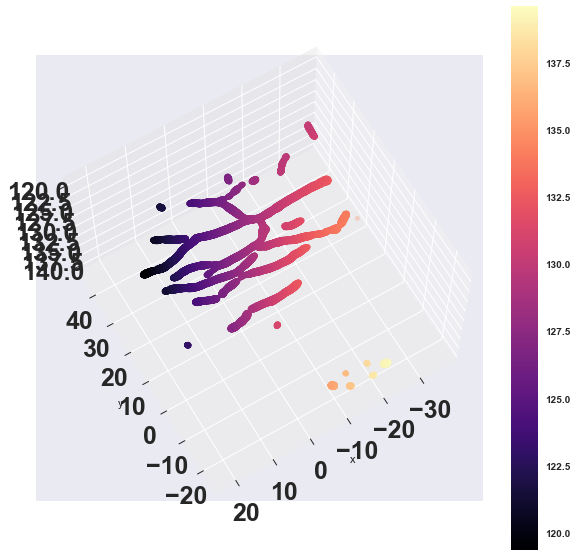

In [32]:
import matplotlib as mpl

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams
mpl.style.use('seaborn')


fig = plt.figure(figsize=(10,10))
np.random.seed(11)


ax = fig.add_subplot(111, projection='3d')

c = p3ds[0:,[2]] 
rcParams['font.weight'] = 'bold'
for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    for tick in axis.get_major_ticks():
        tick.label.set_fontsize(25)
        tick.label.set_fontweight('bold')
        
        
p=ax.scatter(p3ds[0:,[0]],p3ds[0:,[1]],p3ds[0:,[2]],c = c, cmap=plt.cm.magma)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

elev = 245.25
azim = 120.5
ax.view_init(elev, azim)


fig.colorbar(p, ax=ax)

# fig.savefig("scatter_view_color_bar.png")
plt.show()

In [114]:
import open3d as o3d
import time

if __name__ == "__main__":
    o3d.utility.set_verbosity_level(o3d.utility.VerbosityLevel.Debug)
    pcd_data = o3d.data.DemoICPPointClouds()
    source_raw = o3d.io.read_point_cloud('data1.ply')

    
    source_raw = source_raw.voxel_down_sample(voxel_size=0.005)

    
    source = source_raw


    vis = o3d.visualization.Visualizer()
    vis.create_window()
    vis.add_geometry(source)


    for i in range(100):
        time.sleep(.1)
        flip_transform = [[1, 0.1, 0, 0 ],
                          [0, 1, 0, 0], 
                          [0, 0, 1, 0], 
                          [0, 0, 0, 1 ]]
        source.transform(flip_transform)
        vis.update_geometry(source)
        vis.poll_events()
        vis.update_renderer()
        

        flip_transform = np.linalg.inv(np.array(flip_transform))

        source.transform(flip_transform)
        vis.update_geometry(source)
        vis.poll_events()
        vis.update_renderer()

    vis.destroy_window()
    o3d.utility.set_verbosity_level(o3d.utility.VerbosityLevel.Info)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D DEBUG] Format auto File data1.ply
[Open3D WARNING] Read PLY failed: unable to open file: data1.ply
[Open3D DEBUG] Read geometry::PointCloud: 0 vertices.
[Open3D DEBUG] Pointcloud down sampled from 0 points to 0 points.
[Open3D DEBUG] GLFW init.
[Open3D DEBUG] Add geometry and update bounding box to [(0.0000, 0.0000, 0.0000) - (0.0000, 0.0000, 0.0000)]
